In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\Users\ankan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ankan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 10]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [3]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [4]:
data = pd.read_csv('data.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  6
Features :  ['Unnamed: 0' 'ID' 'Gene' 'Variation' 'Class' 'TEXT']


Unnamed: 0  ID    Gene             Variation  Class  \
0           0   0  FAM58A  Truncating Mutations      1   
1           1   1     CBL                 W802*      2   
2           2   2     CBL                 Q249E      2   
3           3   3     CBL                 N454D      3   
4           4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [5]:
data.Gene = data.Gene.str.replace('\s+', '_')
data.Variation = data.Variation.str.replace('\s+', '_')

In [6]:
data.head()

Unnamed: 0  ID    Gene             Variation  Class  \
0           0   0  FAM58A  Truncating_Mutations      1   
1           1   1     CBL                 W802*      2   
2           2   2     CBL                 Q249E      2   
3           3   3     CBL                 N454D      3   
4           4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [7]:
data['Words'] = data['TEXT'].str.split()
data.head()

Unnamed: 0  ID    Gene             Variation  Class  \
0           0   0  FAM58A  Truncating_Mutations      1   
1           1   1     CBL                 W802*      2   
2           2   2     CBL                 Q249E      2   
3           3   3     CBL                 N454D      3   
4           4   4     CBL                 L399V      4   

                                                TEXT  \
0  cyclin dependent kinases cdks regulate variety...   
1  abstract background non small cell lung cancer...   
2  abstract background non small cell lung cancer...   
3  recent evidence demonstrated acquired uniparen...   
4  oncogenic mutations monomeric casitas b lineag...   

                                               Words  
0  [cyclin, dependent, kinases, cdks, regulate, v...  
1  [abstract, background, non, small, cell, lung,...  
2  [abstract, background, non, small, cell, lung,...  
3  [recent, evidence, demonstrated, acquired, uni...  
4  [oncogenic, mutations, monomeric, casitas, b, ...

In [8]:
data["word_count"] = data["TEXT"].apply(lambda x: len(str(x).split()) )

In [9]:
print('The maximum number of words presenr in the TEXT column are:',max(data['word_count']))

The maximum number of words presenr in the TEXT column are: 56425


In [10]:
data.head()

Unnamed: 0  ID    Gene             Variation  Class  \
0           0   0  FAM58A  Truncating_Mutations      1   
1           1   1     CBL                 W802*      2   
2           2   2     CBL                 Q249E      2   
3           3   3     CBL                 N454D      3   
4           4   4     CBL                 L399V      4   

                                                TEXT  \
0  cyclin dependent kinases cdks regulate variety...   
1  abstract background non small cell lung cancer...   
2  abstract background non small cell lung cancer...   
3  recent evidence demonstrated acquired uniparen...   
4  oncogenic mutations monomeric casitas b lineag...   

                                               Words  word_count  
0  [cyclin, dependent, kinases, cdks, regulate, v...        4370  
1  [abstract, background, non, small, cell, lung,...        4139  
2  [abstract, background, non, small, cell, lung,...        4139  
3  [recent, evidence, demonstrated, acquired, uni...        3841  
4  [oncogenic, mutations, monomeric, casitas, b, ...        4254

In [11]:
vect = TfidfVectorizer(ngram_range = (1,4), stop_words = "english", min_df = 5, max_features = 56000) #upto 4-grams
tfidf_all = vect.fit_transform(data['TEXT'])

In [12]:
data['tfidf'] = tfidf_all
data.head()

Unnamed: 0  ID    Gene             Variation  Class  \
0           0   0  FAM58A  Truncating_Mutations      1   
1           1   1     CBL                 W802*      2   
2           2   2     CBL                 Q249E      2   
3           3   3     CBL                 N454D      3   
4           4   4     CBL                 L399V      4   

                                                TEXT  \
0  cyclin dependent kinases cdks regulate variety...   
1  abstract background non small cell lung cancer...   
2  abstract background non small cell lung cancer...   
3  recent evidence demonstrated acquired uniparen...   
4  oncogenic mutations monomeric casitas b lineag...   

                                               Words  word_count  \
0  [cyclin, dependent, kinases, cdks, regulate, v...        4370   
1  [abstract, background, non, small, cell, lung,...        4139   
2  [abstract, background, non, small, cell, lung,...        4139   
3  [recent, evidence, demonstrated, acquired, uni...        3841   
4  [oncogenic, mutations, monomeric, casitas, b, ...        4254   

                                               tfidf  
0    (0, 14691)\t0.48433927630955814\n  (0, 15762...  
1    (0, 14691)\t0.48433927630955814\n  (0, 15762...  
2    (0, 14691)\t0.48433927630955814\n  (0, 15762...  
3    (0, 14691)\t0.48433927630955814\n  (0, 15762...  
4    (0, 14691)\t0.48433927630955814\n  (0, 15762...

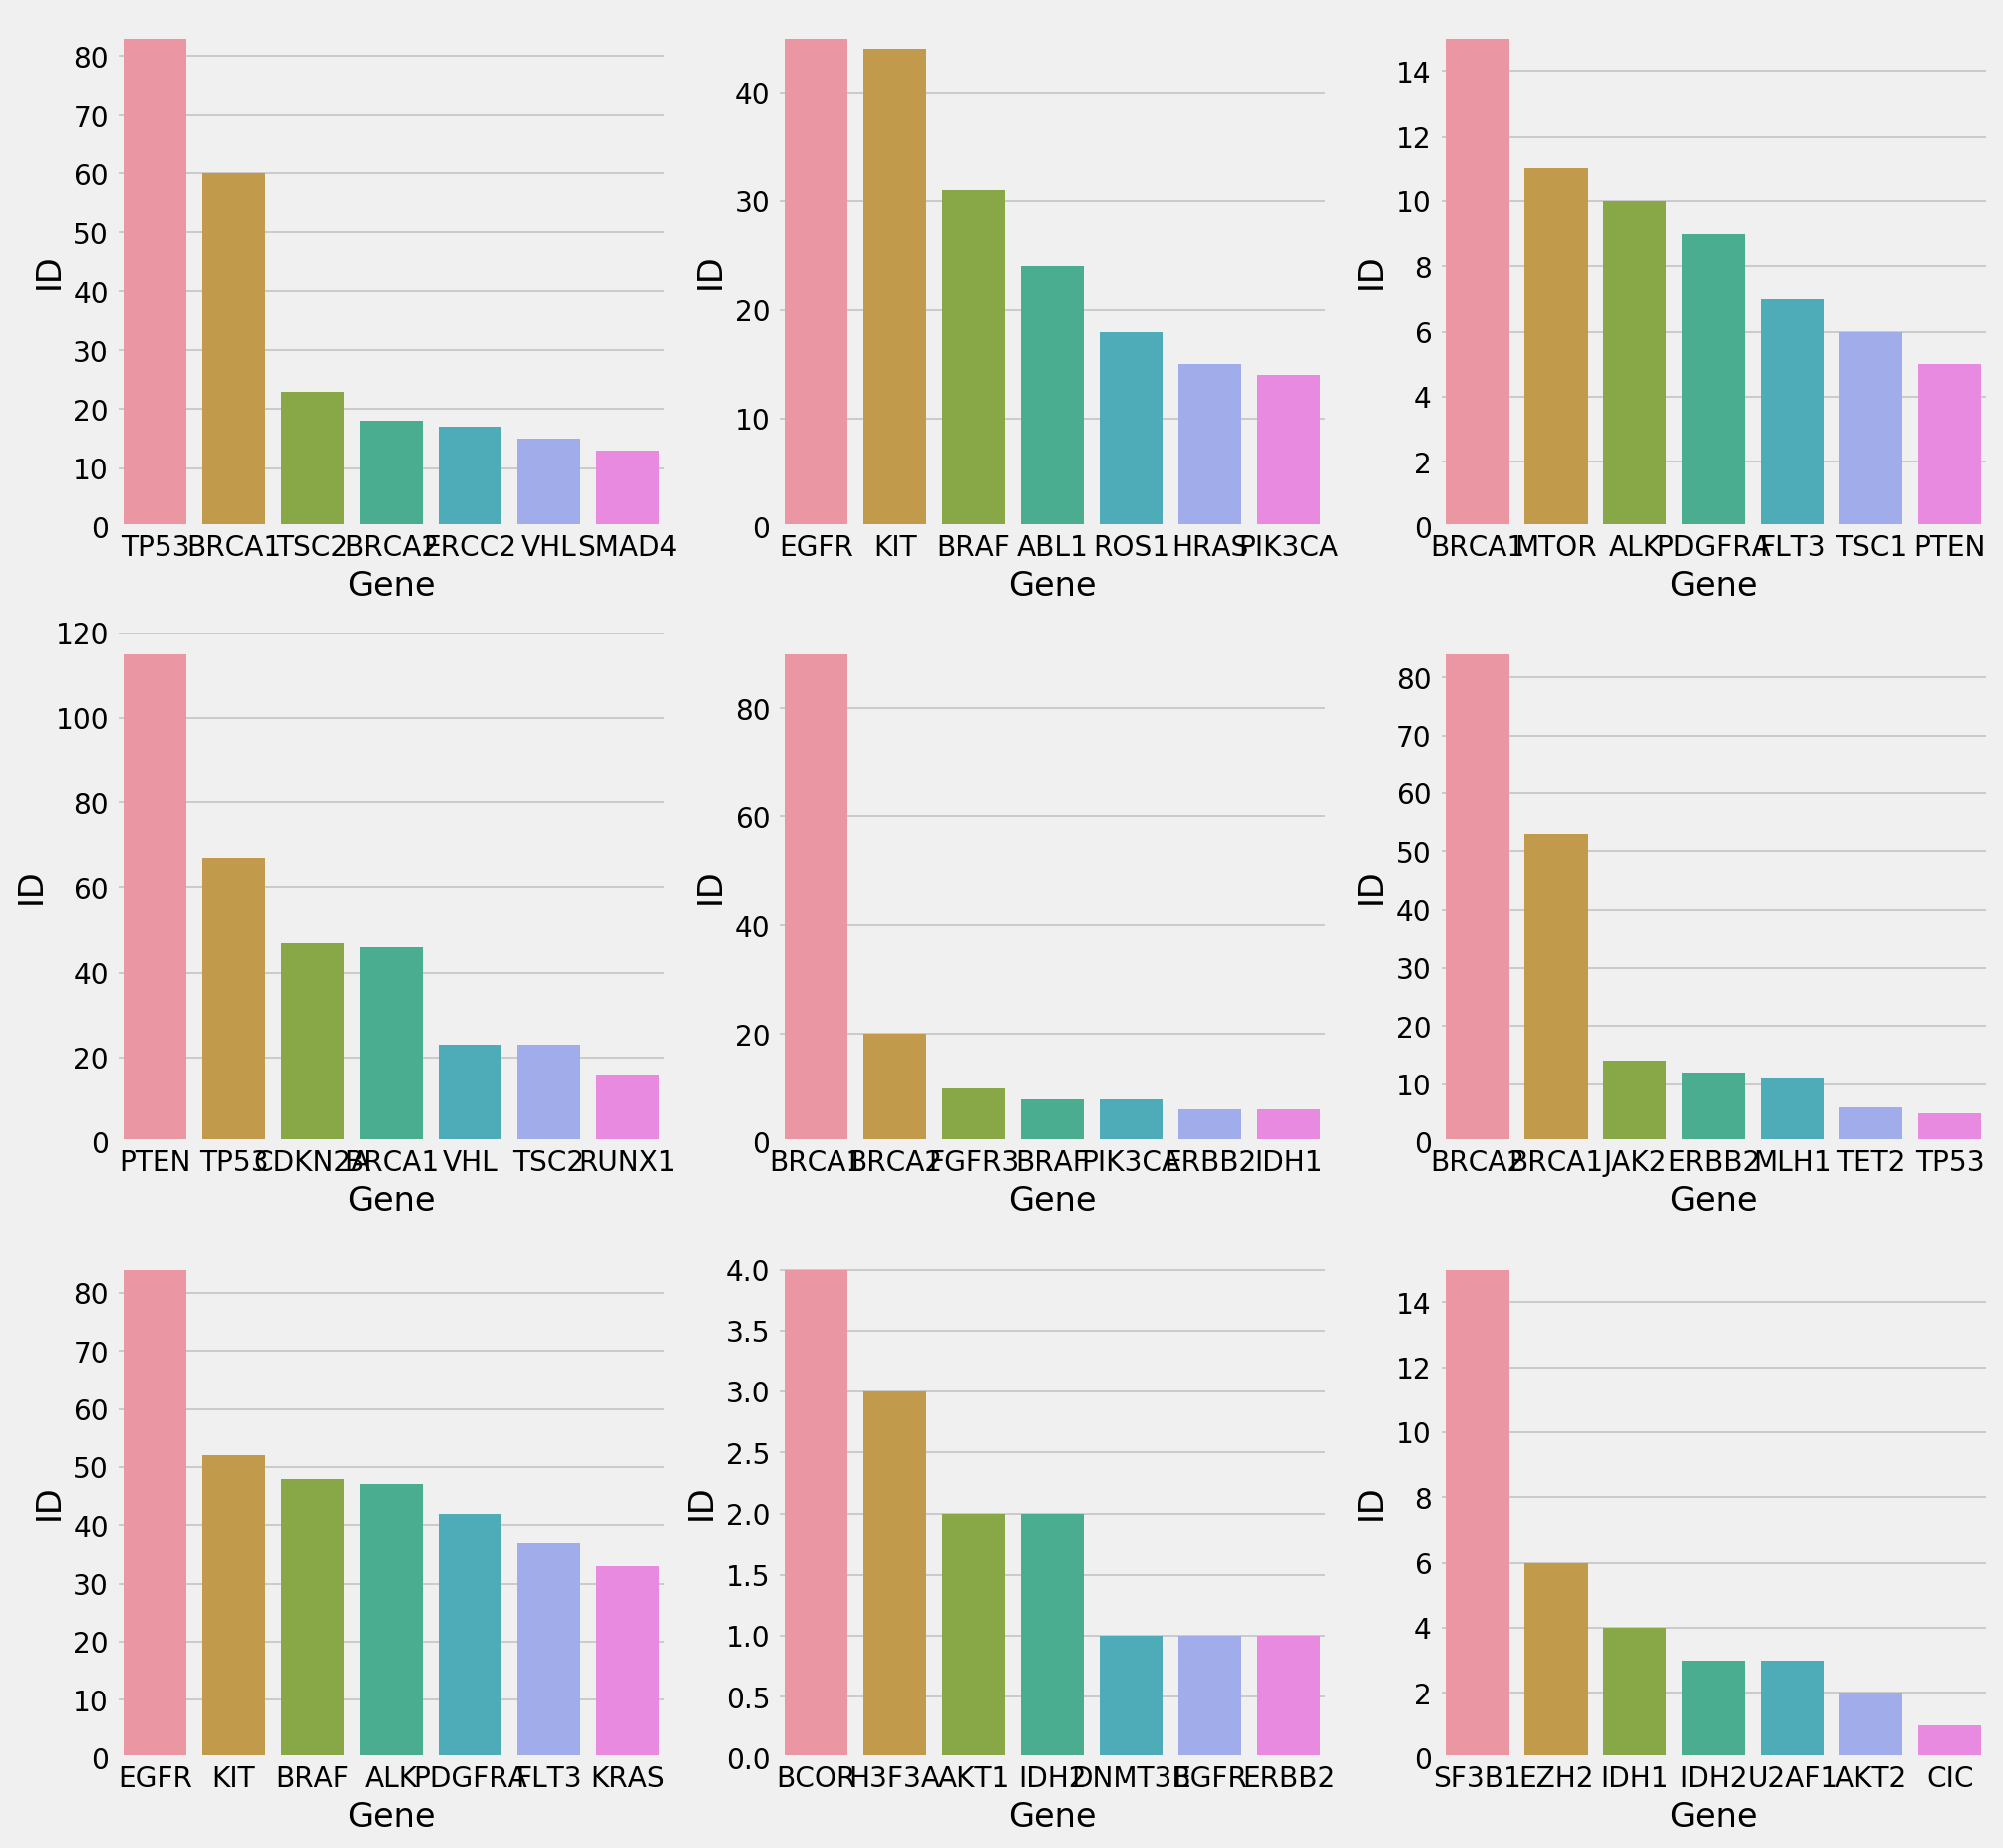

In [13]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
#https://www.kaggle.com/dextrousjinx/brief-insight-on-genetic-variations
for i in range(3):
    for j in range(3):
        gene_count_grp = data[data["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])

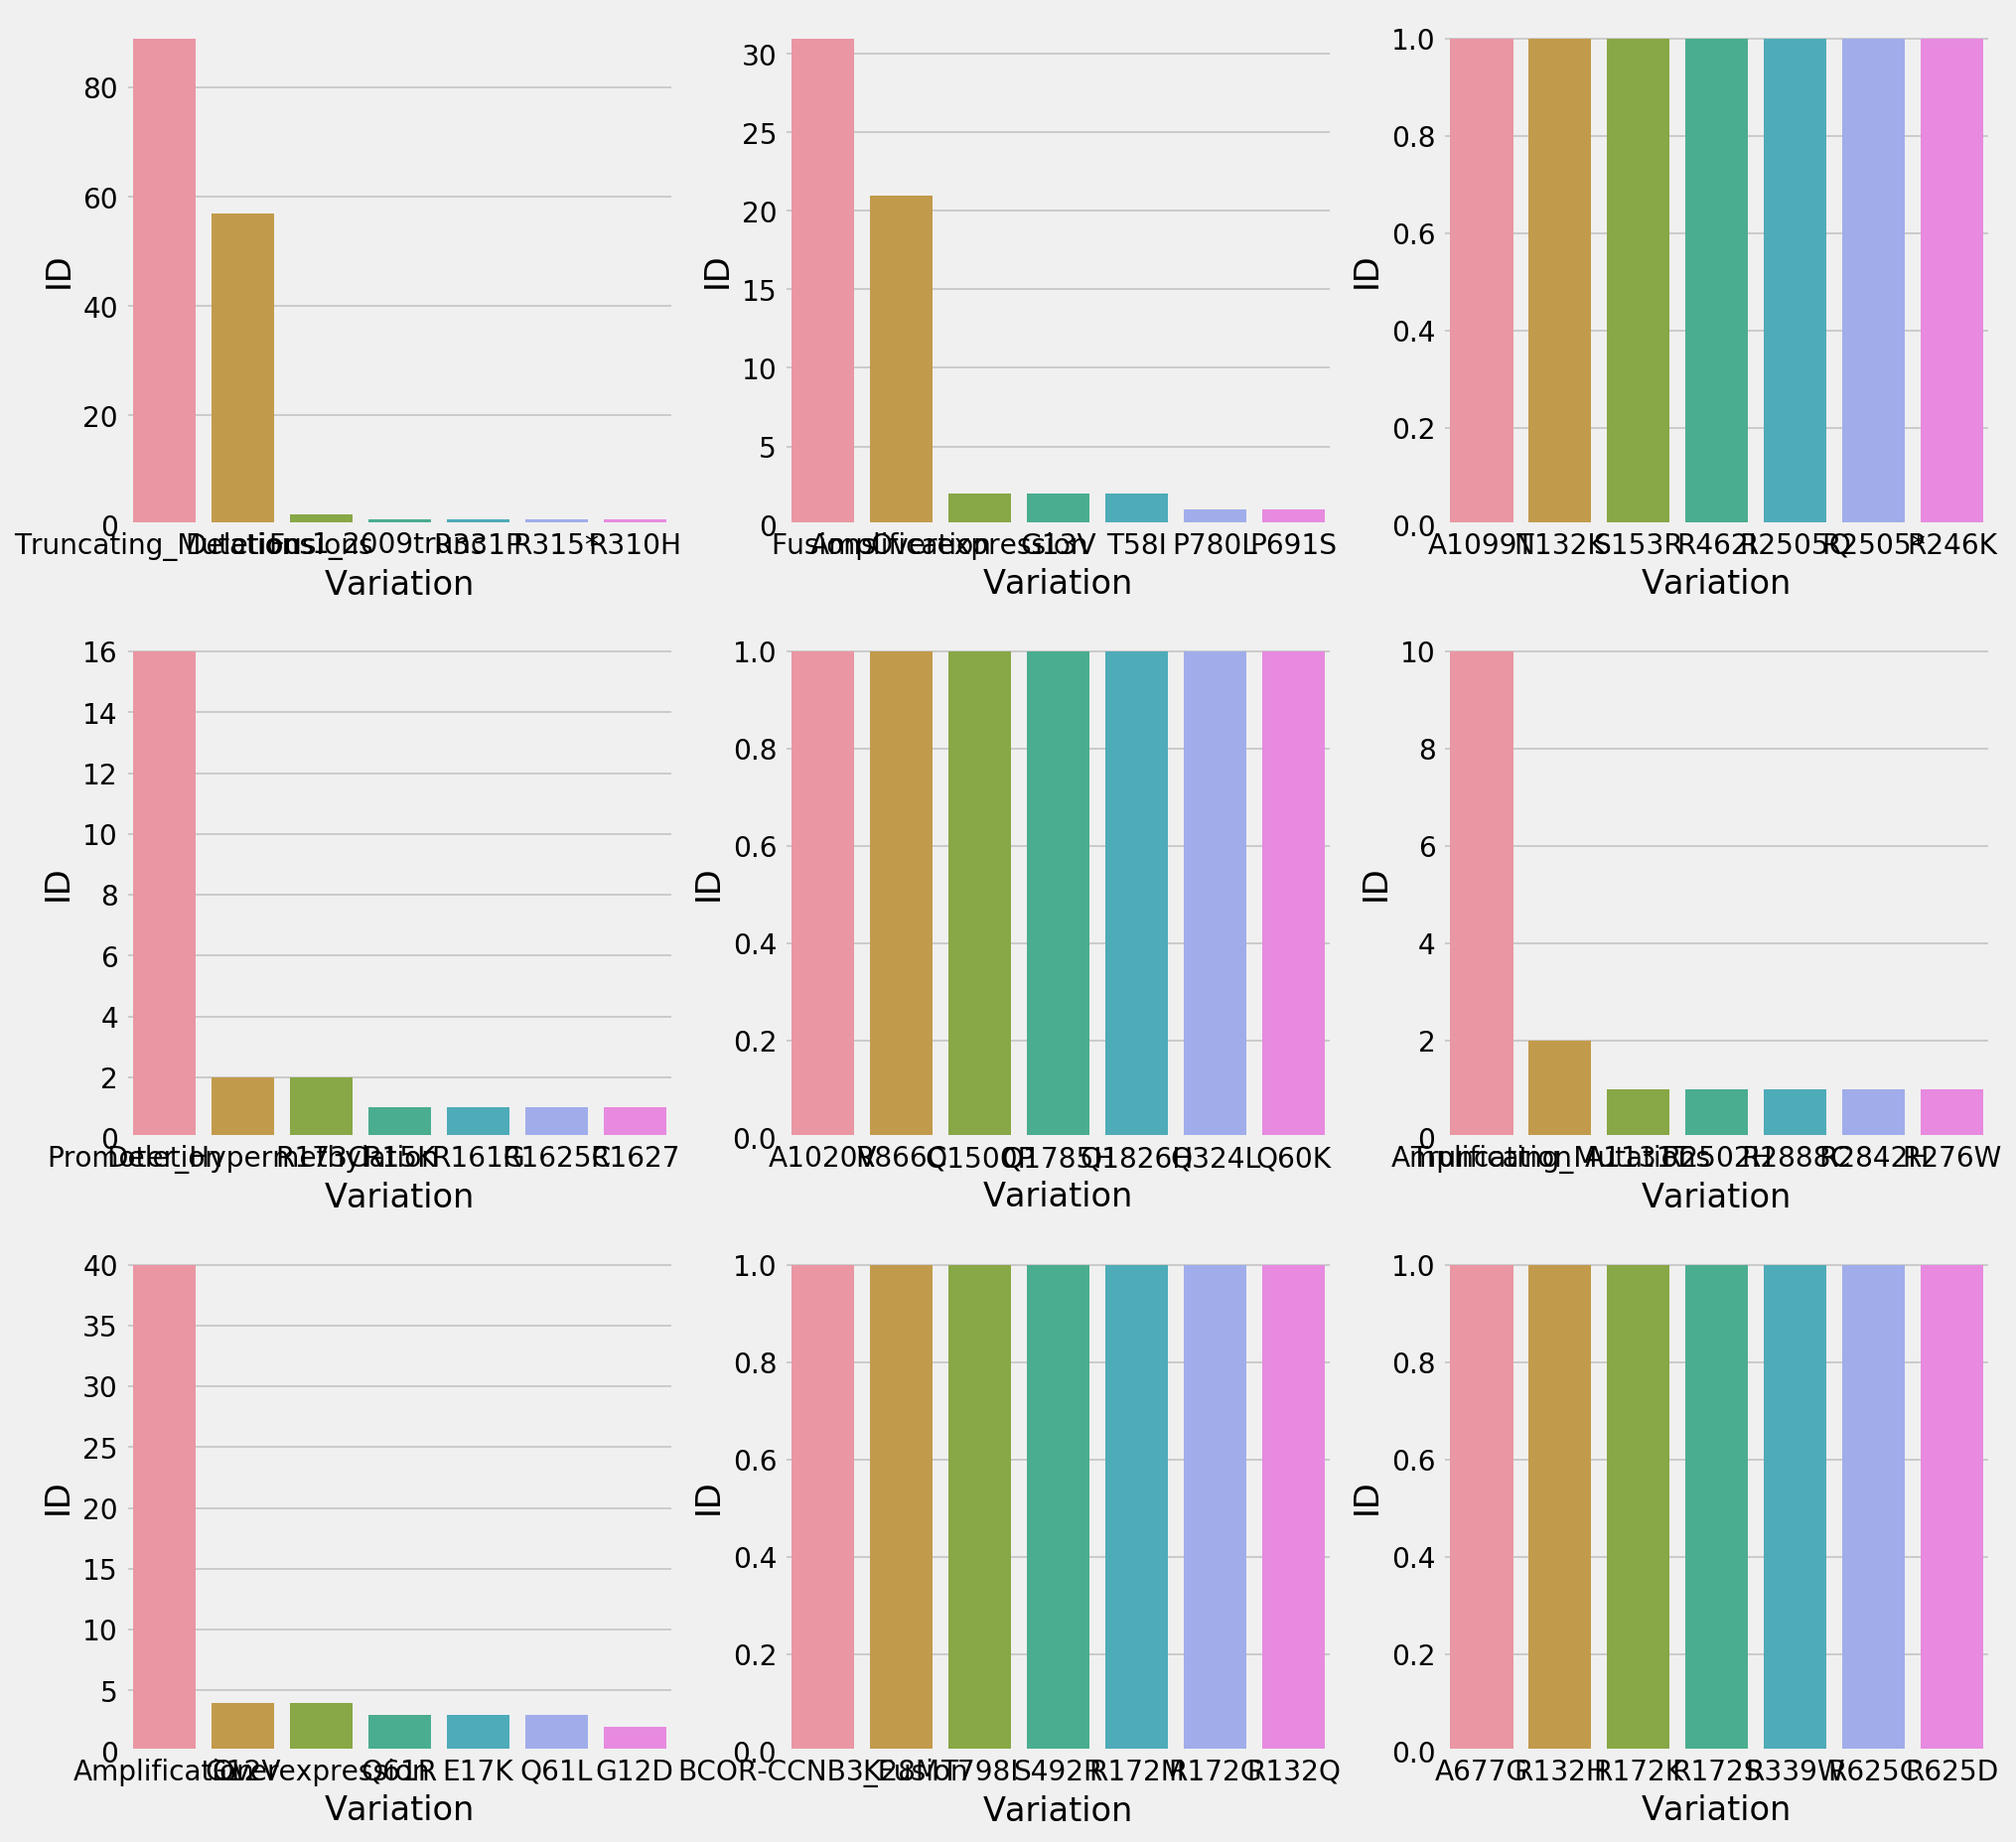

In [14]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
#https://www.kaggle.com/dextrousjinx/brief-insight-on-genetic-variations
for i in range(3):
    for j in range(3):
        gene_count_grp = data[data["Class"]==((i*3+j)+1)].groupby('Variation')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Variation", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])

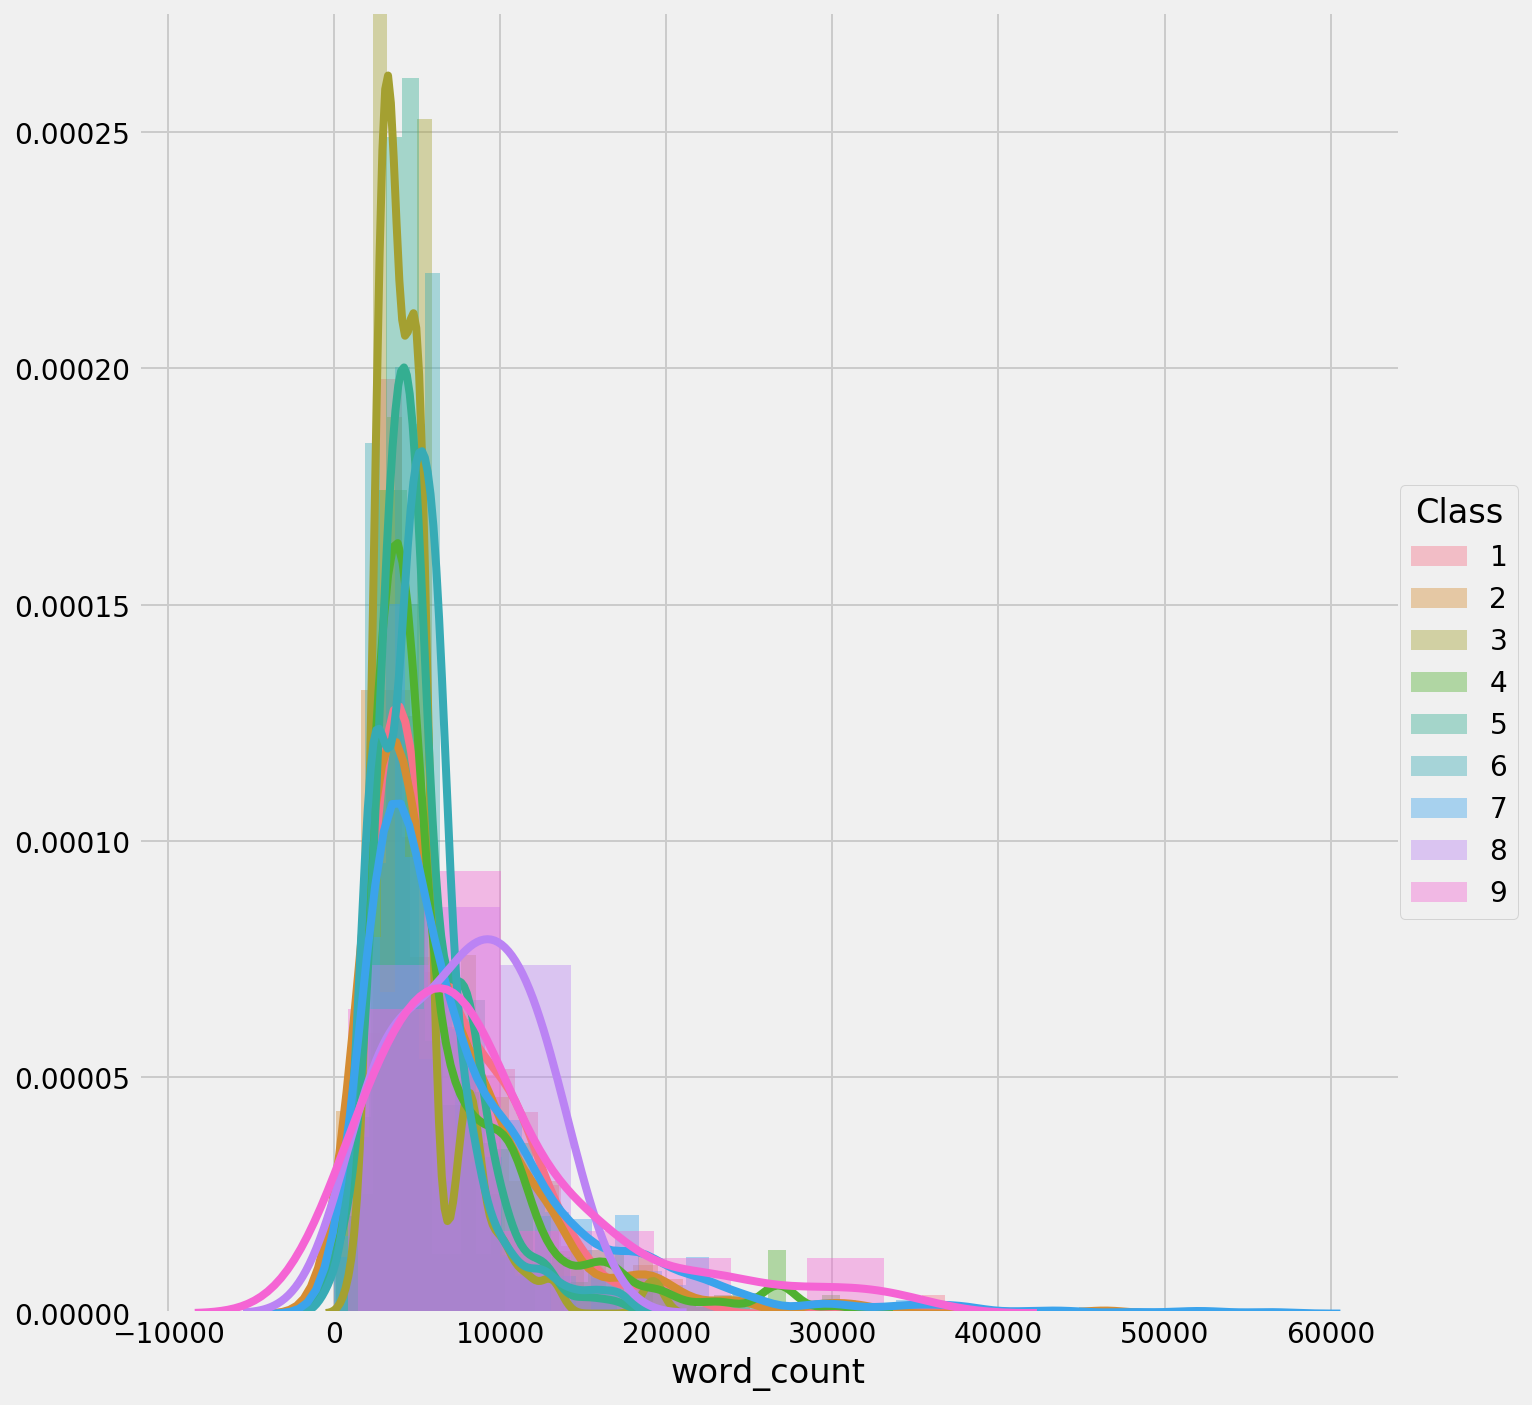

In [15]:
sns.FacetGrid(data, hue="Class", size=10) \
   .map(sns.distplot, "word_count") \
   .add_legend();
plt.show();

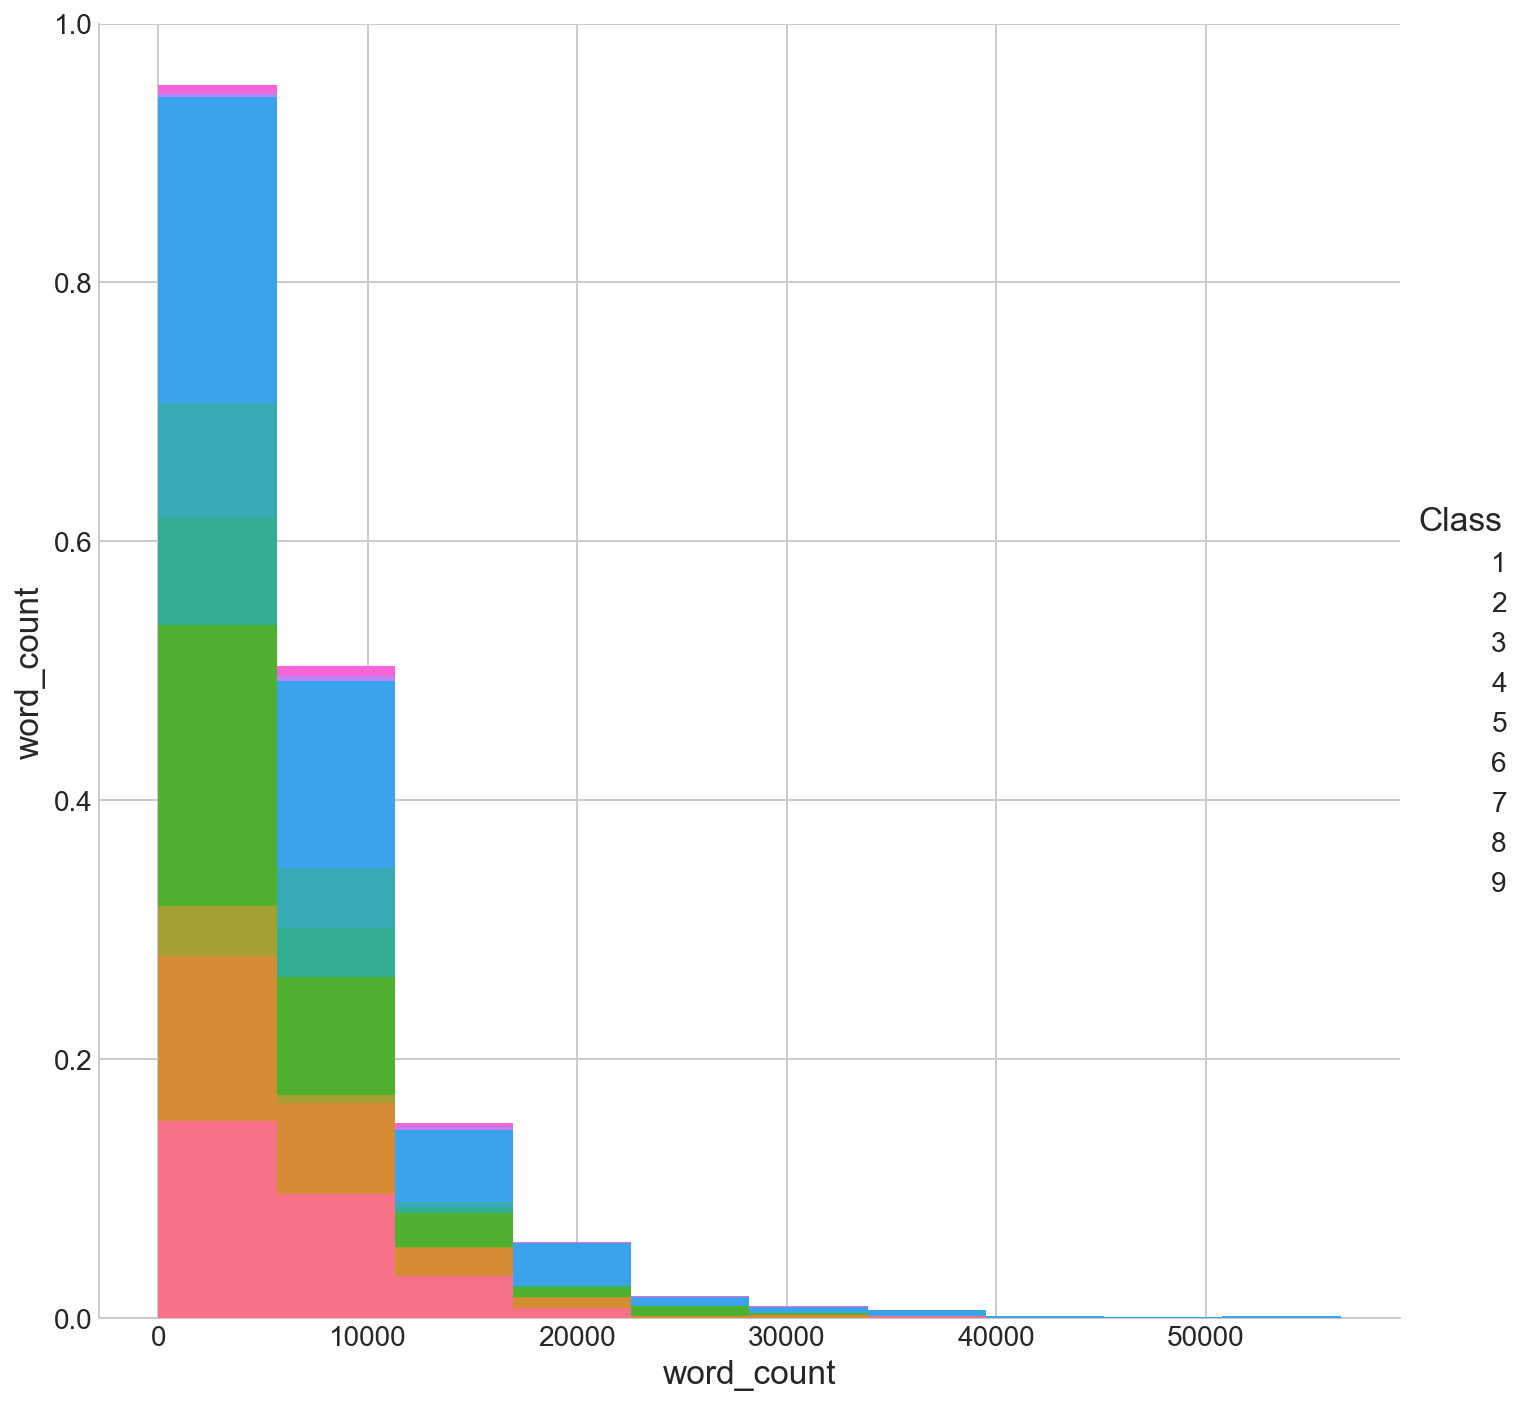

In [16]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="Class", vars = ['word_count'], size= 10)
plt.show()



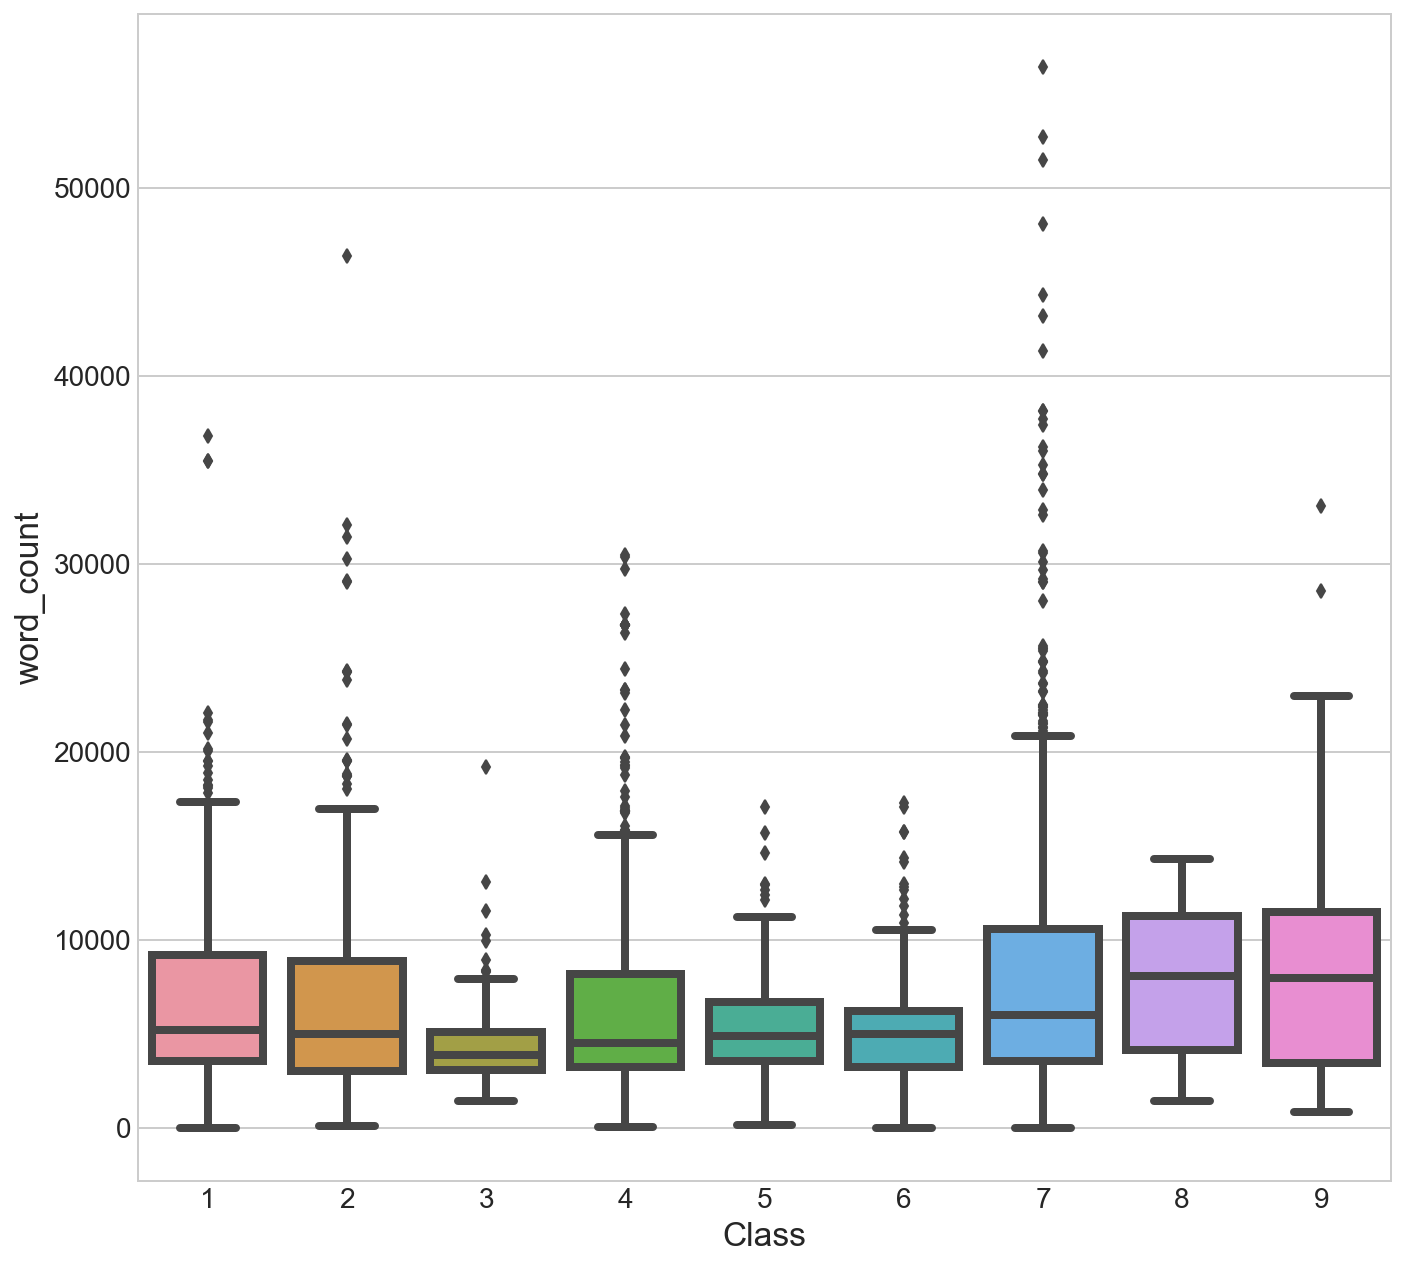

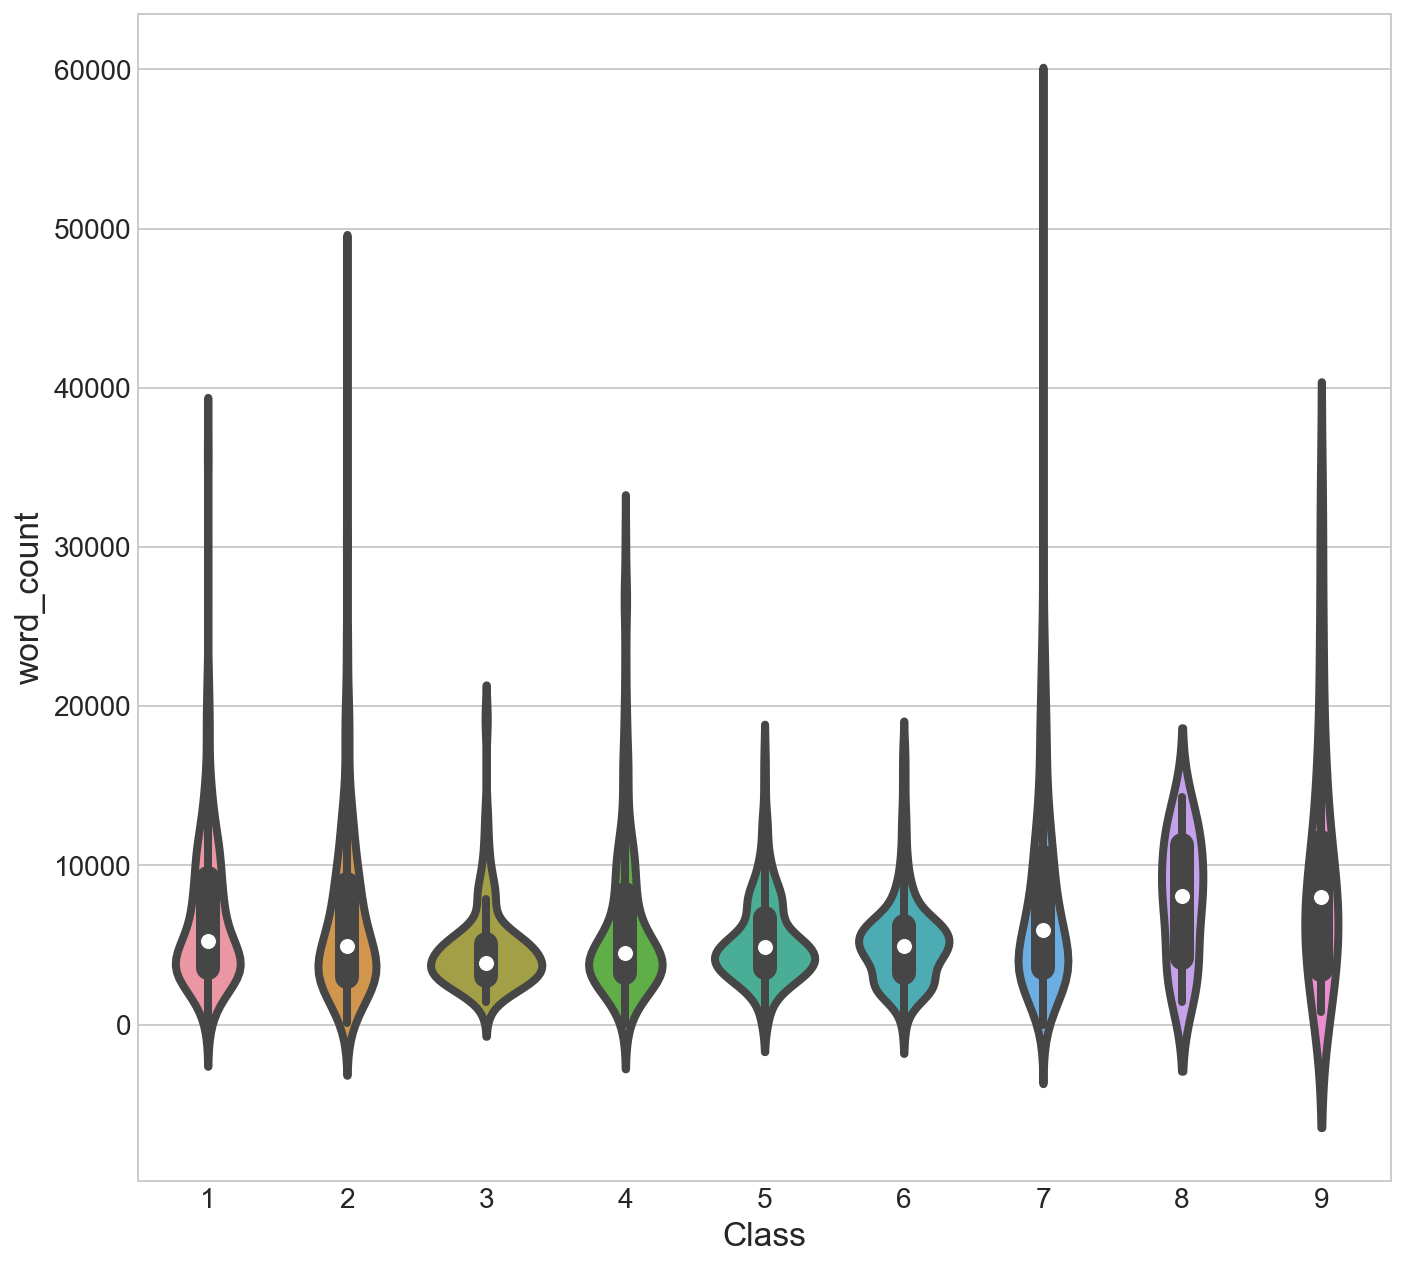

In [17]:
sns.boxplot(x='Class',y='word_count', data=data)
plt.show()

sns.violinplot(x='Class',y='word_count', data=data)
plt.show()



In [18]:
svd = TruncatedSVD(n_components=1000, n_iter=5, random_state=0)
truncated_tfidf = svd.fit_transform(tfidf_all)

In [19]:
truncated_tfidf

array([[ 0.17838812, -0.08975842, -0.01894712, ...,  0.00650646,
         0.00384749, -0.00142602],
       [ 0.19512212, -0.12313572, -0.05873331, ...,  0.01508828,
        -0.0207463 , -0.01308835],
       [ 0.19512212, -0.12313572, -0.05873331, ...,  0.01508828,
        -0.0207463 , -0.01308835],
       ...,
       [ 0.05092094, -0.02485141, -0.01269771, ..., -0.00068274,
         0.00519305, -0.00221139],
       [ 0.16204623, -0.08438084, -0.02623504, ..., -0.00368454,
        -0.00926521,  0.02205783],
       [ 0.16021603, -0.07545459, -0.01970025, ..., -0.00028364,
        -0.00130274,  0.00189721]])

In [20]:
truncated_tfidf = truncated_tfidf.argsort()[:, ::-1]
truncated_tfidf

array([[ 46,   0, 686, ..., 637,   1,  44],
       [ 28,  31,   0, ...,  35,  33,  30],
       [ 28,  31,   0, ...,  35,  33,  30],
       ...,
       [ 67,  68, 449, ..., 104,  64,  66],
       [ 67,  68,   0, ..., 104,  66,  64],
       [ 67,  68,   0, ..., 104,  66,  64]], dtype=int64)

In [21]:
truncated_tfidf = pd.DataFrame(truncated_tfidf)

In [22]:
truncated_tfidf

0    1    2    3    4    5    6    7    8    9   ...   990  991  992  \
0      46    0  686   35  681  312  697  711  320  328 ...   739  640  345   
1      28   31    0   25   29   42   22   15    3   24 ...     2  394   23   
2      28   31    0   25   29   42   22   15    3   24 ...     2  394   23   
3      28   31    0   14  225   25  220  210   29  219 ...    45  240  224   
4      28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
5      28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
6      28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
7      14   28   31   16    0   29   25   42   41   22 ...    12   13   23   
8      28   31   25   29    0   42   15   24   22   41 ...   505  680    1   
9      28   31   25   29   24   42    0  507  483  516 ...   670  652  505   
10     28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
11     28   31    0   29   25   42   15   24   22   41 ...     7   44   47   
12     28   31   14    0   29   25   16   42   24   41 ...    47  217   13   
13     28   31    0   29   25   42   15   24   22   41 ...     7   44   47   
14     28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
15     28    0   31   25   29  652   24  670    6   42 ...   629    2   47   
16     28   31    0   25   29   42   14   22   41   15 ...    39   44   45   
17     28   31   25   29   42    0   41   14   24   15 ...    44   47  217   
18     28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
19     28   31   25   29   42    0   41   14   24   15 ...    44   47  217   
20     28   31    0   29   25   42   15   22   41   32 ...    39   47    1   
21     28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
22     28   31    0   29   15   25   42  217   22   41 ...    40  210  225   
23     28   31    0   14  225   25  220  210   29  219 ...    45  240  224   
24     28   31    0   14  225   25  220  210   29  219 ...    45  240  224   
25     28   31    0   14  225   25  220  210   29  219 ...    45  240  224   
26      0  137  619  590  778  582  515  347  789   31 ...    51  316  163   
27    102  105   94  109    0   96  121  113  135  436 ...   170  104  100   
28    102    0  105  109   94  402   96  427  121  113 ...   104  436  118   
29    102  105   94  109    0   96  121  113  135  436 ...   170  104  100   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
3291   27  125  138  126   25   28  133    0   32   34 ...   120   40  122   
3292   27  125  138  126   25   28  133    0   32   34 ...   120   40  122   
3293   27   25    0   28   33   32  129   36  479  603 ...    35  381  198   
3294   27    0   25   28   32   33   38   36  129   10 ...     4   45   35   
3295   27   25   28   32  143    0   33  136   36  239 ...     1  225   30   
3296   27    0   25   28   33   34   32  120  857   36 ...   577   40  589   
3297   67   68    0   70   62   58   71   55   79   41 ...   493   48   32   
3298  104   67  102  110   86   98   78   55   68   52 ...    66   56   53   
3299   67   68  100   41   70   71  101    0   40   55 ...     1   98  110   
3300   67   68    0   70   62   58  100   71   55   79 ...    92   48   32   
3301   67  104   68   55   70    0   78   71   90   52 ...    44   96   77   
3302  282  301  284  288  297  300  298  306  287  283 ...   248  302  318   
3303  104   67  102  110   86   98   78   55   68   52 ...    66   56   53   
3304  282  301  284  288  297  300  298  306  287  283 ...   248  302  318   
3305  104   67  102  110   86   98   78   55   68   52 ...    66   56   53   
3306   67   68    0   62   58   70  101  100   71   55 ...    77    1   48   
3307   67   68    0  101   70  100   62  531   58   55 ...    48    1  533   
3308   67   68    0  780   70   55   62  863  101   71 ...    98   44  848   
3309   67   68  100   41   70   71  101    0   40   55 ...     1   98  110   
3310   67  531   68  488    

In [23]:
Gene_df = pd.get_dummies(data['Gene'].values)
Gene_df.head()

ABL1  ACVR1  AGO2  AKT1  AKT2  AKT3  ALK  APC  AR  ARAF  ...   TSC1  TSC2  \
0     0      0     0     0     0     0    0    0   0     0  ...      0     0   
1     0      0     0     0     0     0    0    0   0     0  ...      0     0   
2     0      0     0     0     0     0    0    0   0     0  ...      0     0   
3     0      0     0     0     0     0    0    0   0     0  ...      0     0   
4     0      0     0     0     0     0    0    0   0     0  ...      0     0   

   U2AF1  VEGFA  VHL  WHSC1  WHSC1L1  XPO1  XRCC2  YAP1  
0      0      0    0      0        0     0      0     0  
1      0      0    0      0        0     0      0     0  
2      0      0    0      0        0     0      0     0  
3      0      0    0      0        0     0      0     0  
4      0      0    0      0        0     0      0     0  

[5 rows x 264 columns]

In [24]:
Variation_df = pd.get_dummies(data['Variation'].values)
Variation_df.head()

1_2009trunc  2010_2471trunc  256_286trunc  3'_Deletion  385_418del  \
0            0               0             0            0           0   
1            0               0             0            0           0   
2            0               0             0            0           0   
3            0               0             0            0           0   
4            0               0             0            0           0   

   422_605trunc  533_534del  534_536del  550_592del  560_561insER   ...     \
0             0           0           0           0             0   ...      
1             0           0           0           0             0   ...      
2             0           0           0           0             0   ...      
3             0           0           0           0             0   ...      
4             0           0           0           0             0   ...      

   Y87N  Y901C  Y931C  Y98H  Y98N  YAP1-FAM118B_Fusion  YAP1-MAMLD1_Fusion  \
0     0      0      0     0     0                    0                   0   
1     0      0      0     0     0                    0                   0   
2     0      0      0     0     0                    0                   0   
3     0      0      0     0     0                    0                   0   
4     0      0      0     0     0                    0                   0   

   ZC3H7B-BCOR_Fusion  ZNF198-FGFR1_Fusion  p61BRAF  
0                   0                    0        0  
1                   0                    0        0  
2                   0                    0        0  
3                   0                    0        0  
4                   0                    0        0  

[5 rows x 2996 columns]

In [25]:
df = pd.concat([Gene_df,Variation_df],axis =1)
data_new = pd.concat([df,truncated_tfidf],axis = 1)

In [26]:
data_new.head()

ABL1  ACVR1  AGO2  AKT1  AKT2  AKT3  ALK  APC  AR  ARAF ...   990  991  \
0     0      0     0     0     0     0    0    0   0     0 ...   739  640   
1     0      0     0     0     0     0    0    0   0     0 ...     2  394   
2     0      0     0     0     0     0    0    0   0     0 ...     2  394   
3     0      0     0     0     0     0    0    0   0     0 ...    45  240   
4     0      0     0     0     0     0    0    0   0     0 ...    40  210   

   992  993  994  995  996  997  998  999  
0  345  572  701  645  322  637    1   44  
1   23   45   43    1   27   35   33   30  
2   23   45   43    1   27   35   33   30  
3  224   27  205   43   33   30   35  217  
4  225   23   45   43   27   33   35   30  

[5 rows x 4260 columns]

In [27]:
data_one = pd.concat([df, data['Class']], axis = 1)


In [28]:
data_one.head()

ABL1  ACVR1  AGO2  AKT1  AKT2  AKT3  ALK  APC  AR  ARAF  ...    Y901C  \
0     0      0     0     0     0     0    0    0   0     0  ...        0   
1     0      0     0     0     0     0    0    0   0     0  ...        0   
2     0      0     0     0     0     0    0    0   0     0  ...        0   
3     0      0     0     0     0     0    0    0   0     0  ...        0   
4     0      0     0     0     0     0    0    0   0     0  ...        0   

   Y931C  Y98H  Y98N  YAP1-FAM118B_Fusion  YAP1-MAMLD1_Fusion  \
0      0     0     0                    0                   0   
1      0     0     0                    0                   0   
2      0     0     0                    0                   0   
3      0     0     0                    0                   0   
4      0     0     0                    0                   0   

   ZC3H7B-BCOR_Fusion  ZNF198-FGFR1_Fusion  p61BRAF  Class  
0                   0                    0        0      1  
1                   0                    0        0      2  
2                   0                    0        0      2  
3                   0                    0        0      3  
4                   0                    0        0      4  

[5 rows x 3261 columns]

In [29]:
data_one.to_csv('final_features.csv', index=True)

In [30]:
y_true = data_one['Class'].values
print(y_true)
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data_one, y_true, stratify=y_true, test_size=0.1)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

[1 2 2 ... 1 4 4]


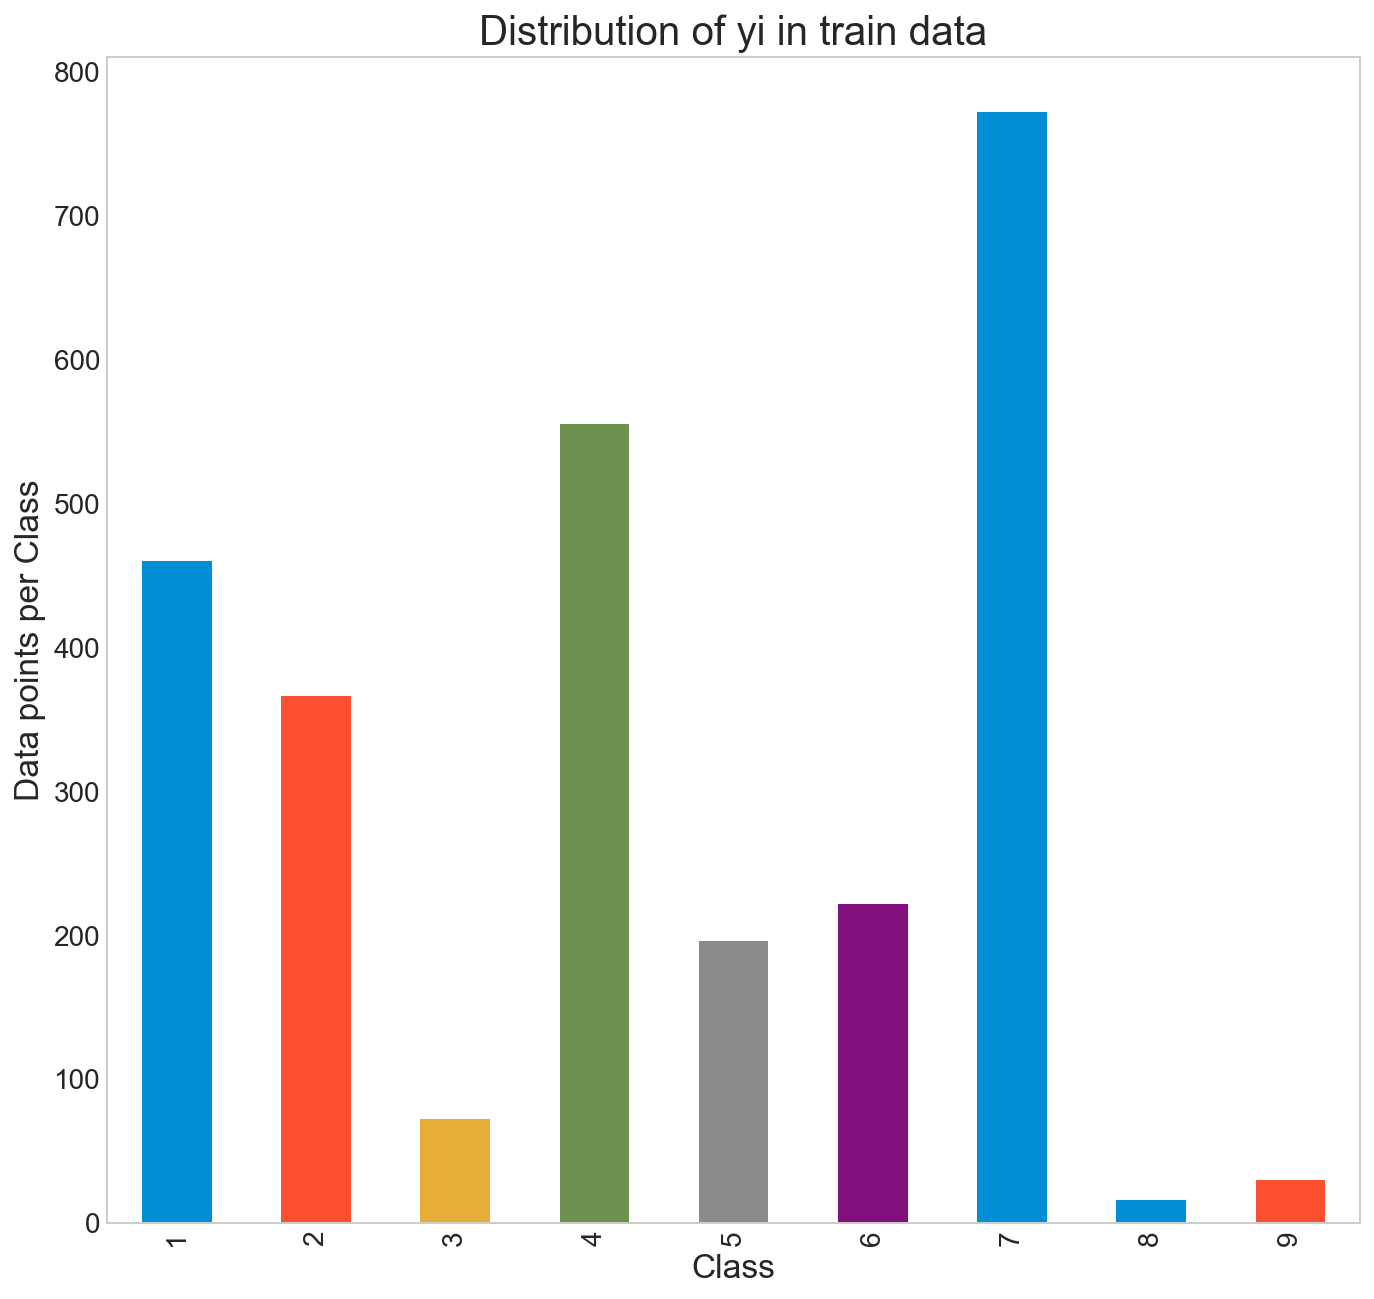

Number of data points in class 7 : 772 ( 28.71 %)
Number of data points in class 4 : 555 ( 20.64 %)
Number of data points in class 1 : 460 ( 17.107 %)
Number of data points in class 2 : 366 ( 13.611 %)
Number of data points in class 6 : 222 ( 8.256 %)
Number of data points in class 5 : 196 ( 7.289 %)
Number of data points in class 3 : 72 ( 2.678 %)
Number of data points in class 9 : 30 ( 1.116 %)
Number of data points in class 8 : 16 ( 0.595 %)
--------------------------------------------------------------------------------


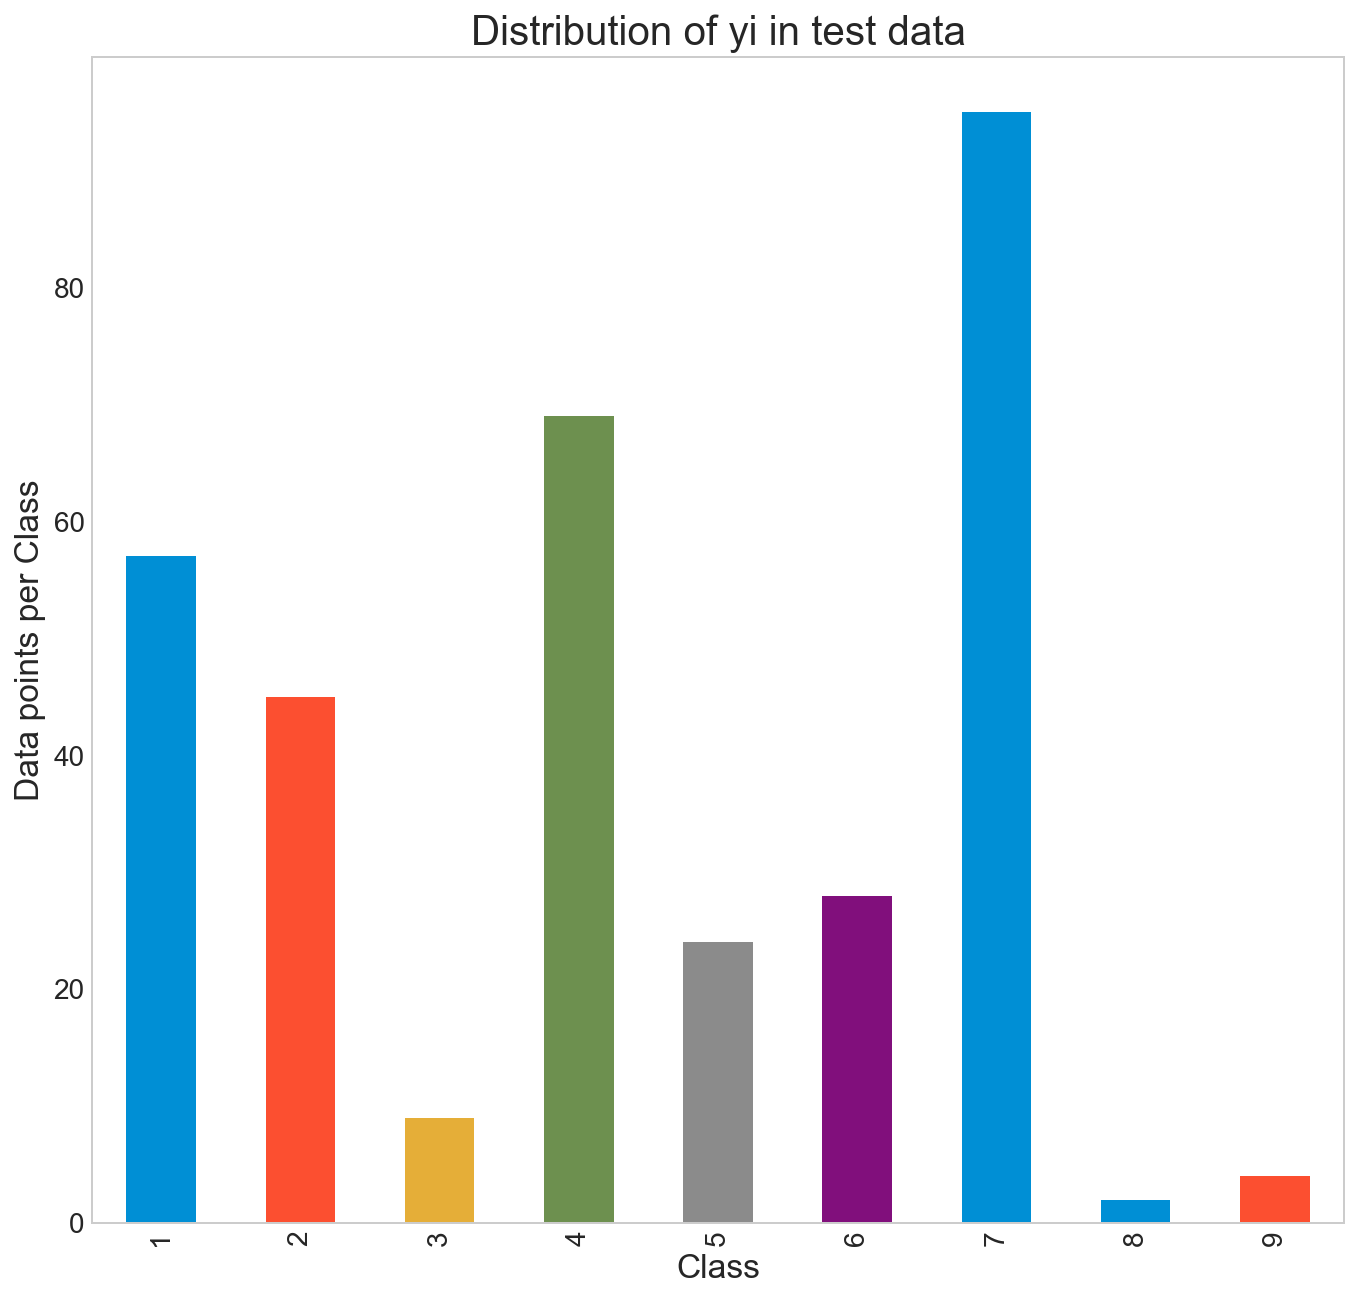

Number of data points in class 7 : 95 ( 28.529 %)
Number of data points in class 4 : 69 ( 20.721 %)
Number of data points in class 1 : 57 ( 17.117 %)
Number of data points in class 2 : 45 ( 13.514 %)
Number of data points in class 6 : 28 ( 8.408 %)
Number of data points in class 5 : 24 ( 7.207 %)
Number of data points in class 3 : 9 ( 2.703 %)
Number of data points in class 9 : 4 ( 1.201 %)
Number of data points in class 8 : 2 ( 0.601 %)
--------------------------------------------------------------------------------


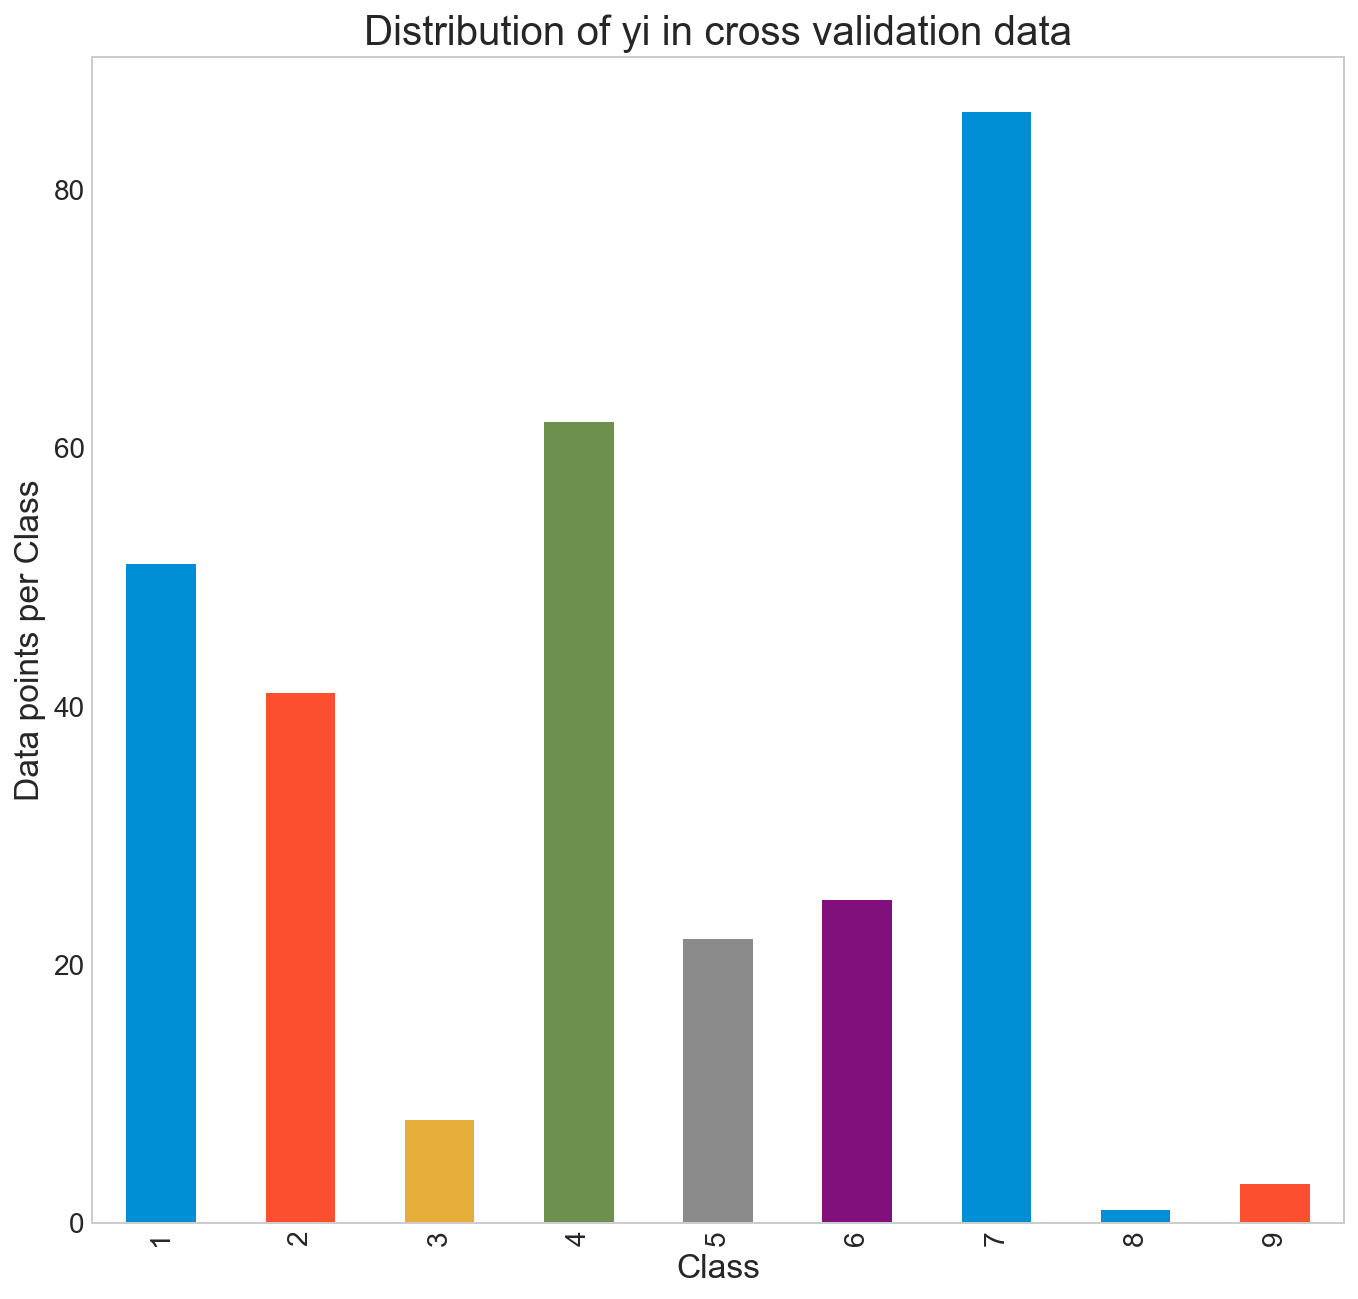

Number of data points in class 7 : 86 ( 28.763 %)
Number of data points in class 4 : 62 ( 20.736 %)
Number of data points in class 1 : 51 ( 17.057 %)
Number of data points in class 2 : 41 ( 13.712 %)
Number of data points in class 6 : 25 ( 8.361 %)
Number of data points in class 5 : 22 ( 7.358 %)
Number of data points in class 3 : 8 ( 2.676 %)
Number of data points in class 9 : 3 ( 1.003 %)
Number of data points in class 8 : 1 ( 0.334 %)


In [31]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [32]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss on the CV data is :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points are :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    
    
    
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

__I got this idea from : https://github.com/beyondacm/Kaggle_Personalized_Medicine/blob/master/2.Model_Construct.ipynb__

1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
2. https://github.com/beyondacm/Kaggle_Personalized_Medicine/blob/master/1.Data_Exploration.ipynb


__A very good link : https://github.com/beyondacm/Kaggle_Personalized_Medicine__

<h2> Logistic Regresssion With Class Balancing. </h2>

For values of alpha =  1e-05 The CV log loss is: 0.5753818420752143
For values of alpha =  0.0001 The CV log loss is: 0.5567201120338766
For values of alpha =  0.001 The CV log loss is: 0.5321195804810432
For values of alpha =  0.01 The CV log loss is: 0.6545991228821226
For values of alpha =  0.1 The CV log loss is: 0.8161545578357163
For values of alpha =  1 The CV log loss is: 0.9115595940068864
For values of alpha =  10 The CV log loss is: 0.8955324358170805
For values of alpha =  100 The CV log loss is: 0.8947835733567728
For values of alpha =  1000 The CV log loss is: 0.8946803620998074
For values of alpha =  10000 The CV log loss is: 0.8946455394893074


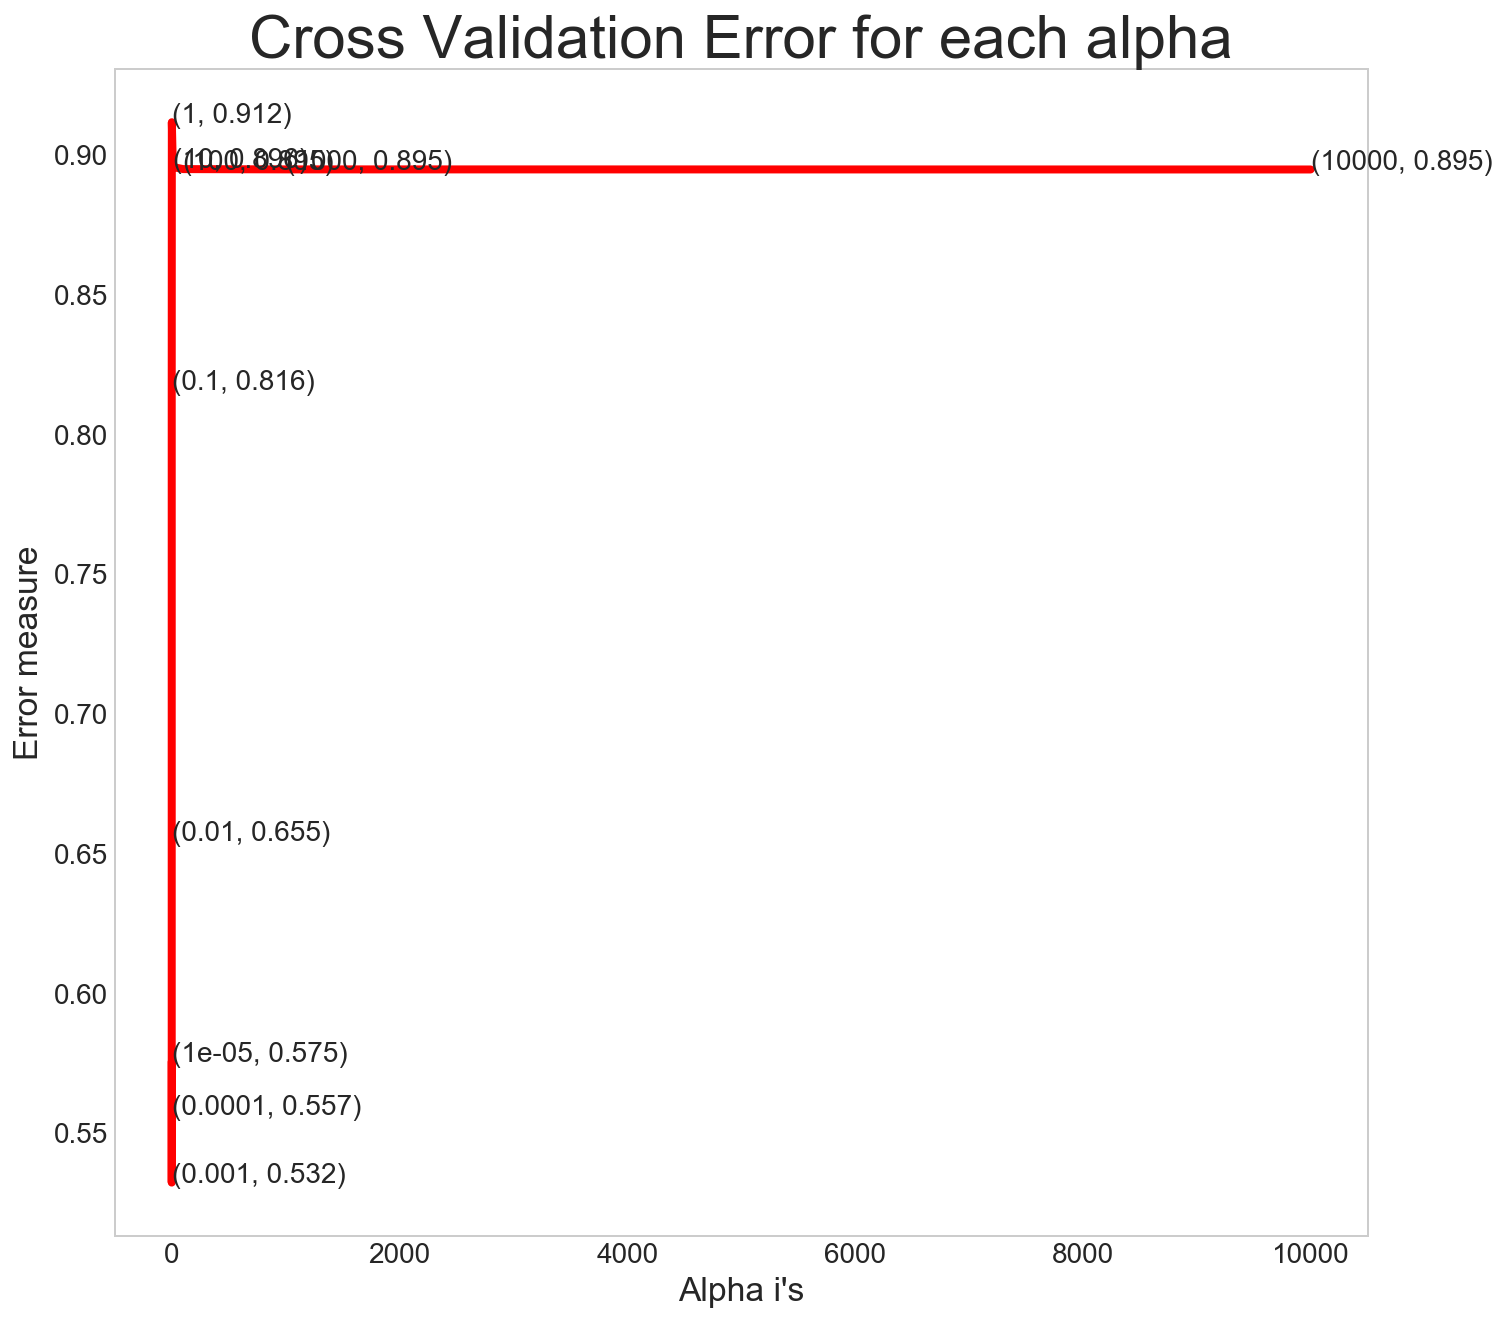

For values of best alpha =  0.001 :
The train log loss is: 0.48889067406134906
For values of best alpha =  0.001 :
The cross validation log loss is: 0.5410590616698918
For values of best alpha =  0.001 :
The test log loss is: 0.5543377342050593


In [33]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 5)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', class_weight = 'balanced', random_state=42)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The CV log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha", fontsize = 30)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss on the CV data is : 0.5321195804810432
Number of mis-classified points are : 0.12040133779264214
-------------------- Confusion matrix --------------------


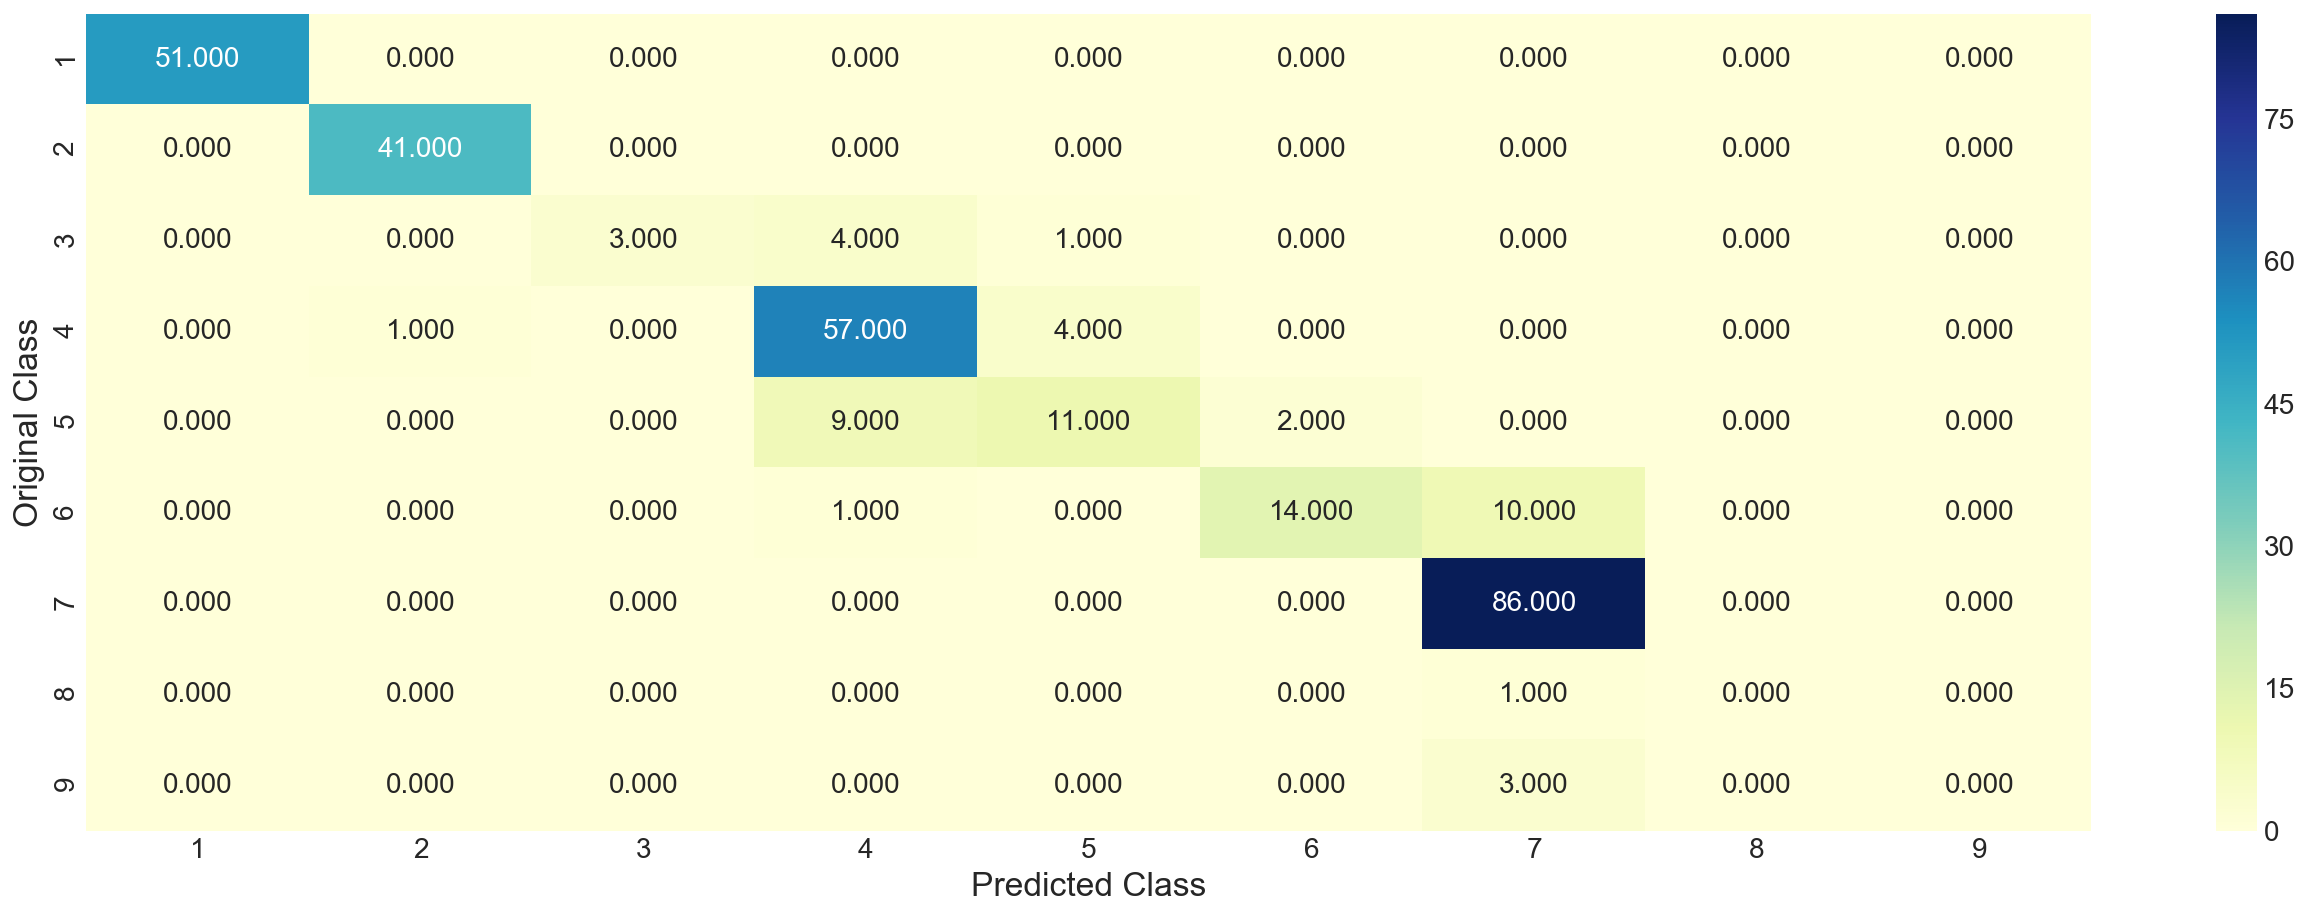

-------------------- Precision matrix (Columm Sum=1) --------------------


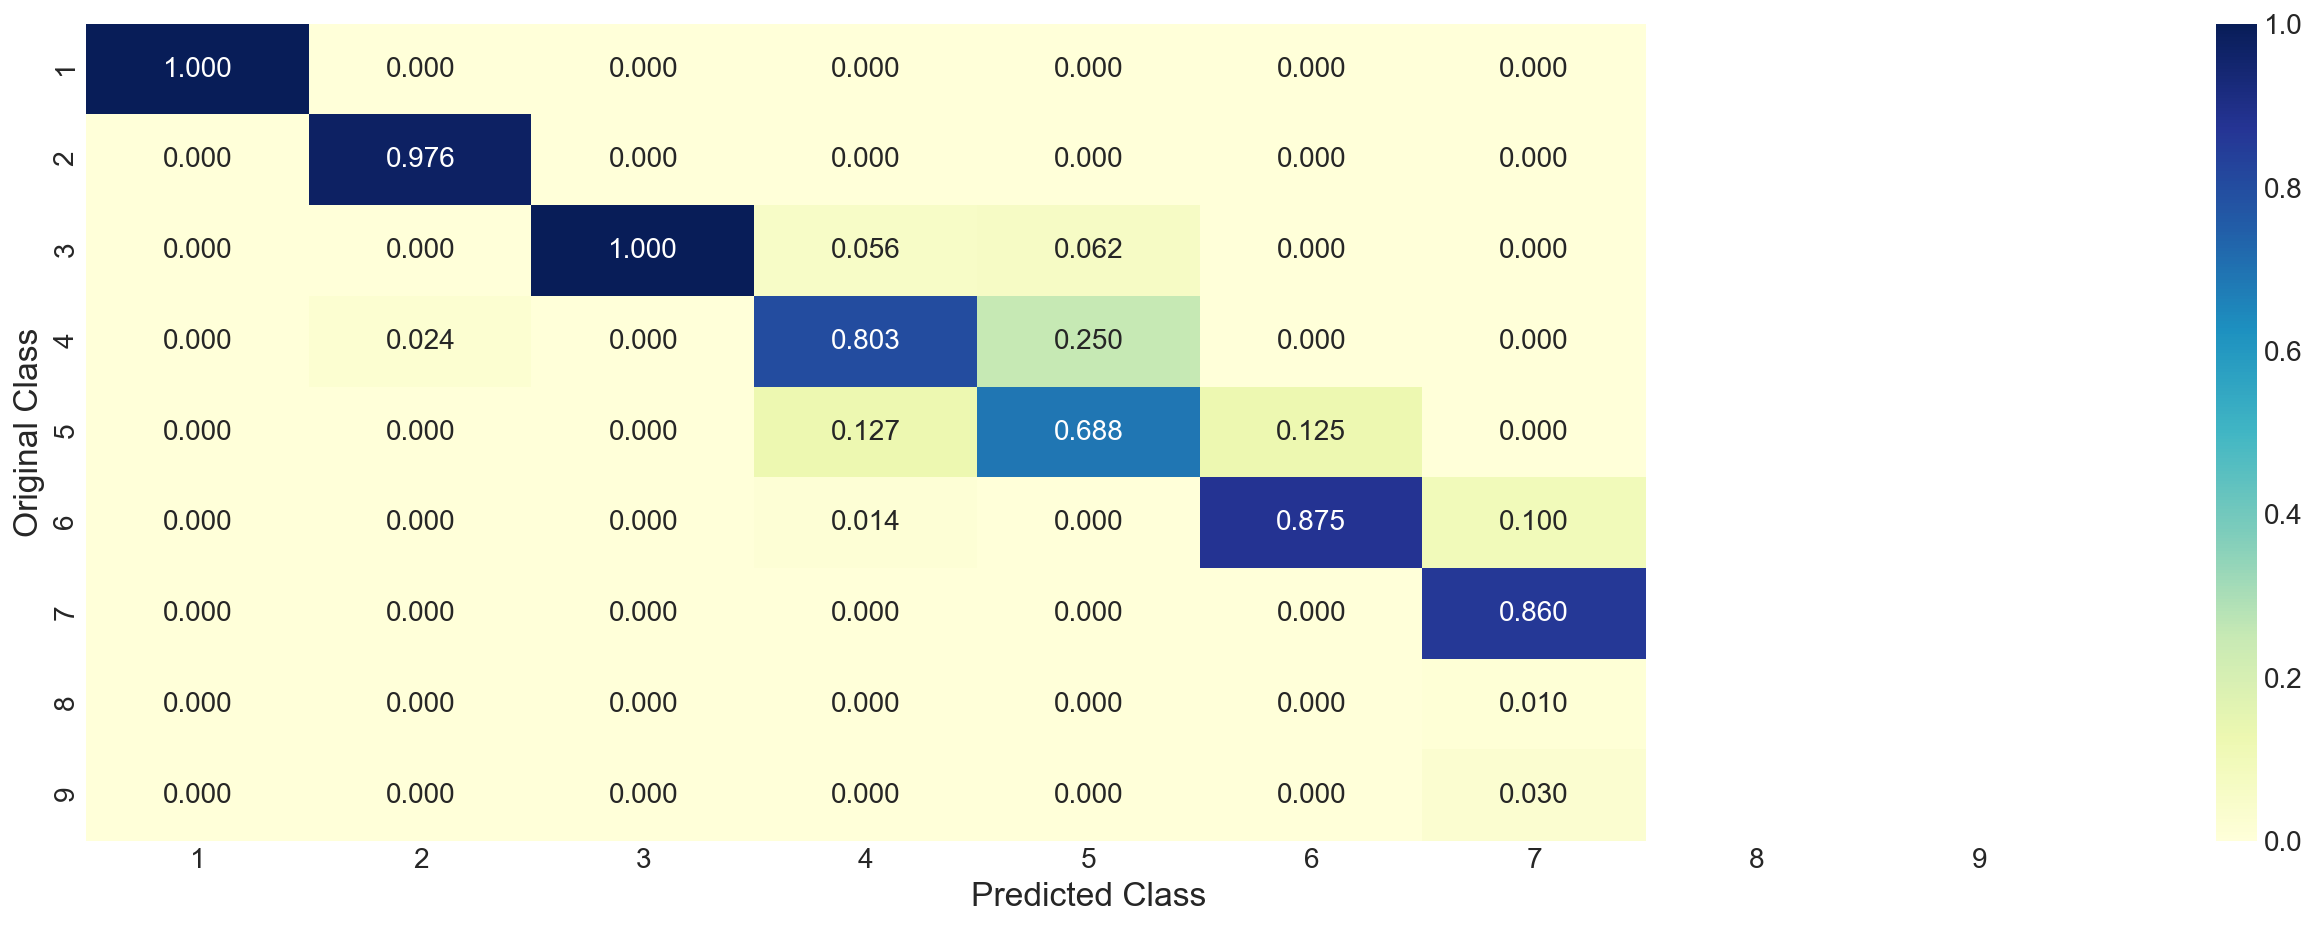

-------------------- Recall matrix (Row sum=1) --------------------


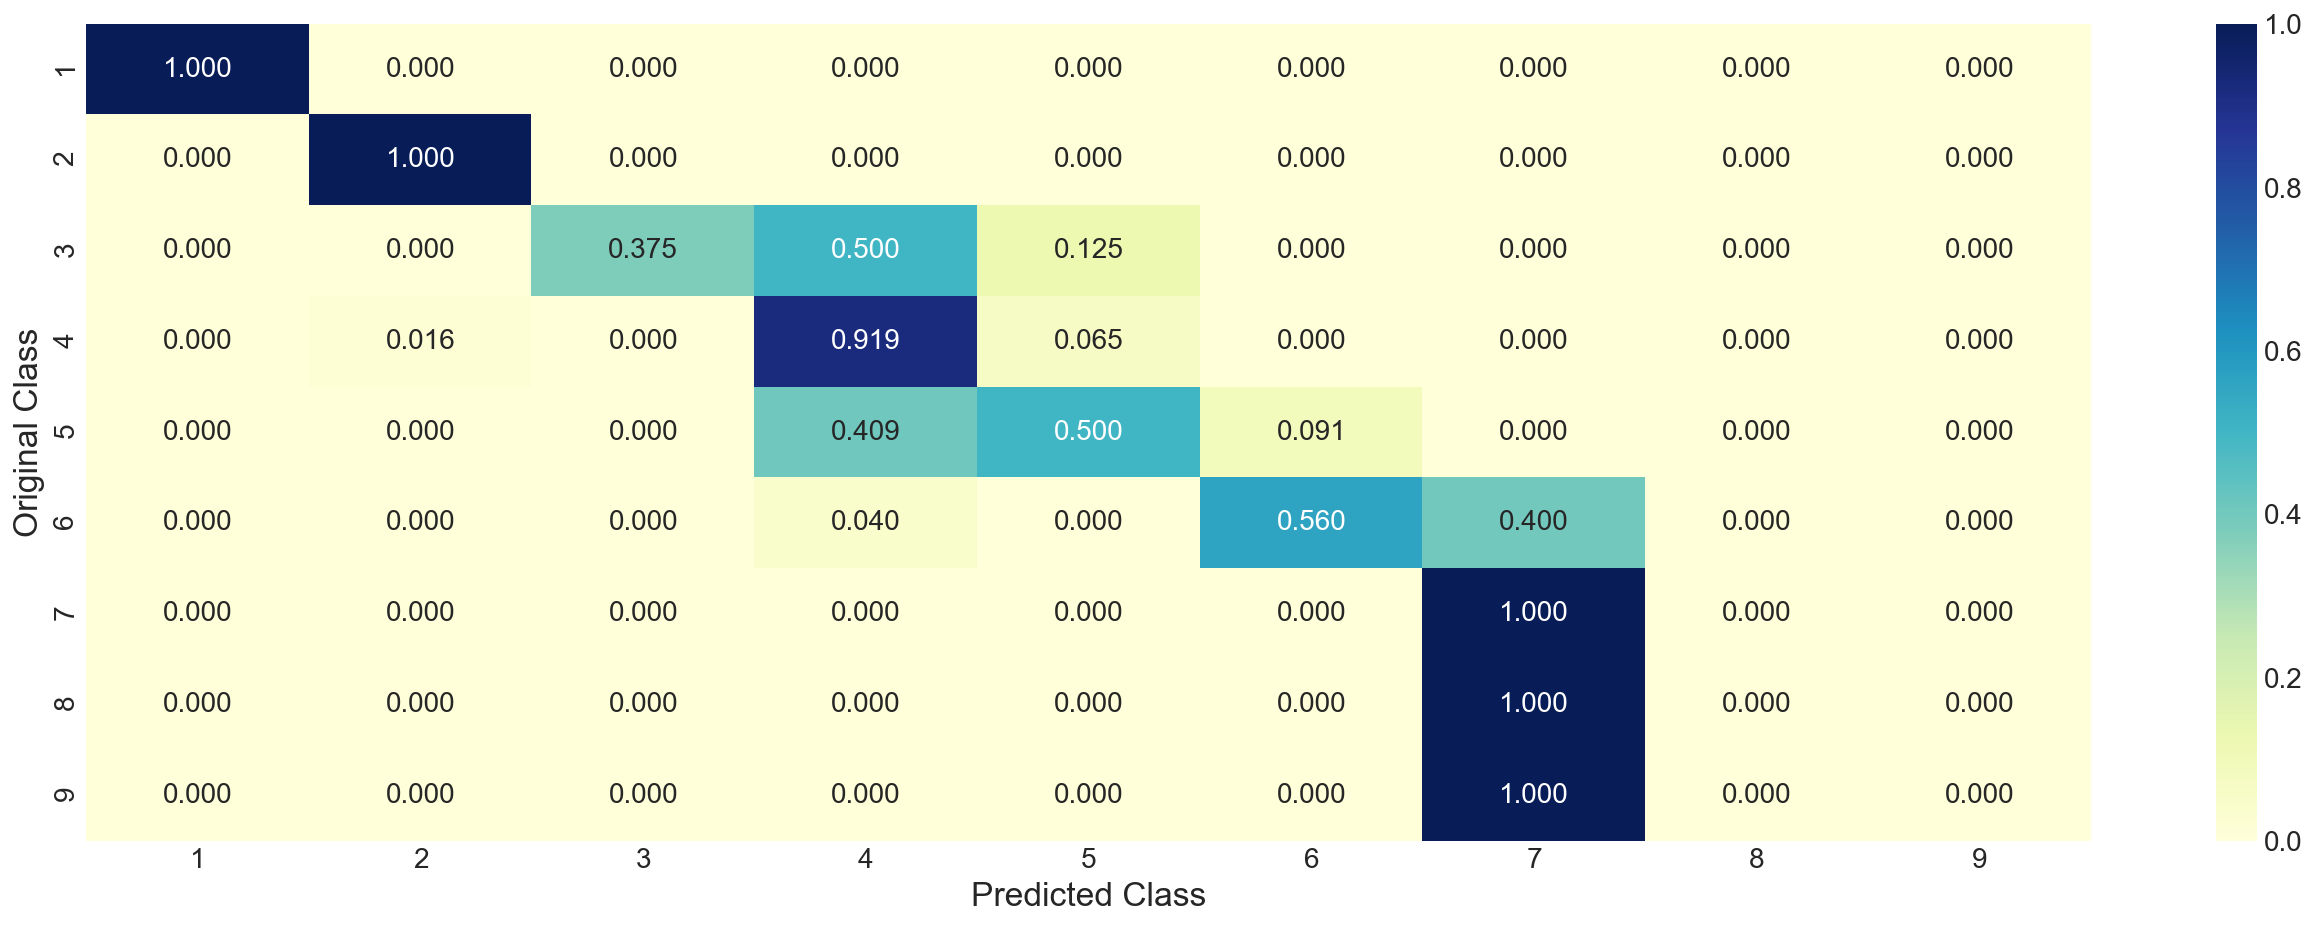

In [34]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df,y_train, cv_df, y_cv, clf)

<h1> Logistic Regresssion Without Class Balancing. </h2>

For values of alpha =  1e-05 The CV log loss is: 0.5596667320884354
For values of alpha =  0.0001 The CV log loss is: 0.5512997046020023
For values of alpha =  0.001 The CV log loss is: 0.5410590616698918
For values of alpha =  0.01 The CV log loss is: 0.6558789040700231
For values of alpha =  0.1 The CV log loss is: 0.8103934334911493
For values of alpha =  1 The CV log loss is: 0.8909080164815074
For values of alpha =  10 The CV log loss is: 0.8900241588258165
For values of alpha =  100 The CV log loss is: 0.8768415757655595
For values of alpha =  1000 The CV log loss is: 0.9081060886558412
For values of alpha =  10000 The CV log loss is: 0.9015345816328406


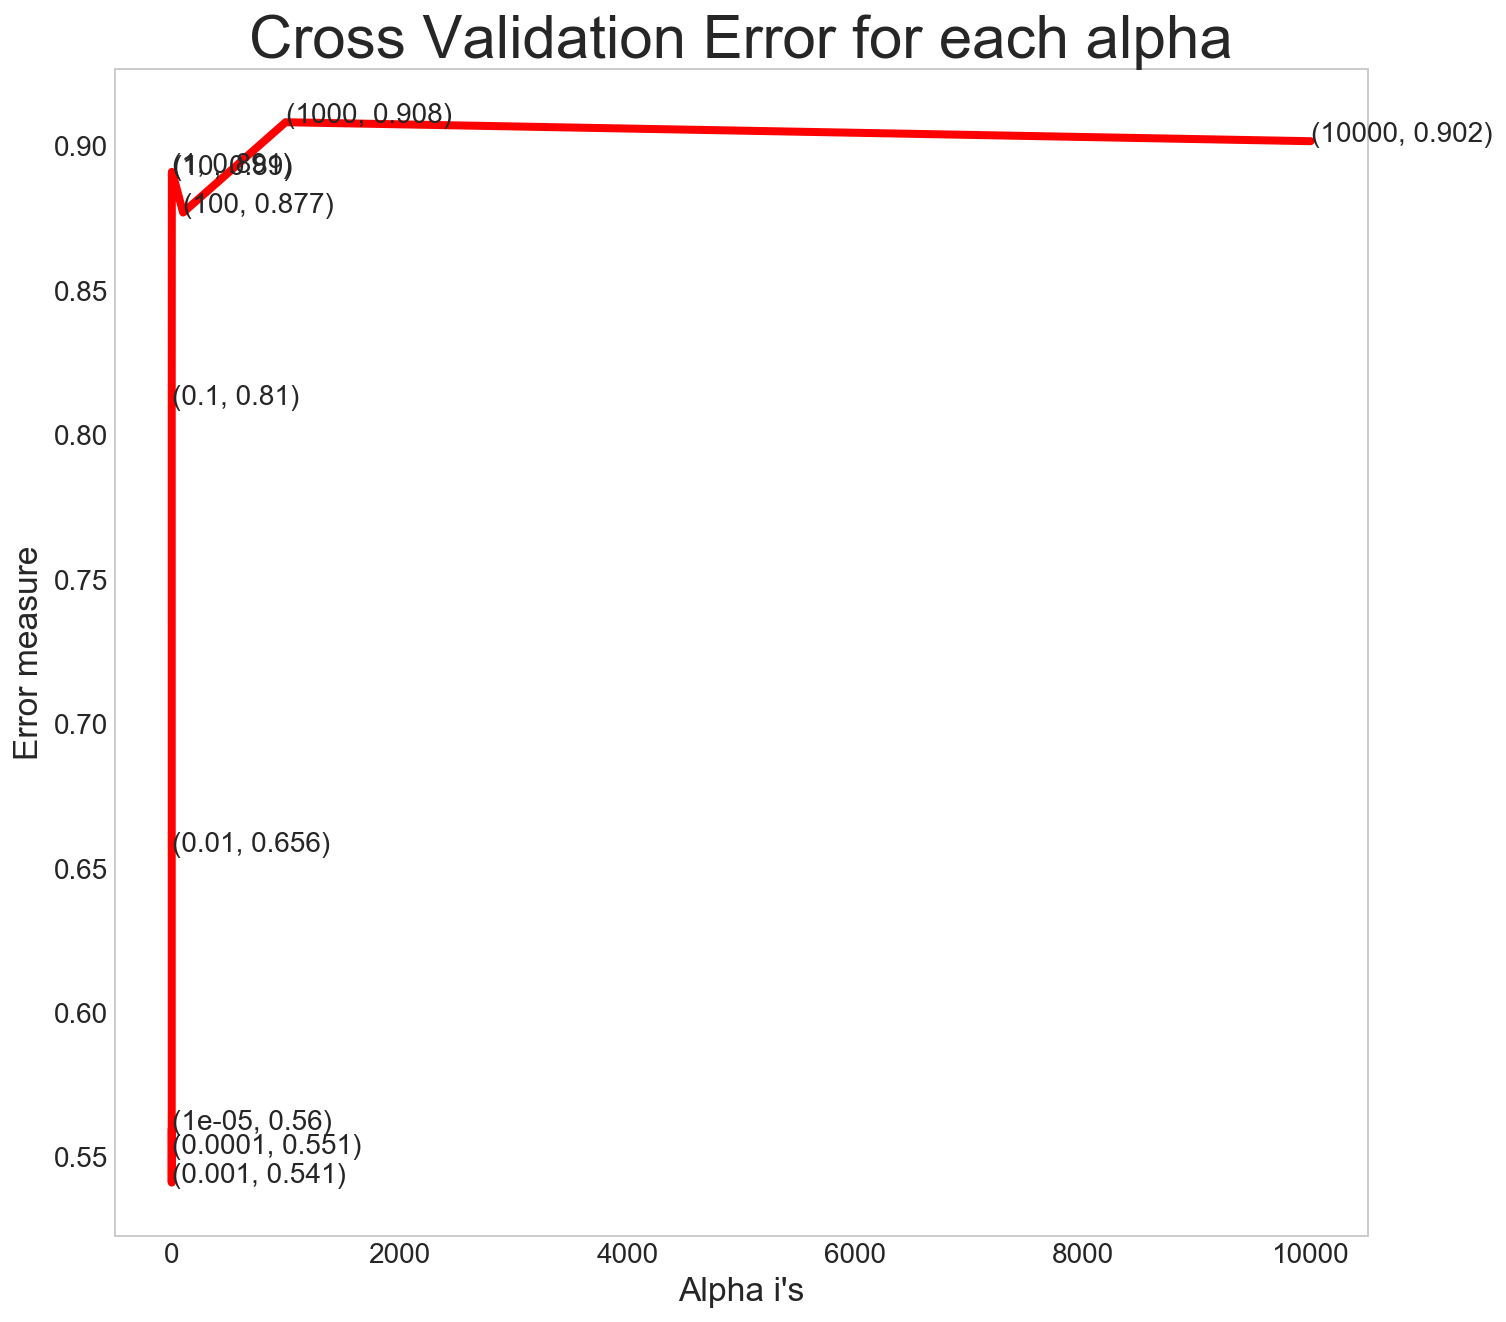

For values of best alpha =  0.001 :
The train log loss is: 0.48889067406134906
For values of best alpha =  0.001 :
The cross validation log loss is: 0.5410590616698918
For values of best alpha =  0.001 :
The test log loss is: 0.5543377342050593


In [35]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 5)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The CV log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha", fontsize = 30)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss on the CV data is : 0.5321195804810432
Number of mis-classified points are : 0.12040133779264214
-------------------- Confusion matrix --------------------


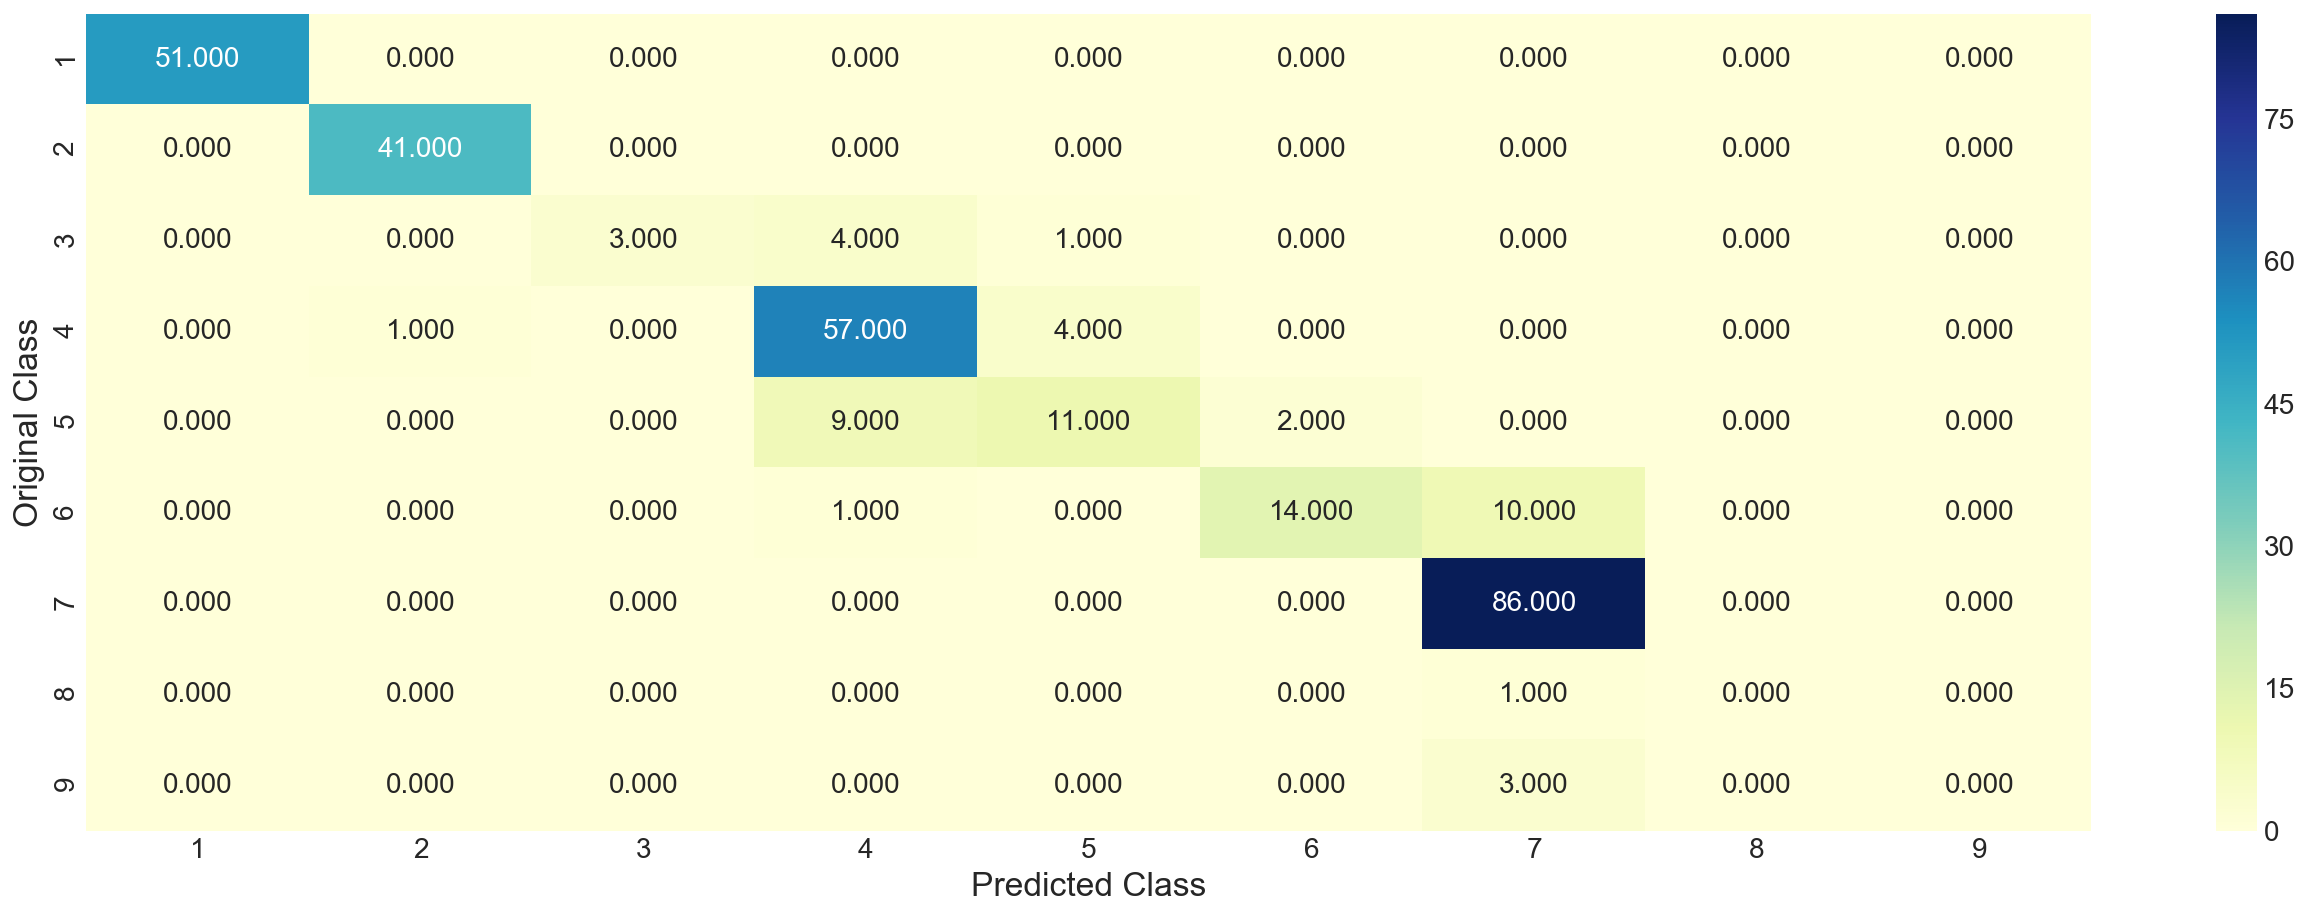

-------------------- Precision matrix (Columm Sum=1) --------------------


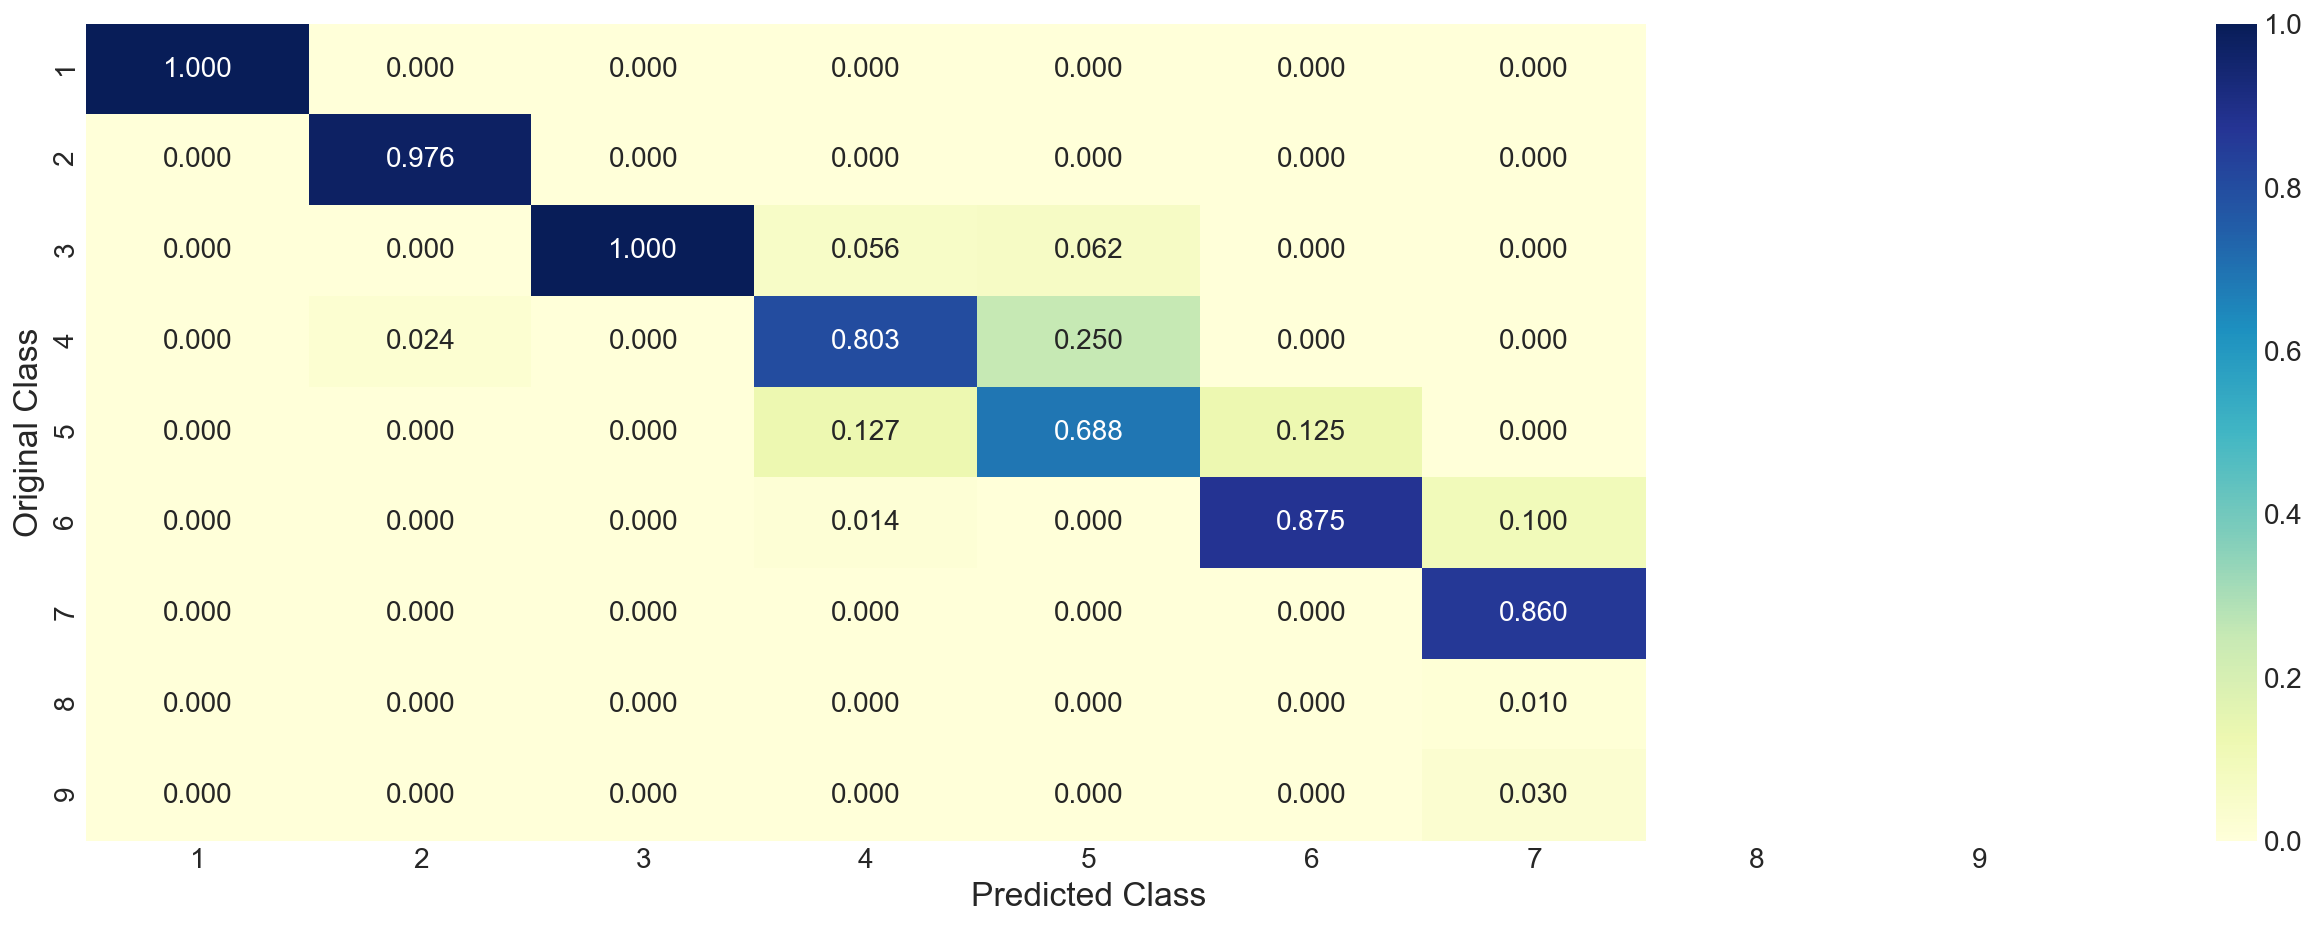

-------------------- Recall matrix (Row sum=1) --------------------


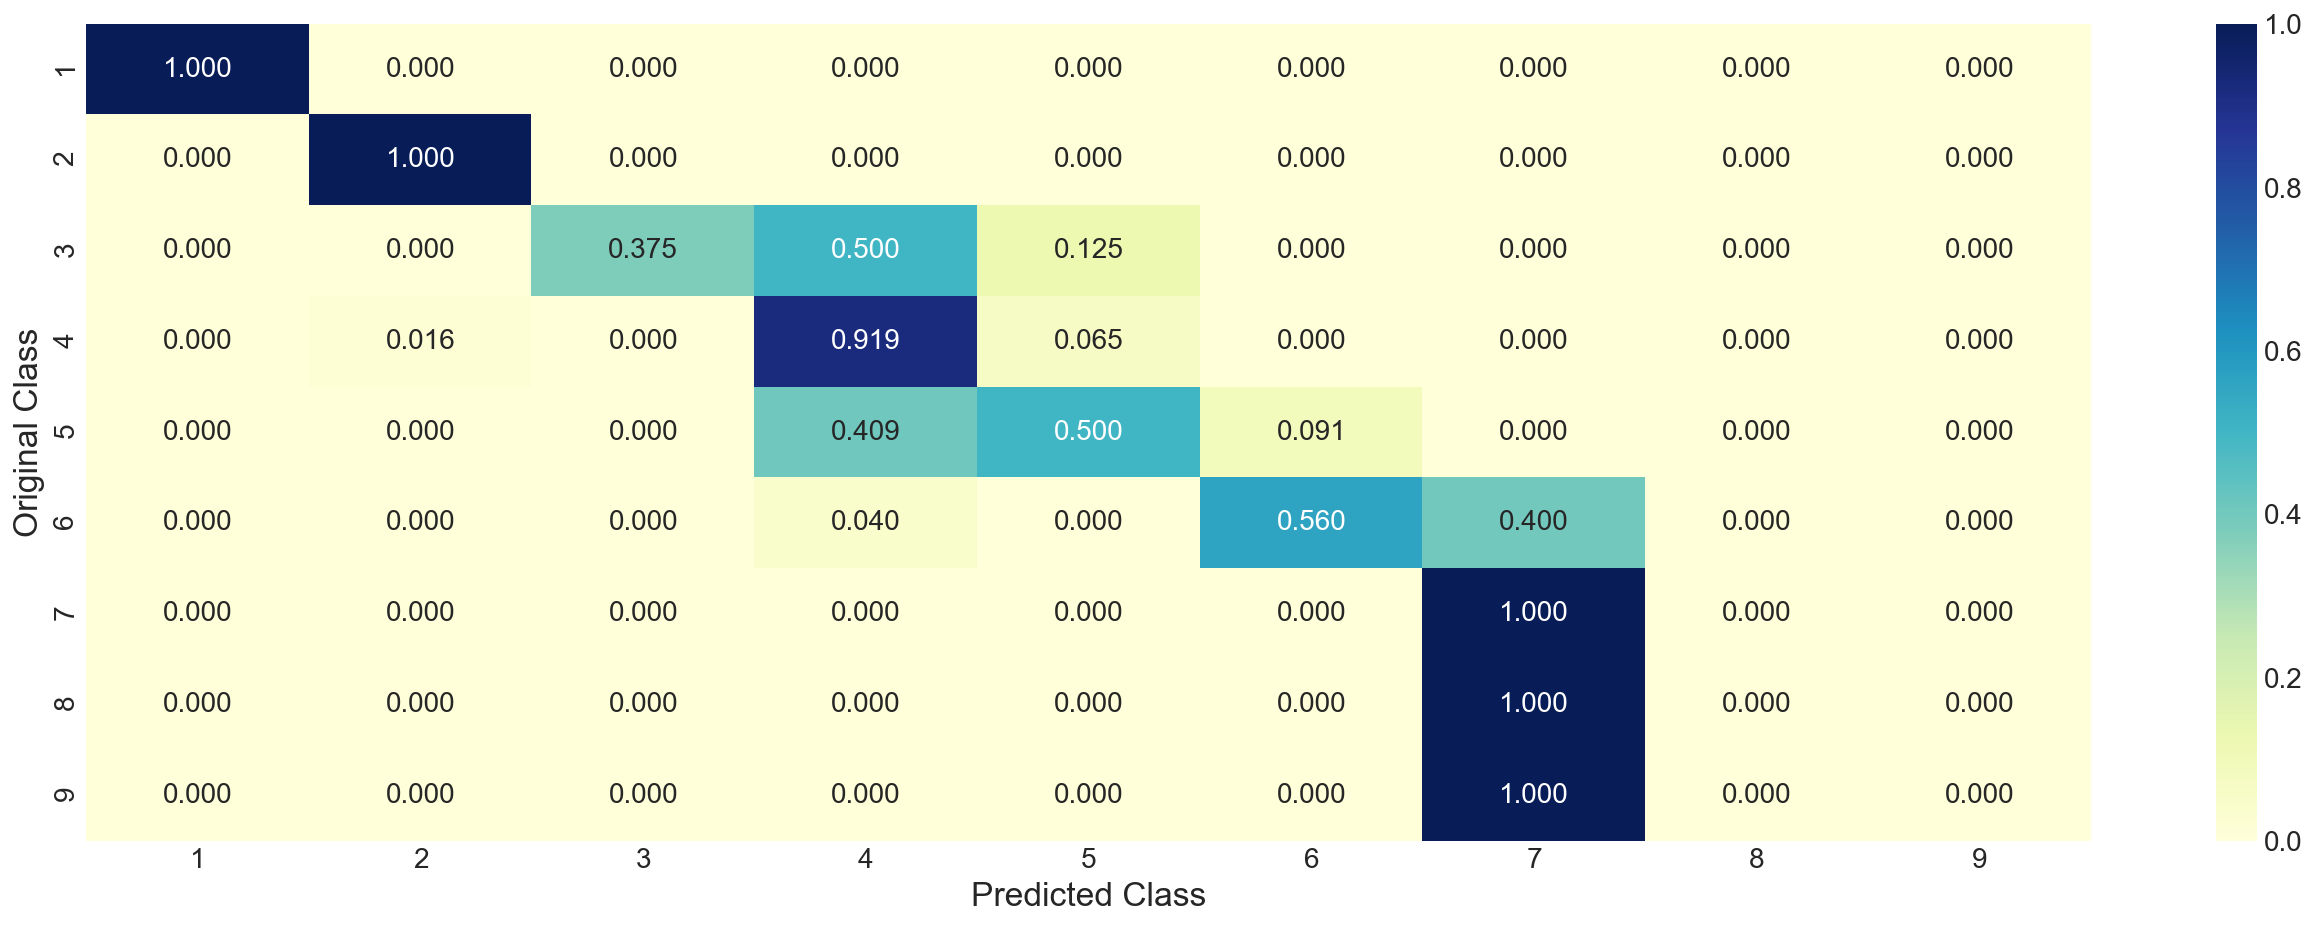

In [36]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df,y_train, cv_df, y_cv, clf)

<h1> Linear SVM </h2>

For values of alpha =  1e-05 The CV log loss is: 0.5677161291410685
For values of alpha =  0.0001 The CV log loss is: 0.5447987599858332
For values of alpha =  0.001 The CV log loss is: 0.5595899776626282
For values of alpha =  0.01 The CV log loss is: 0.5737261587118649
For values of alpha =  0.1 The CV log loss is: 0.5933504081177879
For values of alpha =  1 The CV log loss is: 0.6205821496228087
For values of alpha =  10 The CV log loss is: 0.89486483216337
For values of alpha =  100 The CV log loss is: 0.8946084948463031
For values of alpha =  1000 The CV log loss is: 0.8946085927938193
For values of alpha =  10000 The CV log loss is: 0.8946085094360248


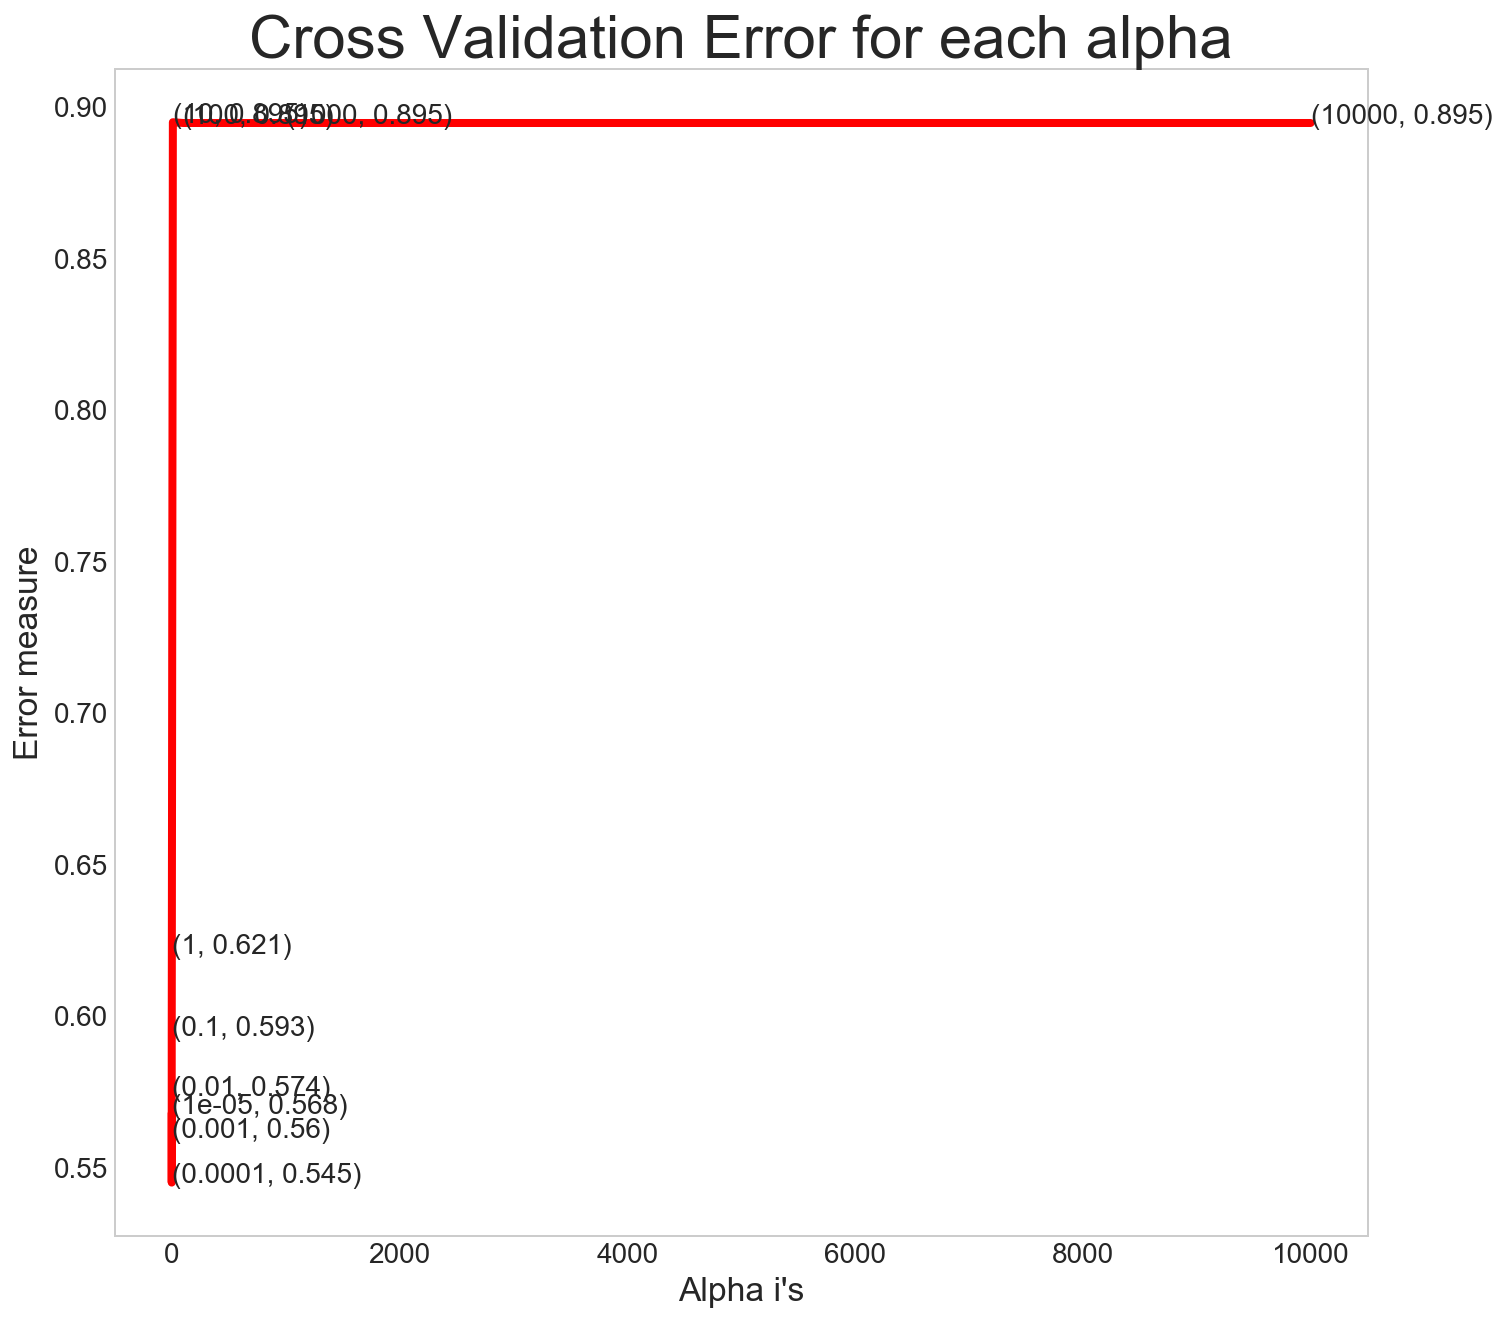

For values of best alpha =  0.0001 :
The train log loss is: 0.46303134975015037
For values of best alpha =  0.0001 :
The cross validation log loss is: 0.5512997046020023
For values of best alpha =  0.0001 :
The test log loss is: 0.5519222450584529


In [37]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 5)]



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The CV log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha", fontsize = 30)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss on the CV data is : 0.5447987599858332
Number of mis-classified points are : 0.15384615384615385
-------------------- Confusion matrix --------------------


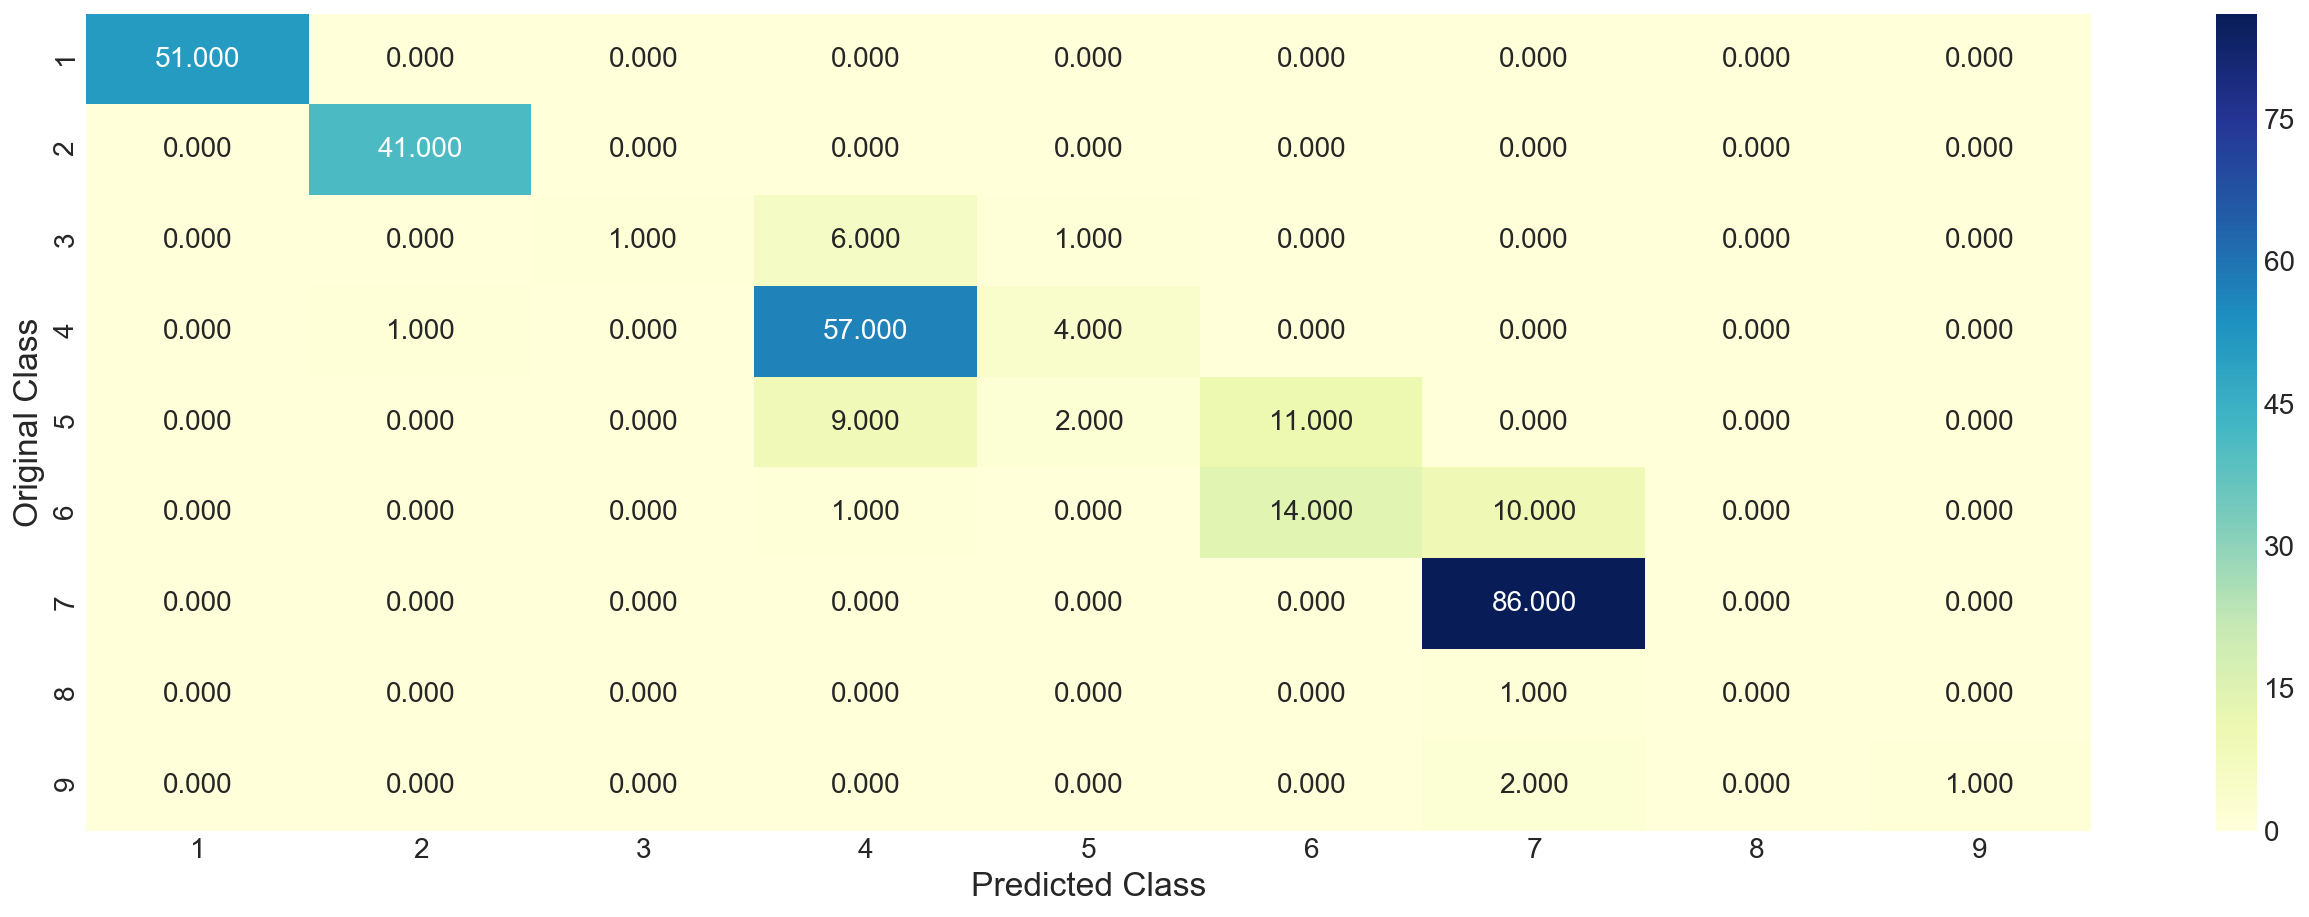

-------------------- Precision matrix (Columm Sum=1) --------------------


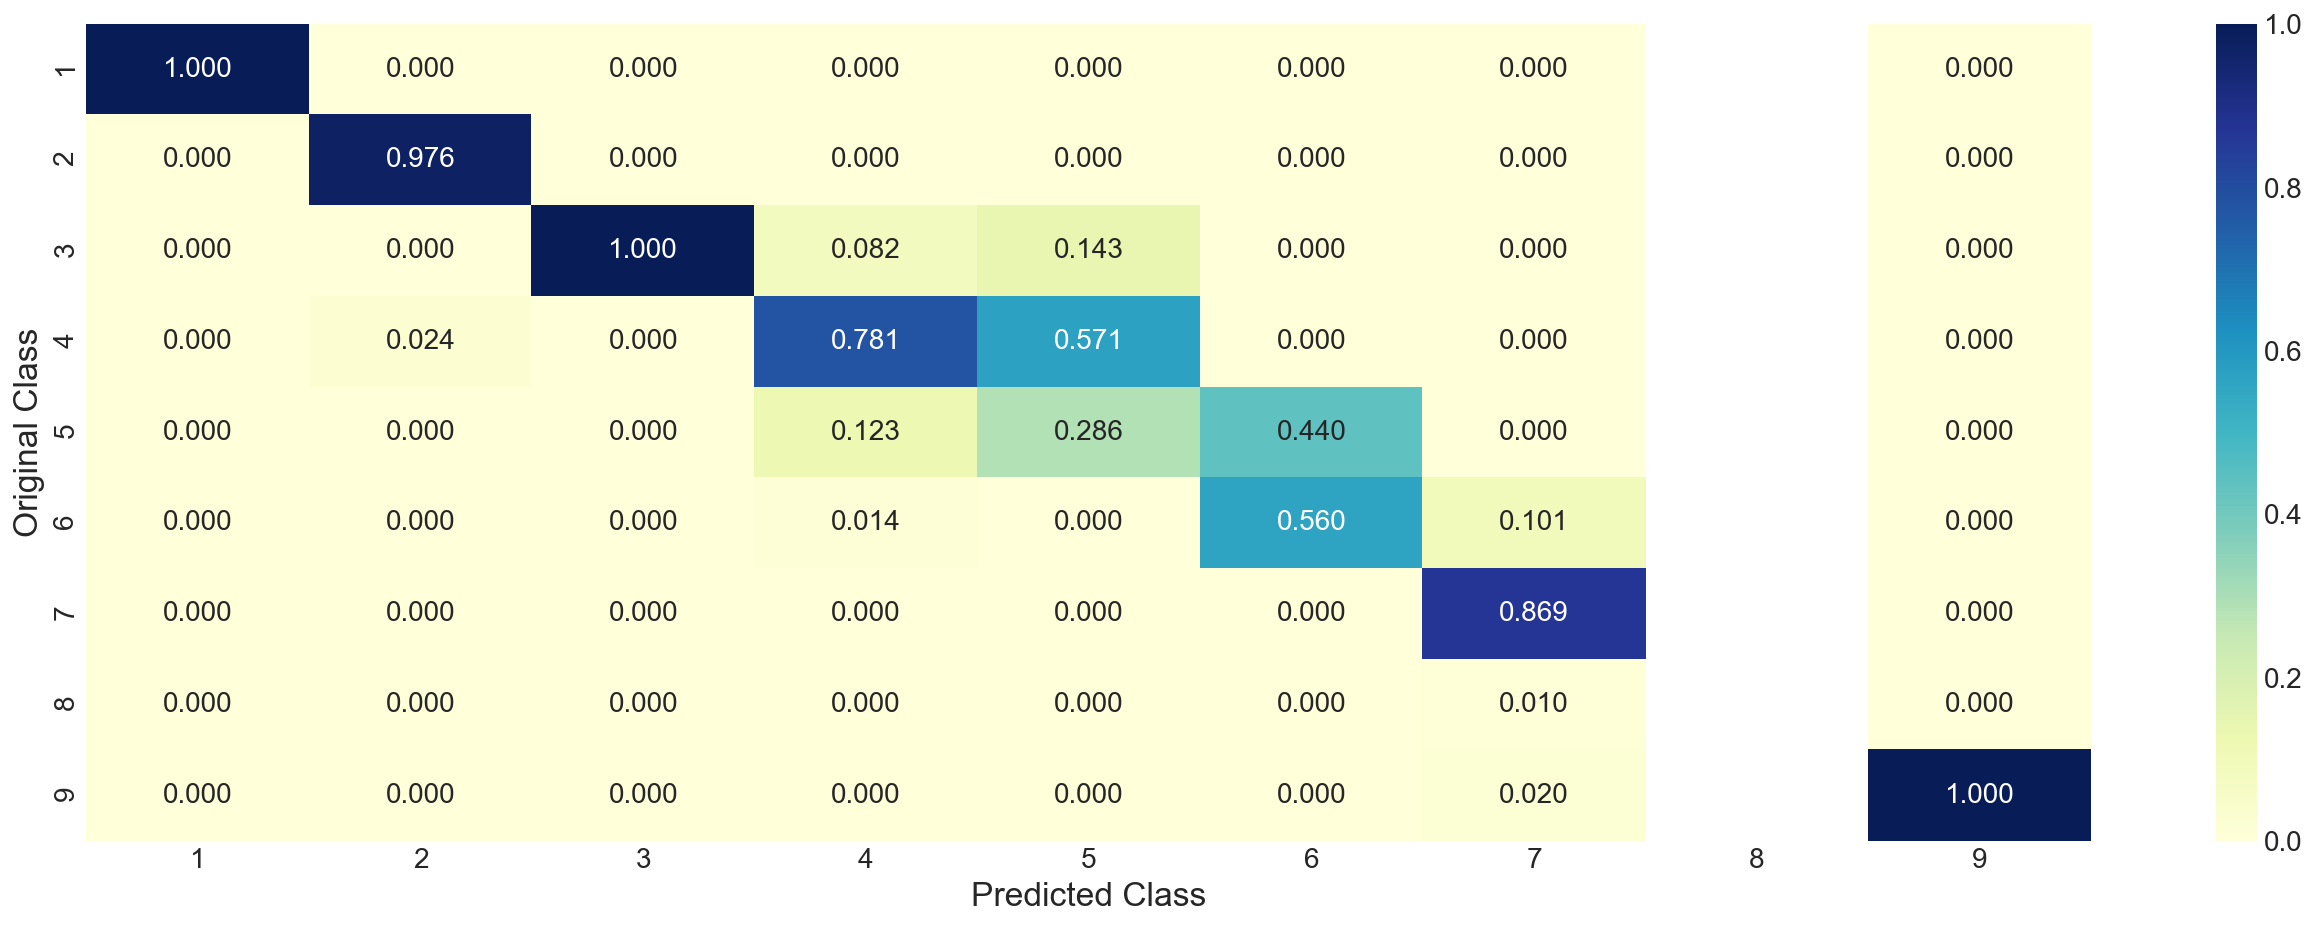

-------------------- Recall matrix (Row sum=1) --------------------


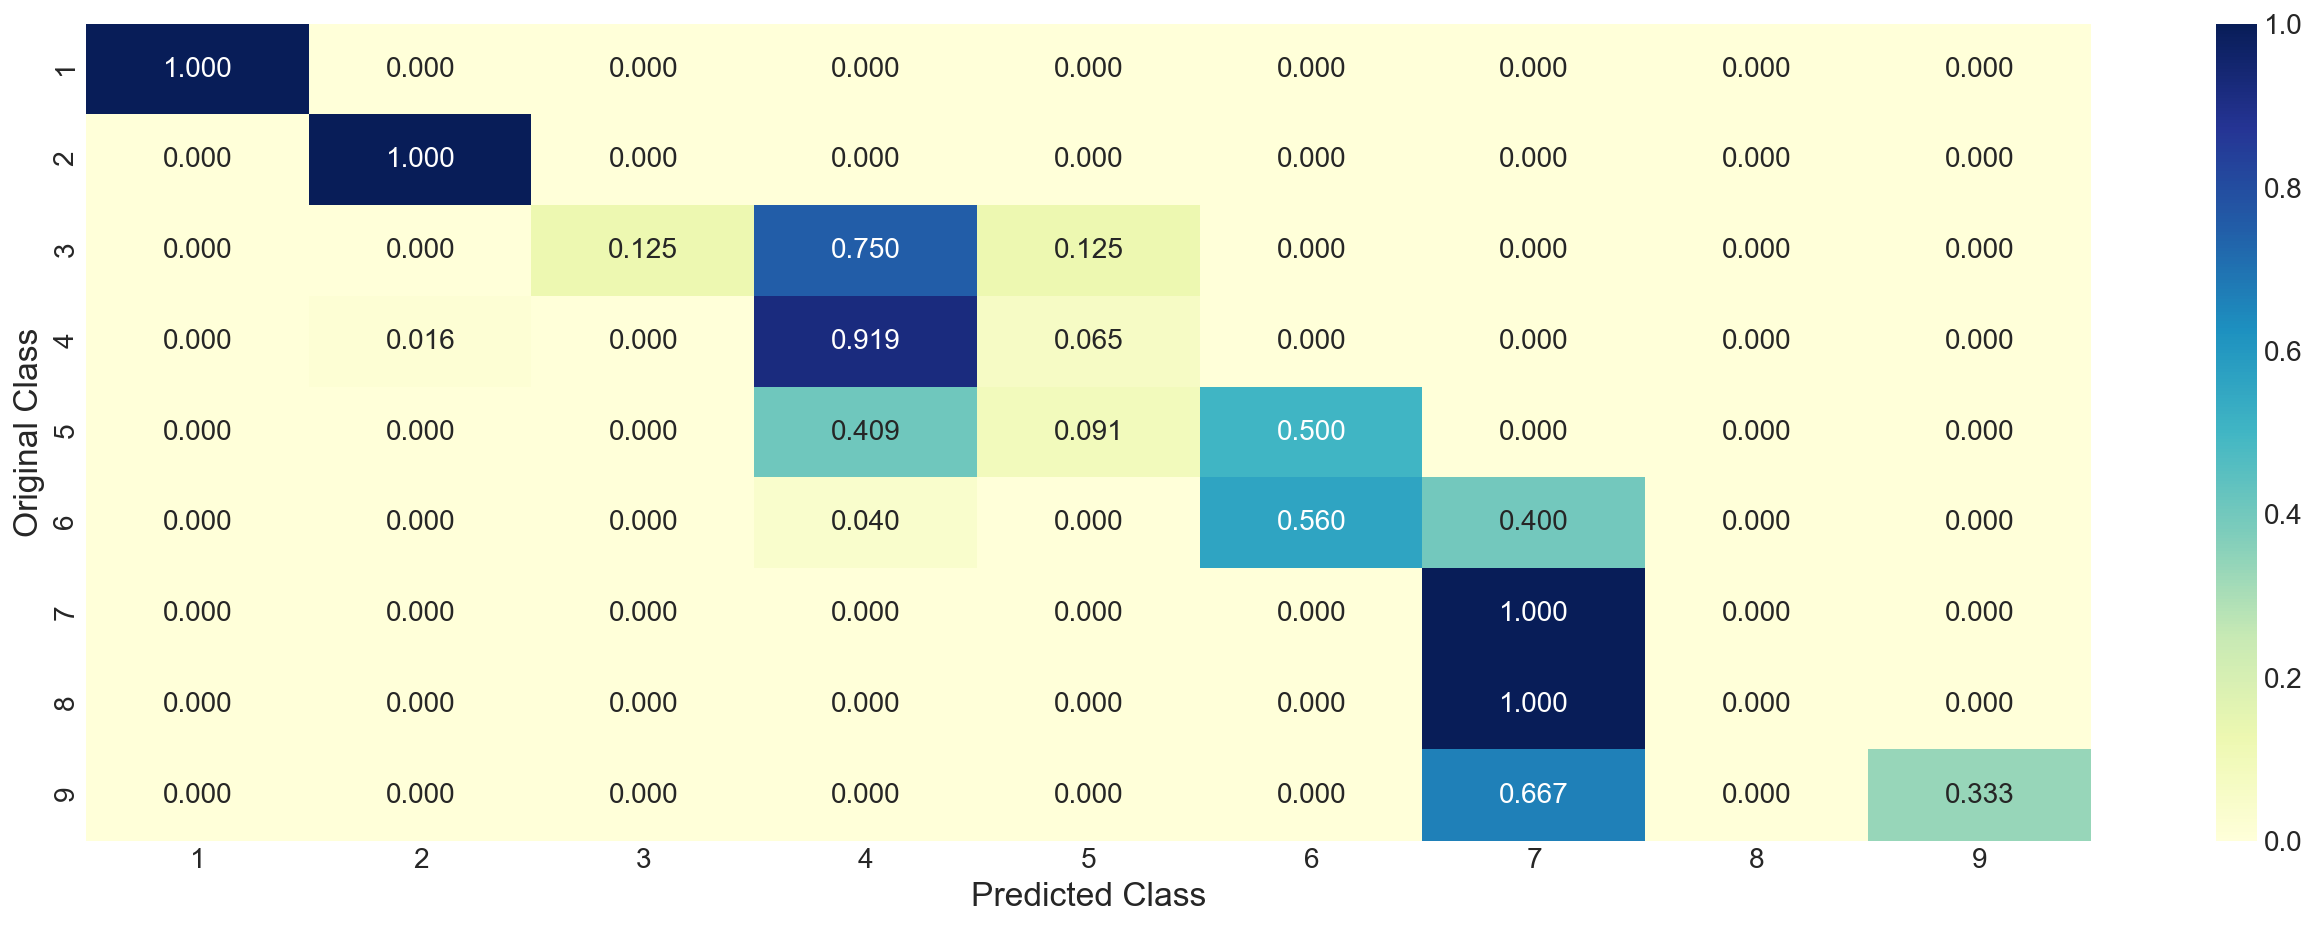

In [38]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df,y_train, cv_df, y_cv, clf)

<h2> Naive Bayes </h2>

For values of alpha =  1e-05 The CV log loss is: 0.8654051280349868
For values of alpha =  0.0001 The CV log loss is: 0.8610787132347254
For values of alpha =  0.001 The CV log loss is: 0.8422540447948242
For values of alpha =  0.01 The CV log loss is: 0.7900205317466638
For values of alpha =  0.1 The CV log loss is: 0.7701667380850933
For values of alpha =  1 The CV log loss is: 0.9304470823703267
For values of alpha =  10 The CV log loss is: 1.0534581751386025
For values of alpha =  100 The CV log loss is: 0.9778621348550534
For values of alpha =  1000 The CV log loss is: 0.9383129170458647
For values of alpha =  10000 The CV log loss is: 0.8810663220051524


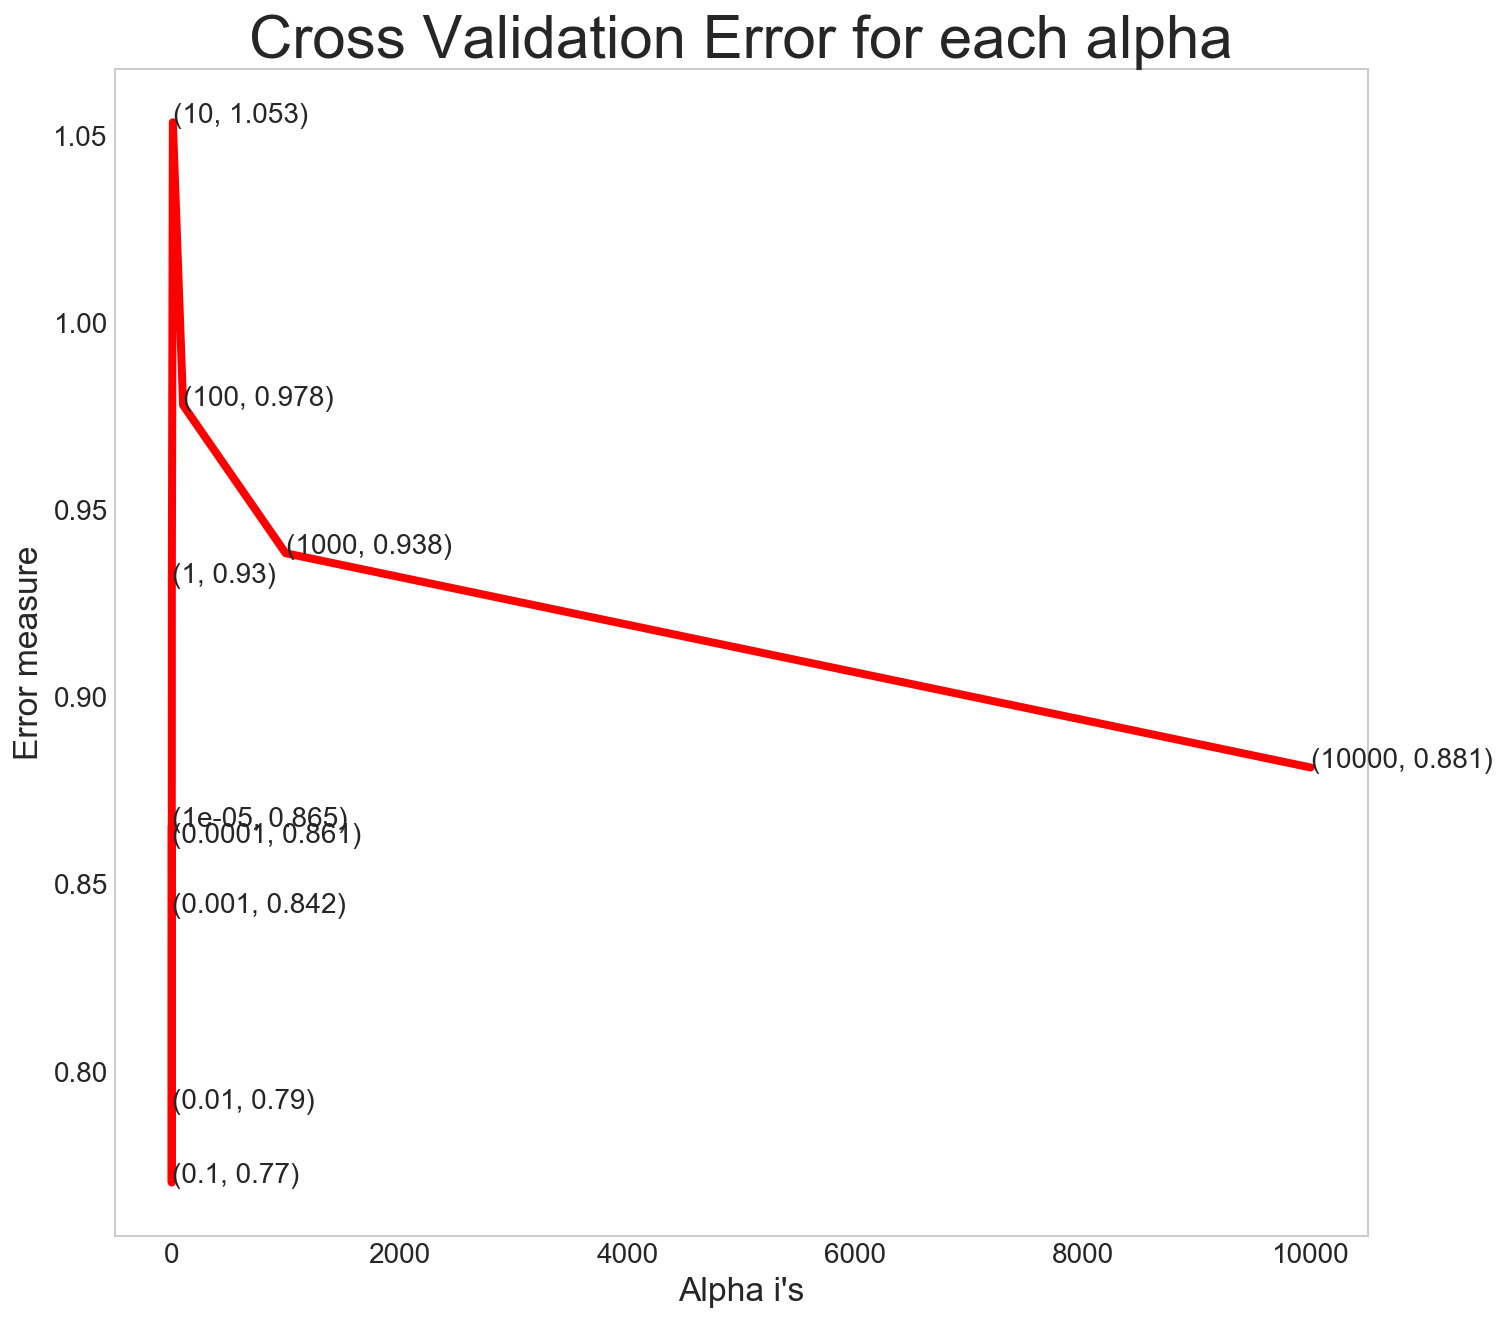

For values of best alpha =  0.1 :
The train log loss is: 0.8119158956710278
For values of best alpha =  0.1 :
The cross validation log loss is: 0.8103934334911493
For values of best alpha =  0.1 :
The test log loss is: 0.8217477462357995


In [46]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 5)]



cv_log_error_array=[]
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The CV log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha", fontsize = 30)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], ":\nThe test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss on the CV data is : 0.7701667380850933
Number of mis-classified points are : 0.23076923076923078
-------------------- Confusion matrix --------------------


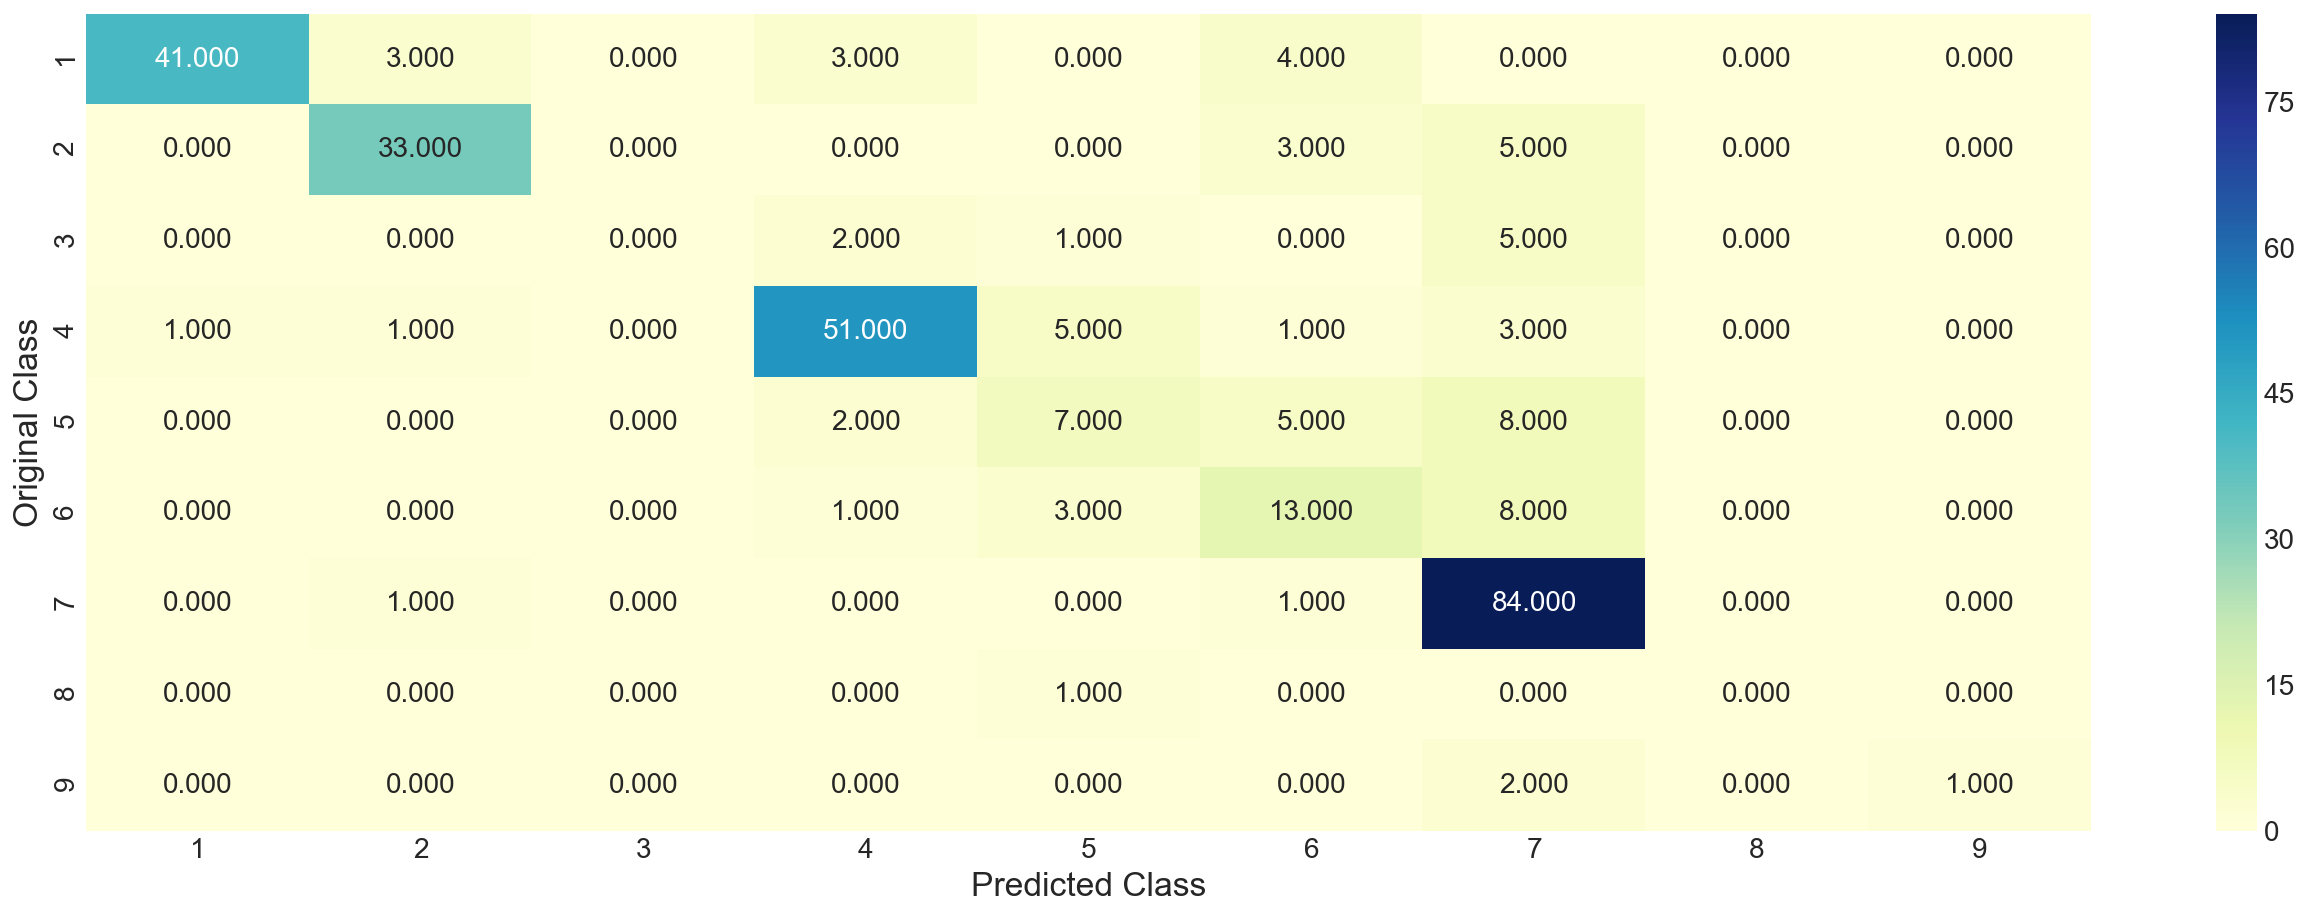

-------------------- Precision matrix (Columm Sum=1) --------------------


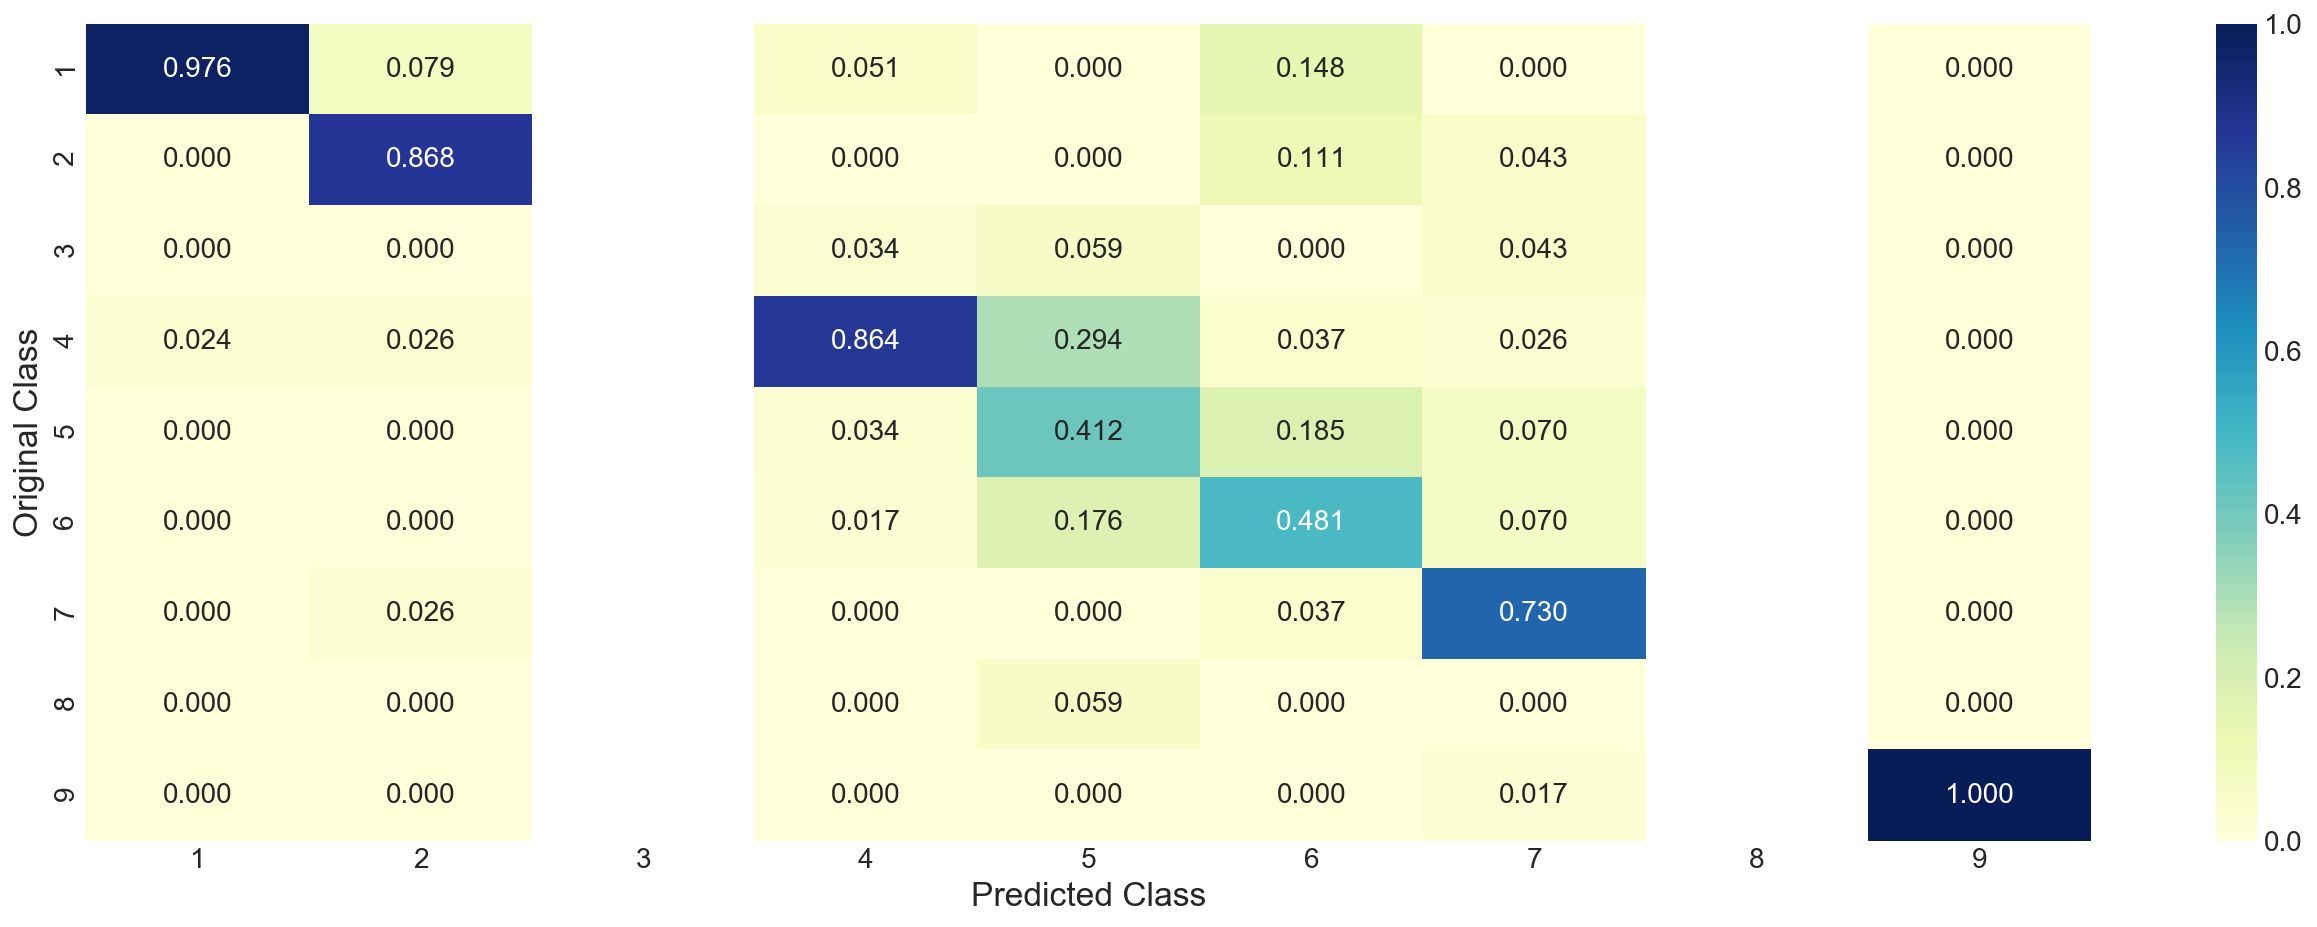

-------------------- Recall matrix (Row sum=1) --------------------


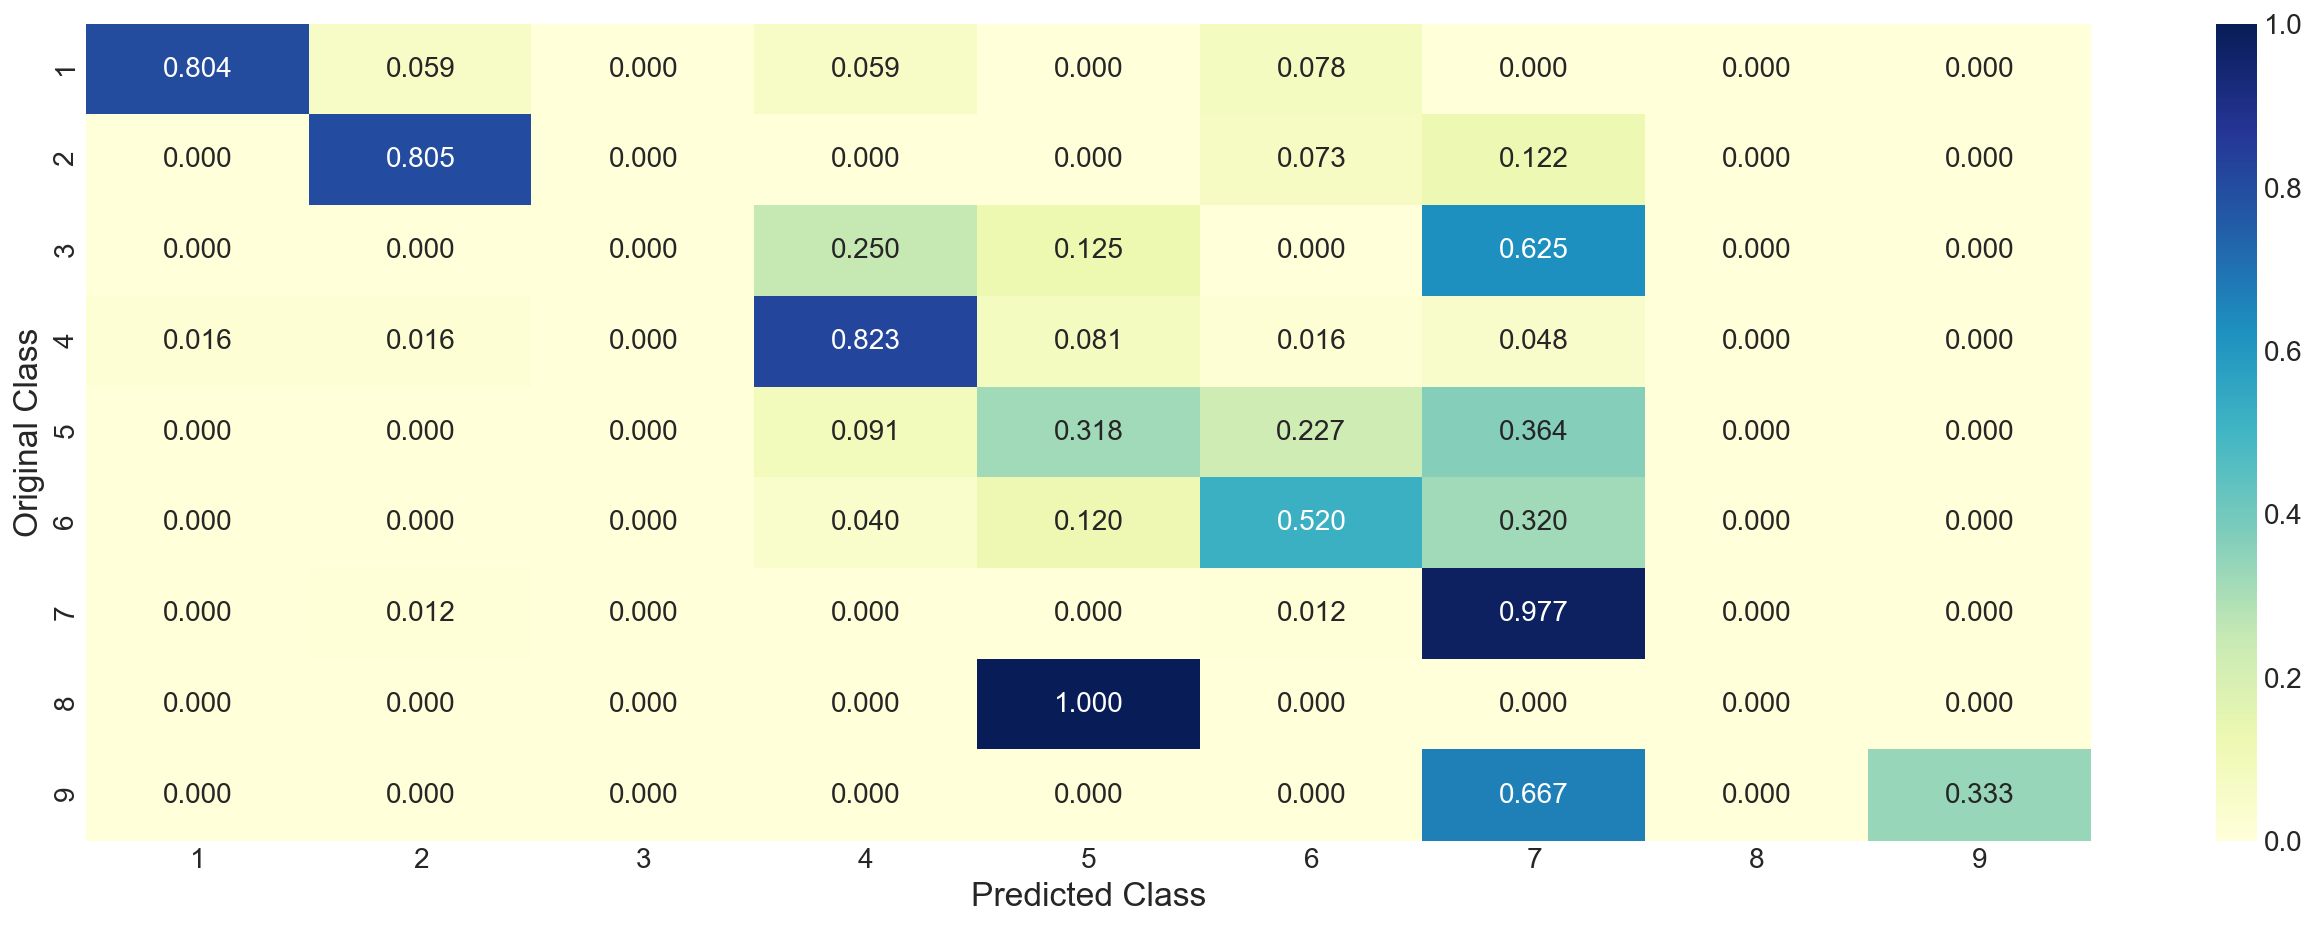

In [47]:
clf = MultinomialNB(alpha=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df,y_train, cv_df, y_cv, clf)

<h2> KNN </h2>

for neighbors = 5
Log Loss : 0.15047765842206237
for neighbors = 11
Log Loss : 0.13949342747213464
for neighbors = 15
Log Loss : 0.12909473708460414
for neighbors = 21
Log Loss : 0.12237491000929109
for neighbors = 31
Log Loss : 0.09886383655349289
for neighbors = 41
Log Loss : 0.07782616122839782
for neighbors = 51
Log Loss : 0.07990742695288668
for neighbors = 61
Log Loss : 0.07483065051460676
for neighbors = 71
Log Loss : 0.07169398452550704
for neighbors = 81
Log Loss : 0.0751355645307895
for neighbors = 99
Log Loss : 0.055120608546202814
for neighbors = 111
Log Loss : 0.04342990283381133
for neighbors = 120
Log Loss : 0.036845190854093754
for neighbors = 130
Log Loss : 0.03217658565209709
for neighbors = 140
Log Loss : 0.029383384138248834
for neighbors = 150
Log Loss : 0.027658664802383427
for neighbors = 160
Log Loss : 0.02598342528020149
for neighbors = 170
Log Loss : 0.024865358693719378
for neighbors = 180
Log Loss : 0.024446731502517745
for neighbors = 190
Log Loss : 0.02435

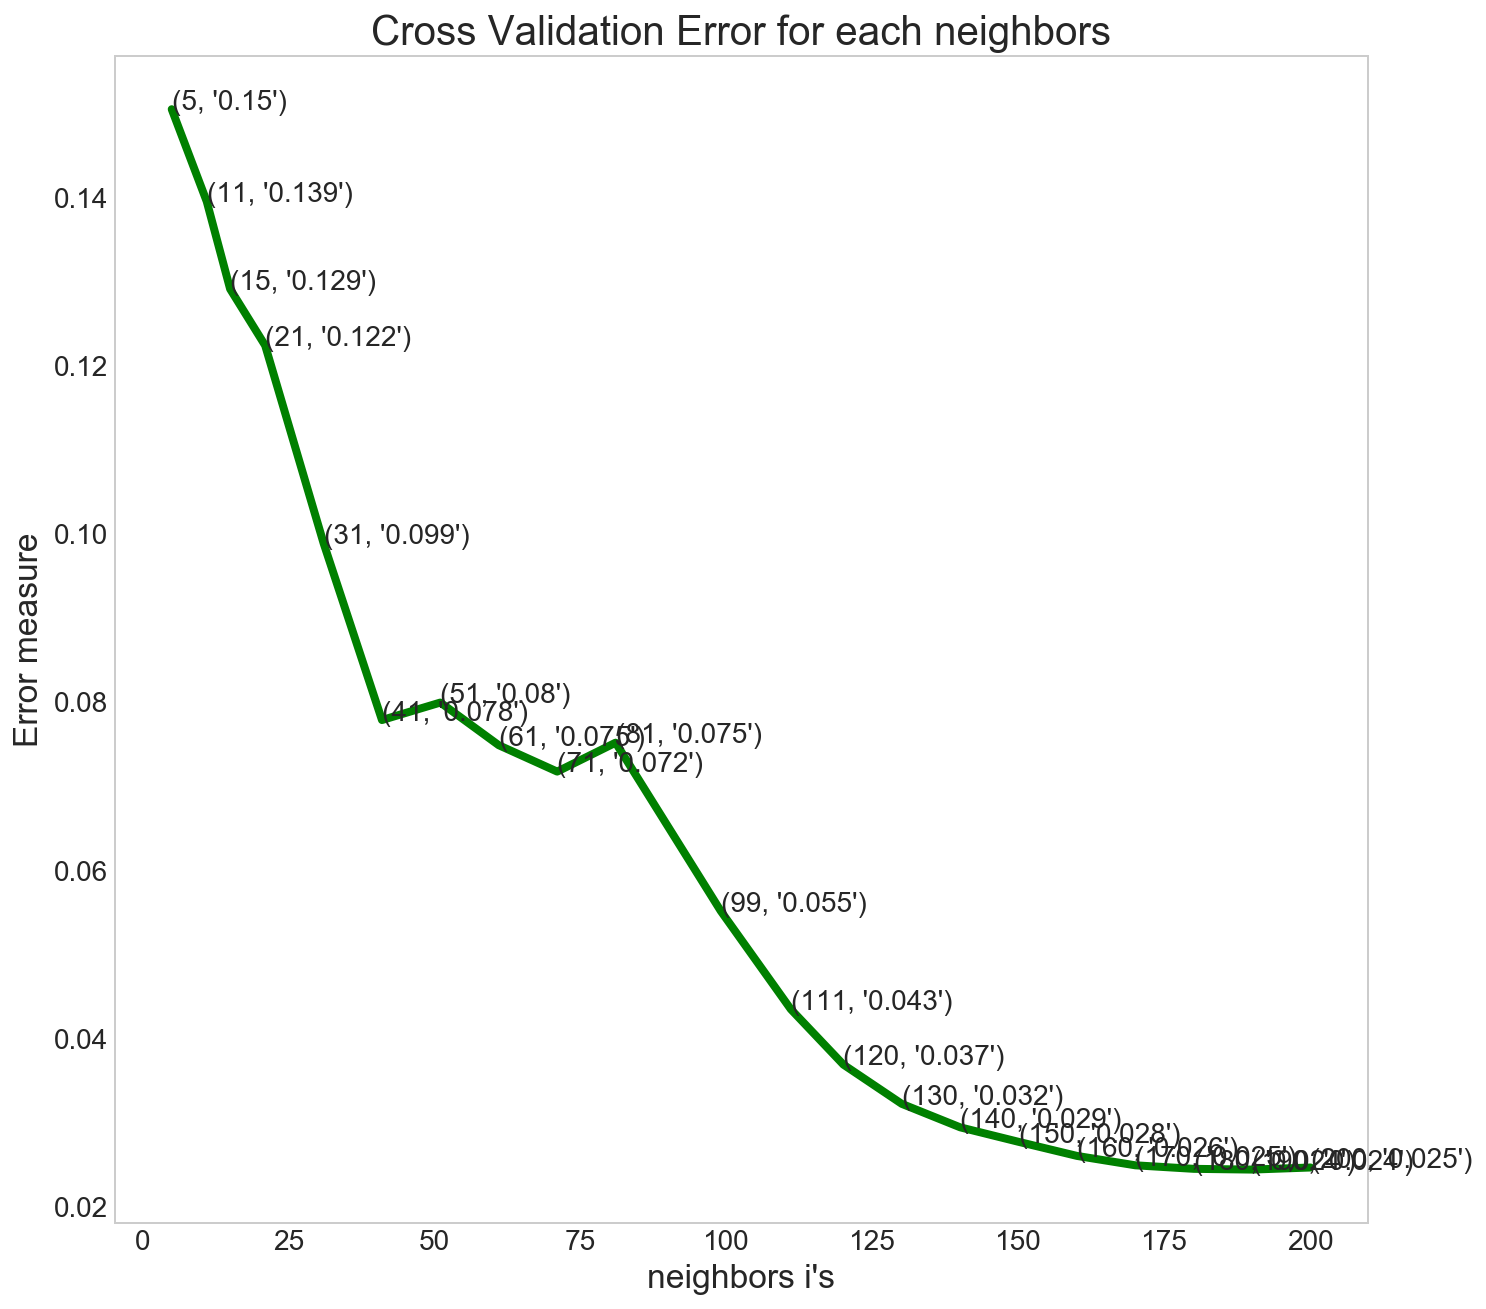

For values of best neighbors =  190 The train log loss is: 0.02877837995006499
For values of best neighbors =  190 The cross validation log loss is: 0.024357693662290986
For values of best neighbors =  190 The test log loss is: 0.029677772287833682


In [41]:
neighbors = [5, 11, 15, 21, 31, 41, 51, 61, 71, 81, 99, 111, 120,130,140,150,160,170,180,190,200]
cv_log_error_array = []
for i in neighbors:
    print("for neighbors =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(neighbors, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((neighbors[i],str(txt)), (neighbors[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each neighbors")
plt.xlabel("neighbors i's")
plt.ylabel("Error measure")
plt.show()


best_neighbors = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=neighbors[best_neighbors])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best neighbors = ', neighbors[best_neighbors], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best neighbors = ', neighbors[best_neighbors], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best neighbors = ', neighbors[best_neighbors], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss on the CV data is : 0.024357693662290986
Number of mis-classified points are : 0.0033444816053511705
-------------------- Confusion matrix --------------------


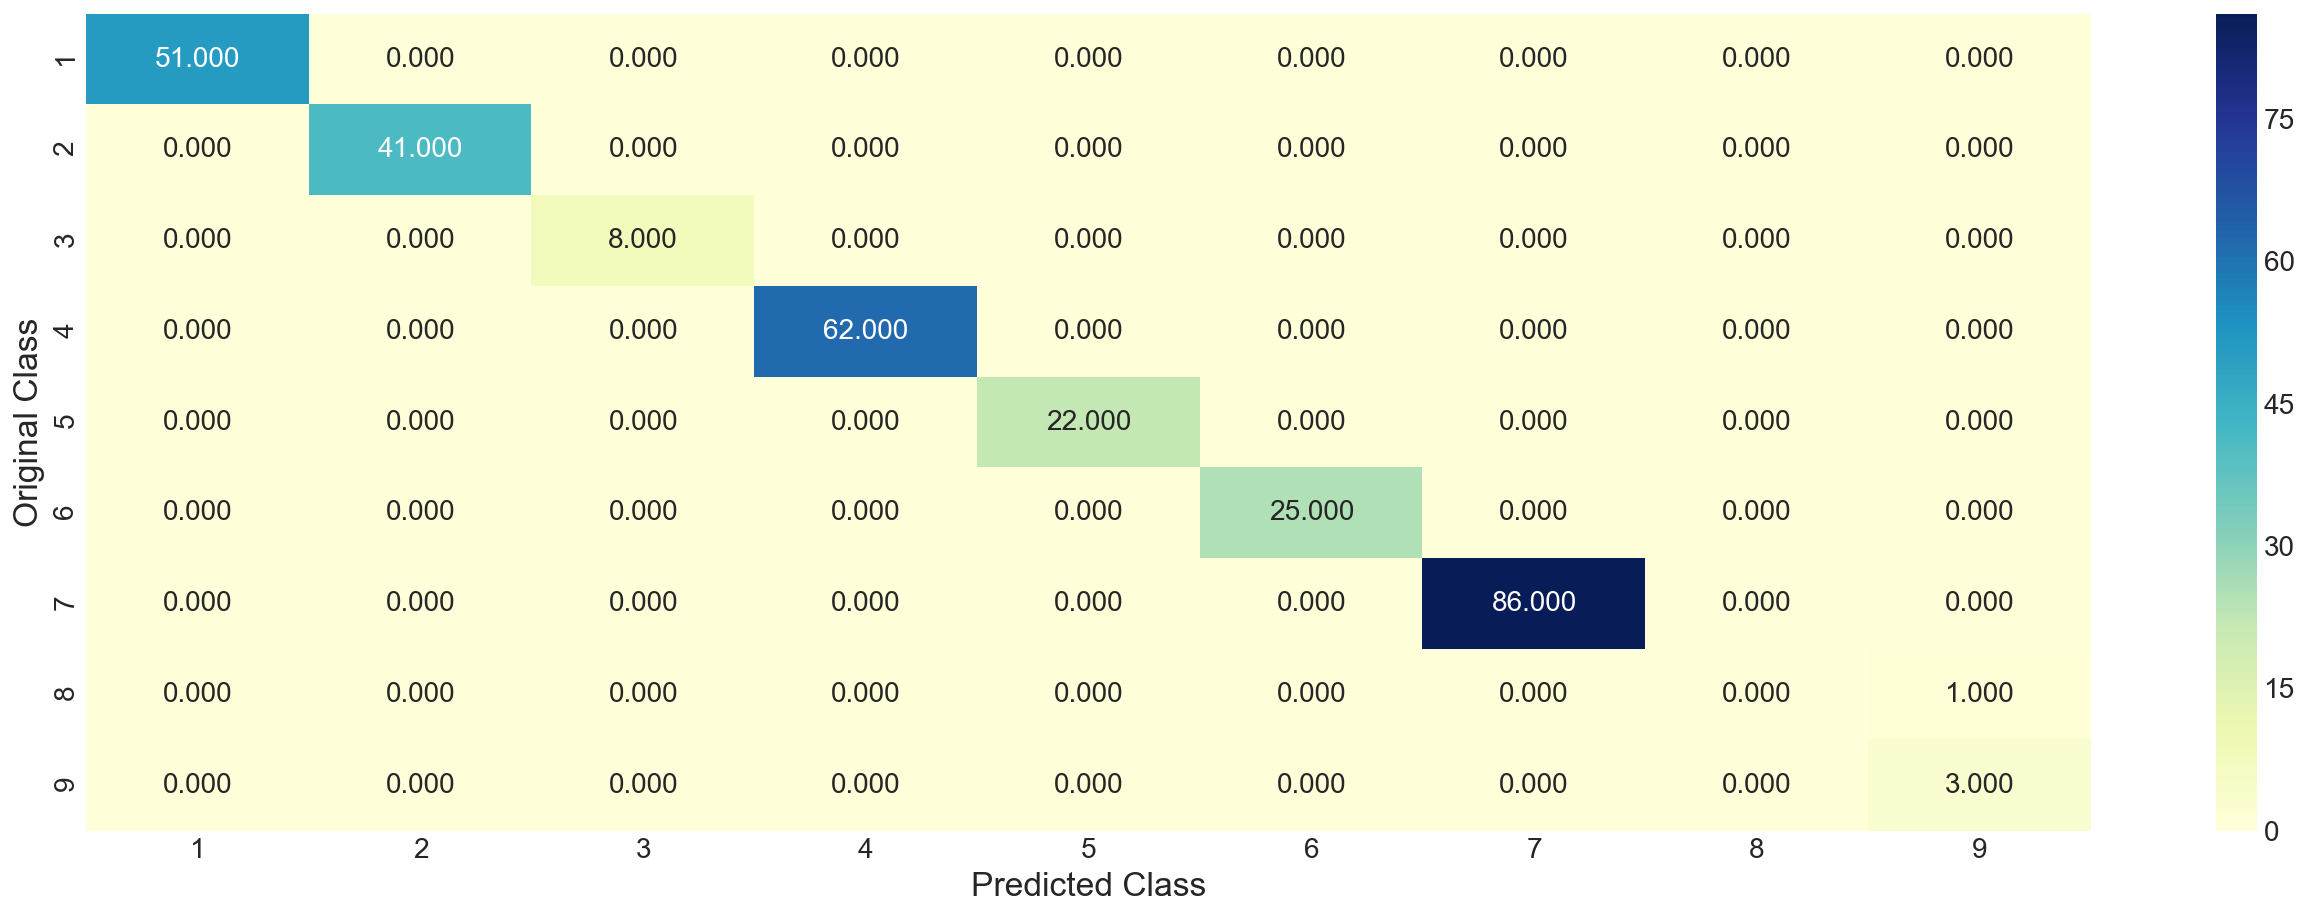

-------------------- Precision matrix (Columm Sum=1) --------------------


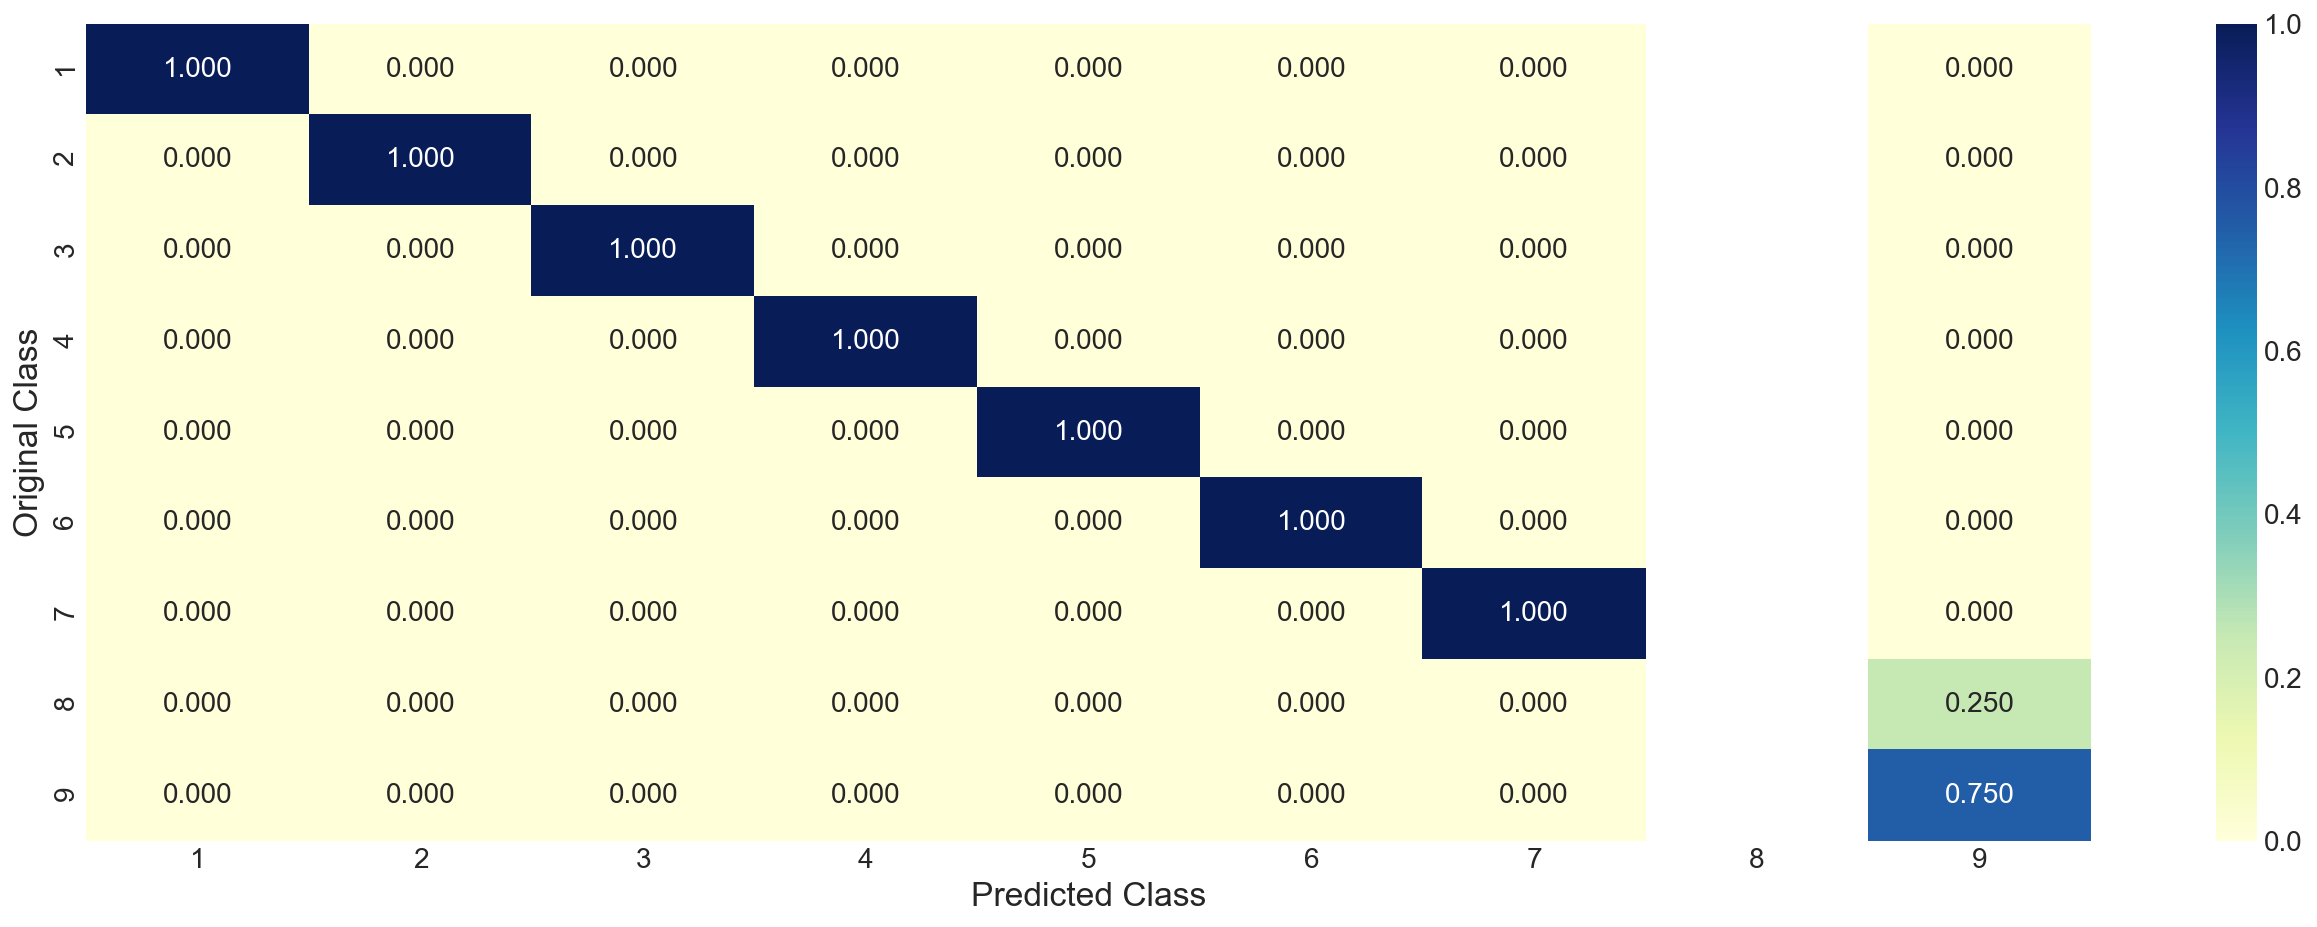

-------------------- Recall matrix (Row sum=1) --------------------


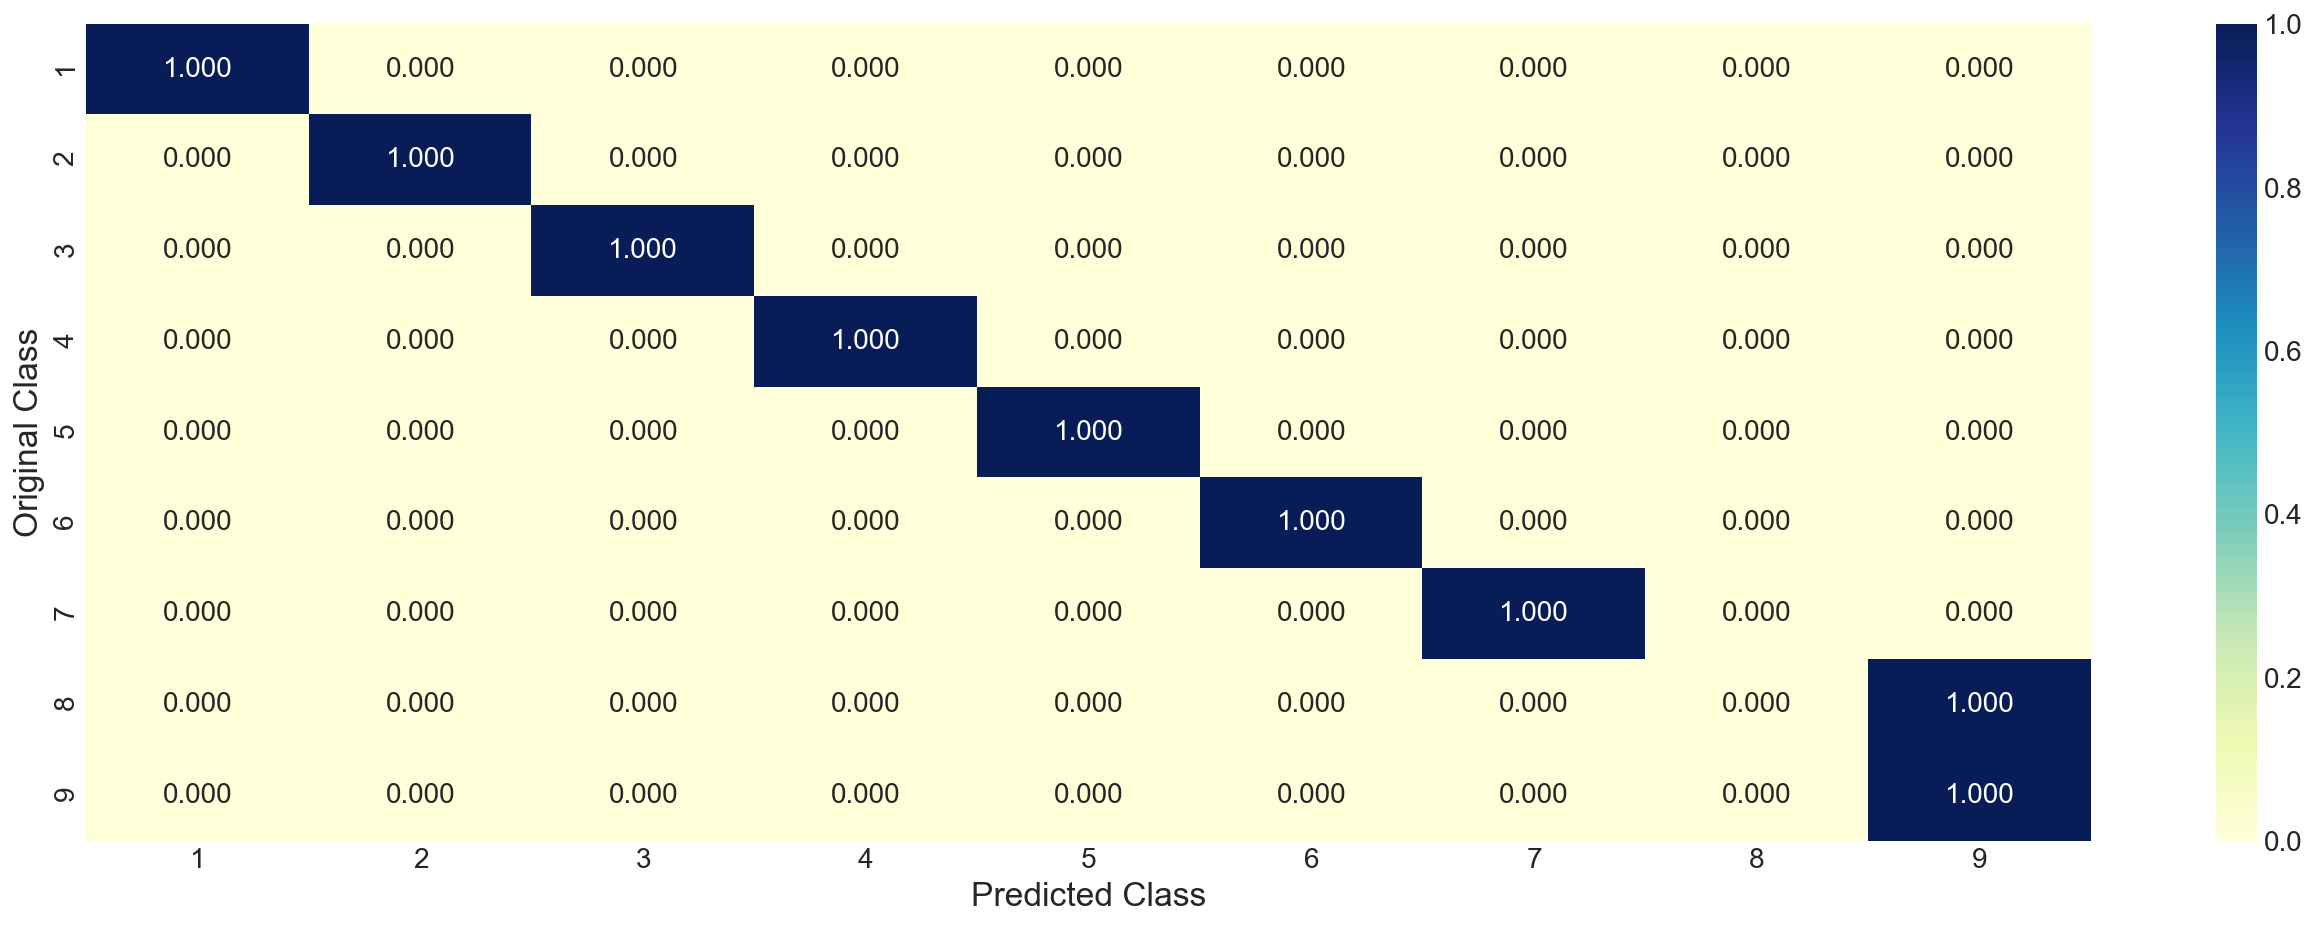

In [42]:
clf = KNeighborsClassifier(n_neighbors=neighbors[best_neighbors])
predict_and_plot_confusion_matrix(train_df,y_train, cv_df, y_cv, clf)

<h2> random Forest </h2>

In [43]:
from datetime import datetime
from  tqdm import tqdm

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 100 and max depth =  15
Log Loss : 0.558137706828334



 50%|██████████████████████████████████████████                                          | 1/2 [00:04<00:04,  4.47s/it]

for n_estimators = 100 and max depth =  20
Log Loss : 0.5092008290559679



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 200 and max depth =  15
Log Loss : 0.5692700067282019



 50%|██████████████████████████████████████████                                          | 1/2 [00:06<00:06,  6.97s/it]

for n_estimators = 200 and max depth =  20
Log Loss : 0.5186866106199891



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 500 and max depth =  15
Log Loss : 0.5912069835675879



 50%|██████████████████████████████████████████                                          | 1/2 [00:15<00:15, 15.35s/it]

for n_estimators = 500 and max depth =  20
Log Loss : 0.528123984673537



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 1000 and max depth =  15
Log Loss : 0.5953269003750798



 50%|██████████████████████████████████████████                                          | 1/2 [00:29<00:29, 29.39s/it]

for n_estimators = 1000 and max depth =  20
Log Loss : 0.5223733645018146



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 2000 and max depth =  15
Log Loss : 0.5917360547782368



 50%|██████████████████████████████████████████                                          | 1/2 [00:58<00:58, 58.63s/it]

for n_estimators = 2000 and max depth =  20
Log Loss : 0.5192207097103326



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:14<00:00, 61.77s/it]


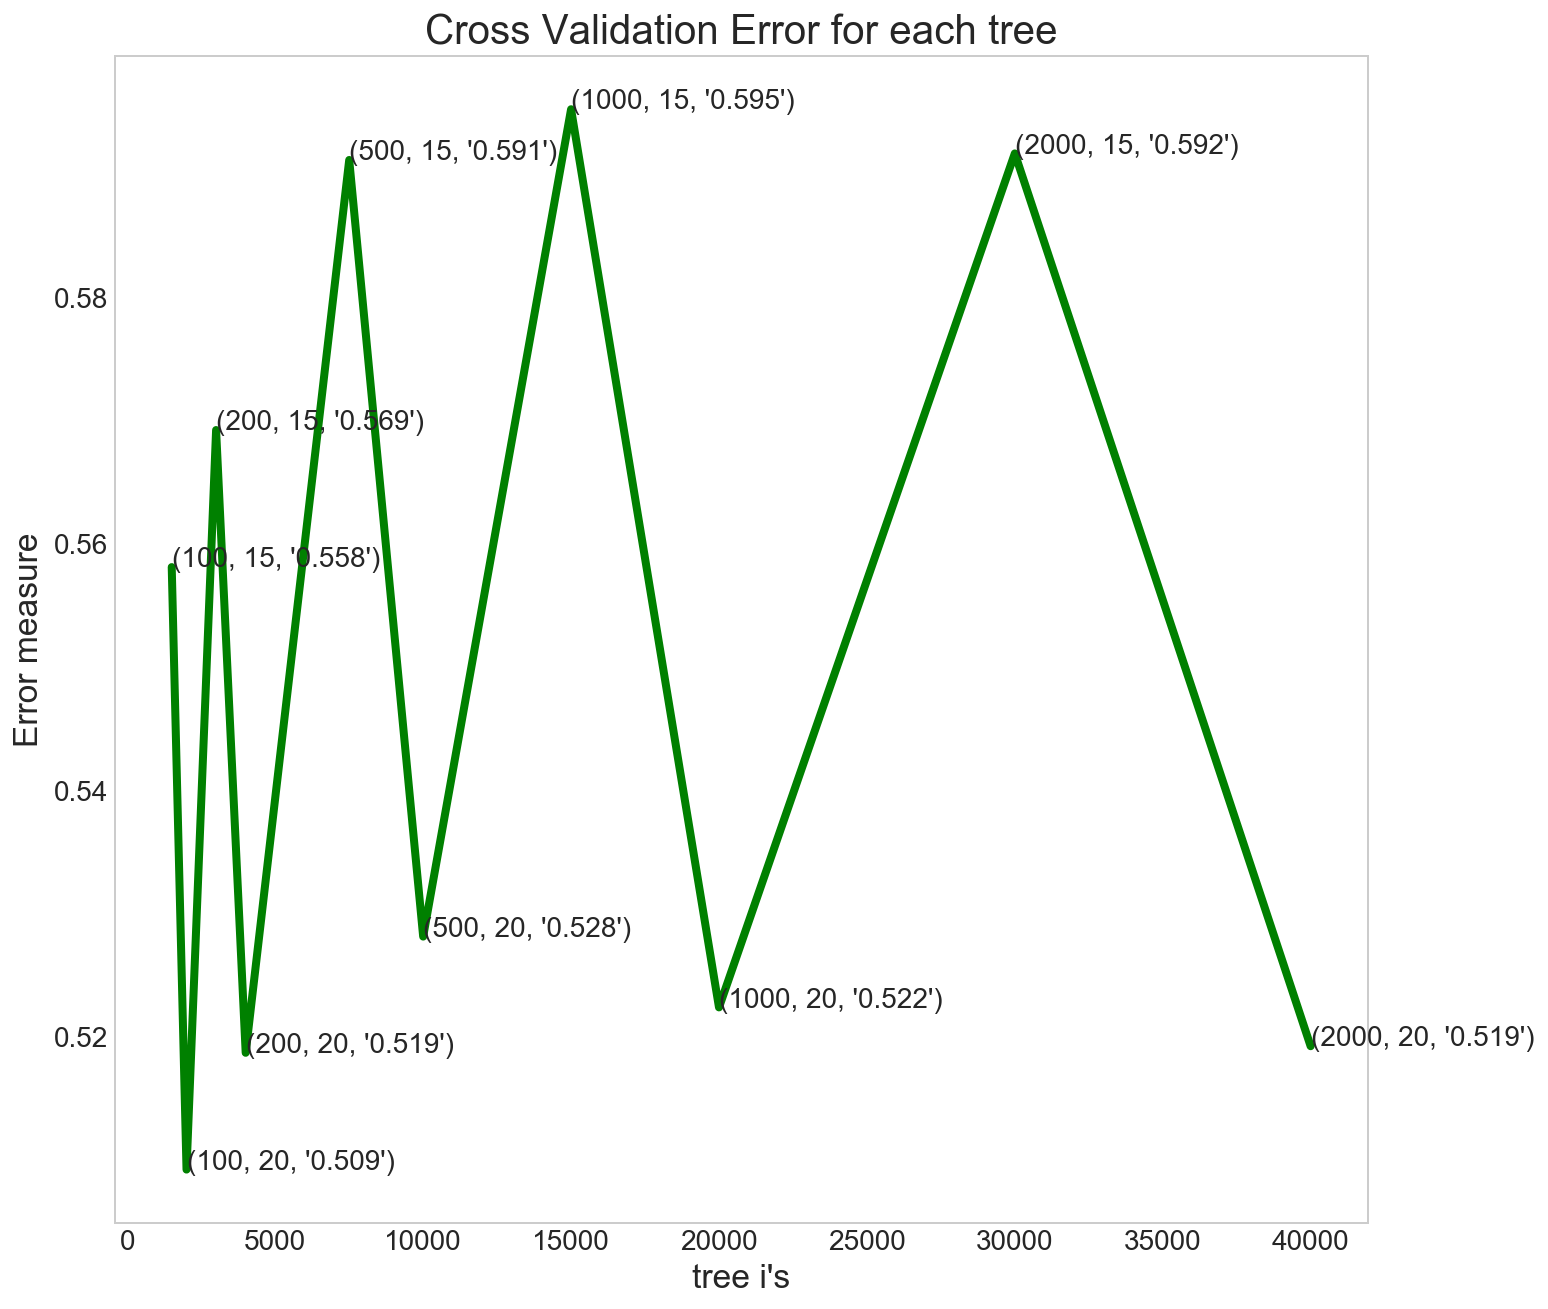

For values of best estimator =  100 The train log loss is: 0.33730333831391934
For values of best estimator =  100 The cross validation log loss is: 0.509200829055968
For values of best estimator =  100 The test log loss is: 0.5270960761807882
------------------------------------------------------------------------
Time taken to run this cell :
 0:04:20.983316
------------------------------------------------------------------------


In [44]:
start = datetime.now()
tree = [100,200,500,1000,2000]
max_depth = [15, 20]
cv_log_error_array = []
for i in tqdm(tree):
    for j in tqdm(max_depth):
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(tree)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((tree[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each tree")
plt.xlabel("tree i's")
plt.ylabel("Error measure")
plt.show()


best_tree = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=tree[int(best_tree/2)], criterion='gini', max_depth=max_depth[int(best_tree%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', tree[int(best_tree/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', tree[int(best_tree/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', tree[int(best_tree/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

print('------------------------------------------------------------------------')
print("Time taken to run this cell :\n", datetime.now() - start)
print('------------------------------------------------------------------------')

Log loss on the CV data is : 0.5092008290559681
Number of mis-classified points are : 0.1605351170568562
-------------------- Confusion matrix --------------------


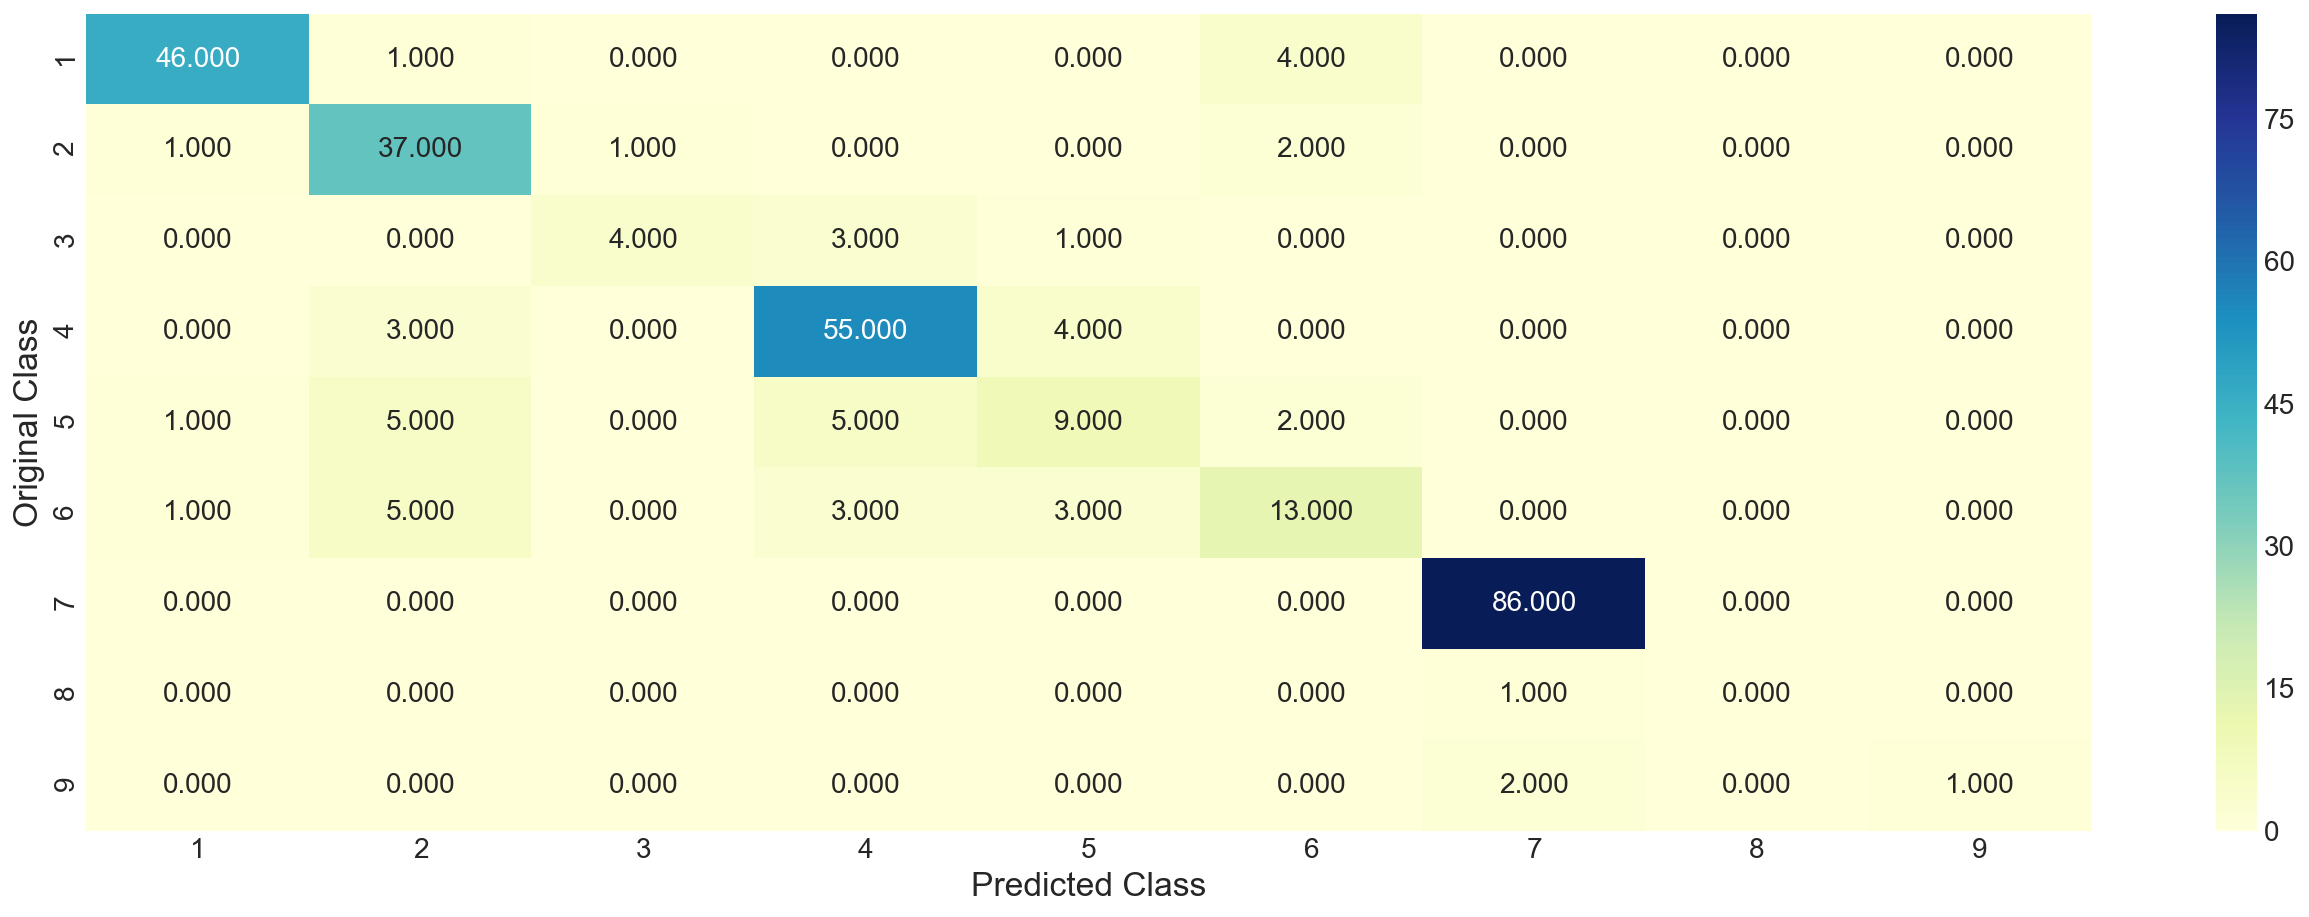

-------------------- Precision matrix (Columm Sum=1) --------------------


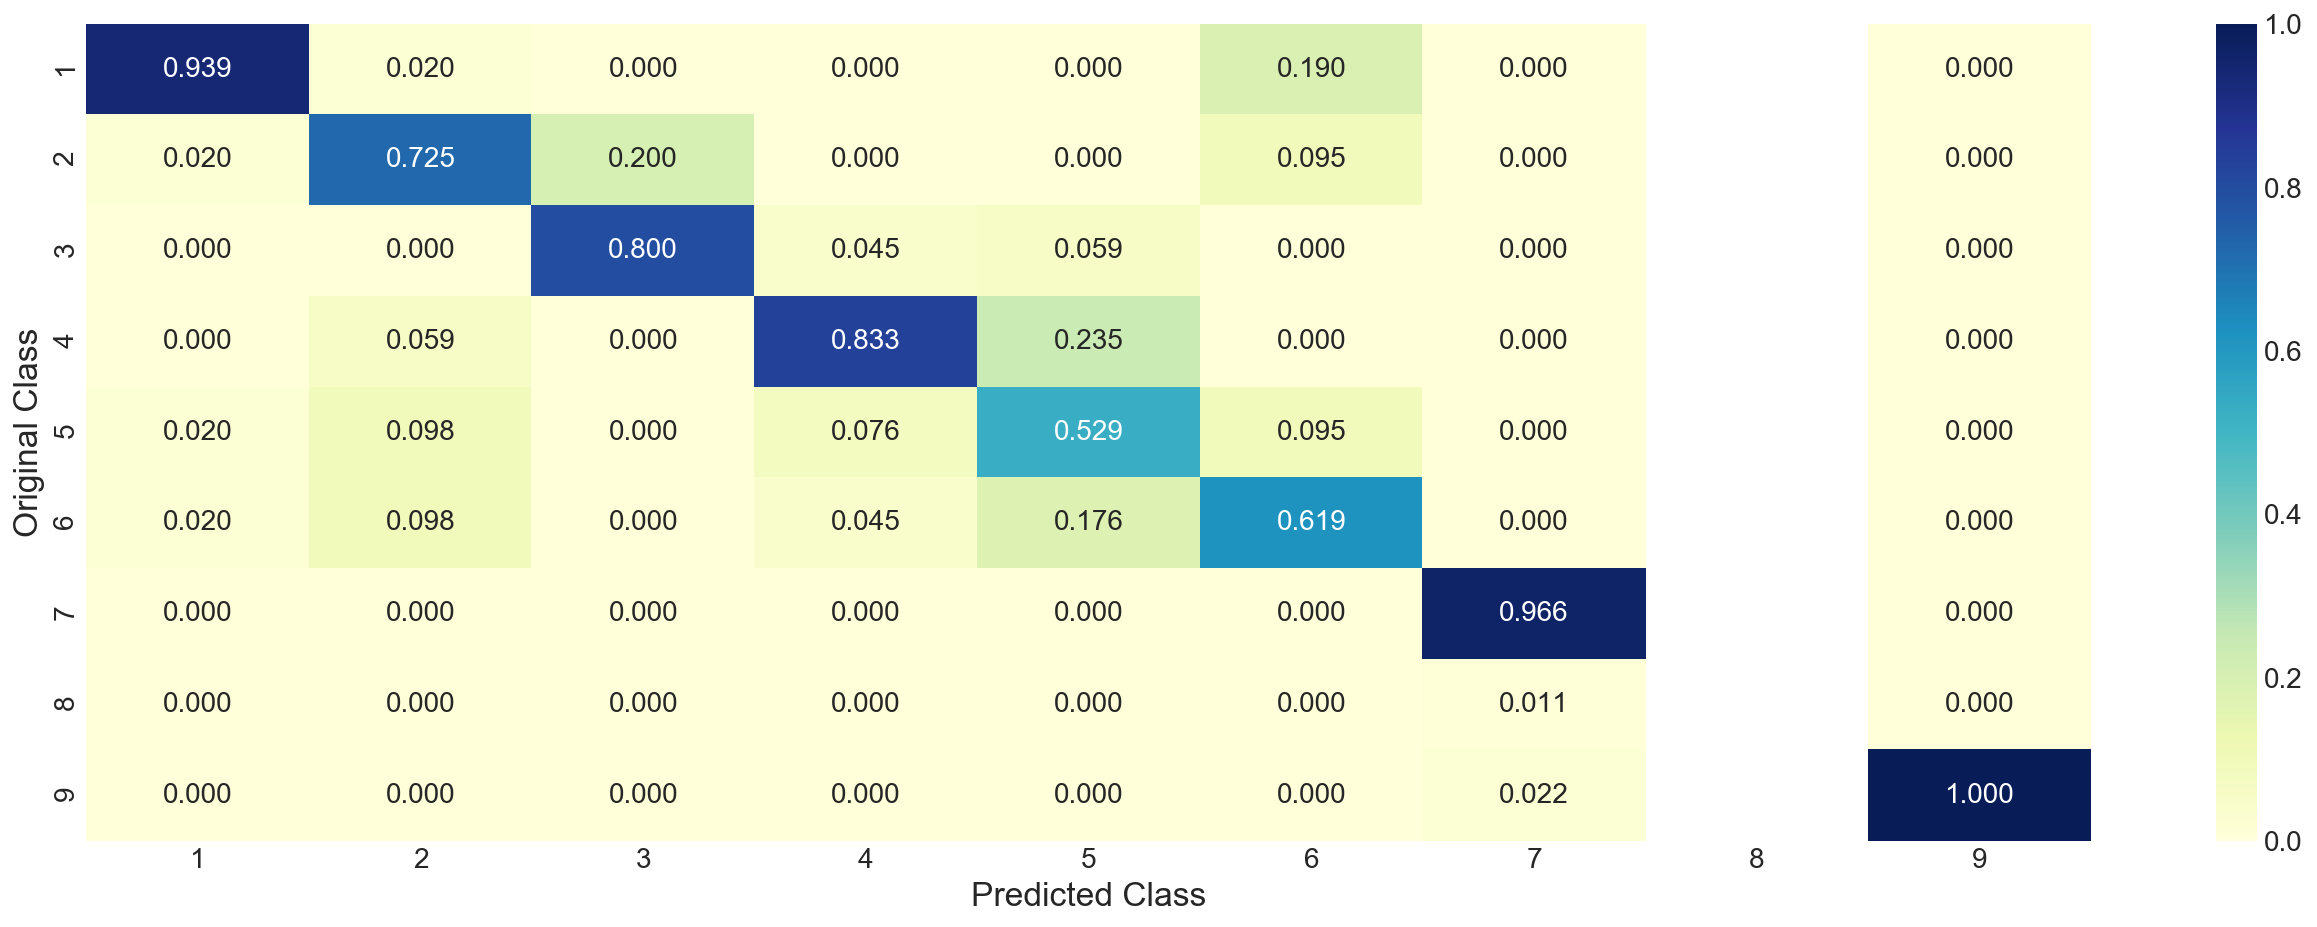

-------------------- Recall matrix (Row sum=1) --------------------


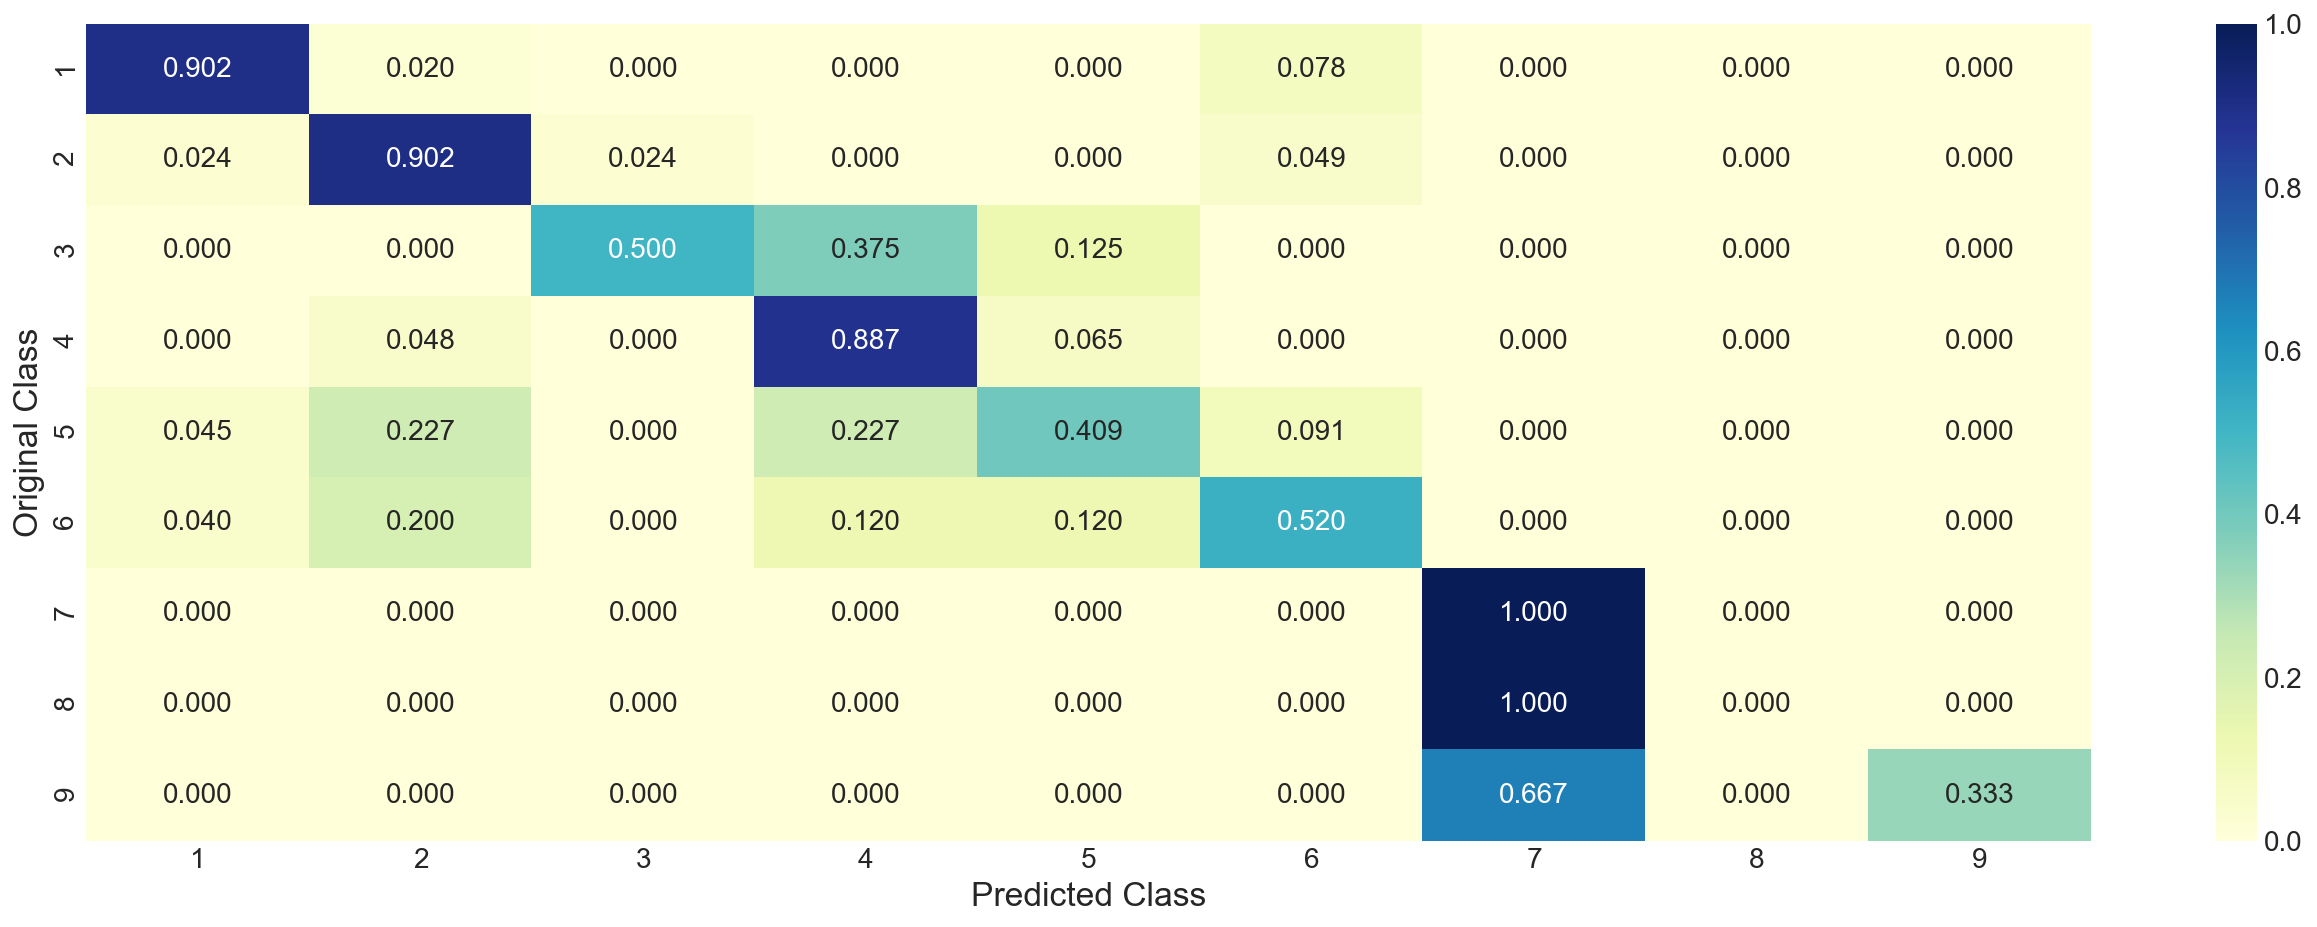

In [45]:
clf = RandomForestClassifier(n_estimators=tree[int(best_tree/2)], criterion='gini', 
                             max_depth=max_depth[int(best_tree%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df,y_train,cv_df,y_cv, clf)

<h1>Log loss of Cv below 1</h1>
<p>Here is a Comparison of our models.</p>


<table style="width:100%">
  <tr>
      <th></th>
      
  <th>Model</th>
    <th>Train Logloss</th>
    <th>Test Logloss</th>
       <th>CV Logloss</th>
      <th>Missclassified points</th>
      

  <tr>
    <td></td>
    <td>Logistic regression with weight balancing</td>
    <td>0.488</td>
    <td>0.55</td>
    <td>0.541</td>
       <td>12%</td>
       
   </tr>
  <tr>
   <td></td>
    <td>Logistic regression without weight balancing</td>
    <td>0.488</td>
    <td>0.55</td>
    <td>0.541</td>
       <td>12%</td>
        
   </tr>
  <tr>
       <td></td>
    <td>Linear SVM</td>
    <td>0.463</td>
    <td>0.551</td>
    <td>0.544</td>
       <td>11%</td>
     
   
  </tr>
  
  
  
   <tr>
       <td></td>
    <td>Naive Bayes</td>
    <td>0.811</td>
    <td>0.821</td>
    <td>0.77</td>
       <td>23%</td>
    
   <tr>
       <td></td>
    <td>KNN</td>
    <td>0.028</td>
    <td>0.029</td>
    <td>0.024</td>
       <td>0.3%</td>
        
   
  </tr>
  
  
   <tr>
       <td></td>
    <td>RF</td>
    <td>0.337</td>
    <td>0.527</td>
    <td>0.509</td>
       <td>16%</td>
        
   
  </tr>
 </table>   
